# Plotting Notebook
This notebook displays and manipulates the histograms produced by `make_plots.py`. <br>
Please use this is a guide to the type plots that you can create, as examples of the `hist`, `mplhep`, and other packages, as well as the use of the various functions that we have written in `plot_utils.py`. <br>
Use the the Table of Contents in Jupyter to view the different sections of the notebook to help navigating it.

In [1]:
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import hist
from hist import Hist
import pickle
import mplhep as hep
import math
from tabulate import tabulate
import itertools
import warnings
import json
import scipy
import plot_utils
import fill_utils

warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'
plt.style.use(hep.style.CMS)

## Notebook Parameters
The following couple cells define the input and output directories, and load in the desired .pkl files into the `plots` nested dictionary.<br>
`output_label`: _str_, saves plots as `<output_label>+<plot_name>.<file_ext>`.<br>
`file_ext`: _str_, see above.<br>

In [2]:
# parameters
output_label = './output_plots/'
file_ext = '.png'

The `plots` dictionary is used to store all the plots imported from the pickle files. Dimensions: (sample) x (plot label) <br>
The `loader` function in `plot_utils.py` automatically merges all the QCD HT and QCD pT bins into one sample ('QCD_HT' and 'QCD_Pt'), applies the lumis, and excludes some of the low QCD bins.<br>

In [3]:
# create output dir
if not os.path.isdir(output_label): 
    print("Creating", output_label)
    os.mkdir(output_label)

# This part is meant to be flxeible, depending on what you want to import
# dimensions of plots: (sample) x (plot label)
# N.B.: lumis are applied through loader()

# input .pkl files
plotDir = './temp_output/'
infile_names = glob.glob(plotDir+'*.pkl')

# generate list of files that you want to merge histograms for
offline_files_SUEP = [f for f in infile_names if ".pkl" in f and ('SUEP' in f)]
offline_files_2018 = [
    f for f in infile_names if (".pkl" in f) and (
        'MINIAODSIM_test' in f or 'Run2018' in f or 'MuEnriched' in f
    ) and ('QCD_HT' not in f)
]

# merge the histograms, apply lumis, exclude low HT bins
plots_SUEP_2018 = plot_utils.loader(offline_files_SUEP, year=2018)
plots_2018 = plot_utils.loader(offline_files_2018, year=2018)

# put everything in one dictionary, apply lumi for SUEPs
plots = {}
for key in plots_SUEP_2018.keys(): 
    plots[key+"_2018"] = plots_SUEP_2018[key]
for key in plots_2018.keys(): 
    plots[key+"_2018"] = plots_2018[key]

These are all the samples loaded.

In [4]:
keys = list(plots.keys())
keys.sort()
for k in keys: print(k)

DY1JetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8+RunIISummer19UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_test_2018
DY2JetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8+RunIISummer19UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_test_2018
DY3JetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8+RunIISummer19UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_test_2018
DY4JetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8+RunIISummer19UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_test_2018
DYNJetsToLL_2018
QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8_test_2018
QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8_test_2018
QCD_Pt-15To20_MuEnrichedPt5_TuneCP5_13TeV-pythia8_test_2018
QCD_Pt-170To300_MuEnrichedPt5_TuneCP5_13TeV-pythia8_test_2018
QCD_Pt-20To30_MuEnrichedPt5_TuneCP5_13TeV-pythia8_test_2018
QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8_test_2018
QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8_test_2018
QCD_Pt-

In [5]:
for key in plots['QCD_Pt_2018'].keys():
    if 'Inverted' not in key:
        print(key)

ABCDvars_Cluster_4muons
ht_Cluster_4muons
ht_JEC_Cluster_4muons
ht_JEC_JER_up_Cluster_4muons
ht_JEC_JER_down_Cluster_4muons
ht_JEC_JES_up_Cluster_4muons
ht_JEC_JES_down_Cluster_4muons
ntracks_Cluster_4muons
ngood_fastjets_Cluster_4muons
PV_npvs_Cluster_4muons
Pileup_nTrueInt_Cluster_4muons
ngood_ak4jets_Cluster_4muons
A_ht_Cluster_4muons
A_ht_JEC_Cluster_4muons
A_ht_JEC_JER_up_Cluster_4muons
A_ht_JEC_JER_down_Cluster_4muons
A_ht_JEC_JES_up_Cluster_4muons
A_ht_JEC_JES_down_Cluster_4muons
A_ntracks_Cluster_4muons
A_ngood_fastjets_Cluster_4muons
A_PV_npvs_Cluster_4muons
A_Pileup_nTrueInt_Cluster_4muons
A_ngood_ak4jets_Cluster_4muons
B_ht_Cluster_4muons
B_ht_JEC_Cluster_4muons
B_ht_JEC_JER_up_Cluster_4muons
B_ht_JEC_JER_down_Cluster_4muons
B_ht_JEC_JES_up_Cluster_4muons
B_ht_JEC_JES_down_Cluster_4muons
B_ntracks_Cluster_4muons
B_ngood_fastjets_Cluster_4muons
B_PV_npvs_Cluster_4muons
B_Pileup_nTrueInt_Cluster_4muons
B_ngood_ak4jets_Cluster_4muons
C_ht_Cluster_4muons
C_ht_JEC_Cluster_4muons


## 1D Plots
Plot some of the 1D histograms for any number of samples in the same plot.<br>
Parameters:<br>
`plot_labels`: _list of str_, which plots to show.<br>
`samples`: _list of str_, which samples to include in the plot.

QCD_Pt_2018: 7.24 ± 7.20
QCD_Pt_MuEnriched_2018: 703.77 ± 618.30


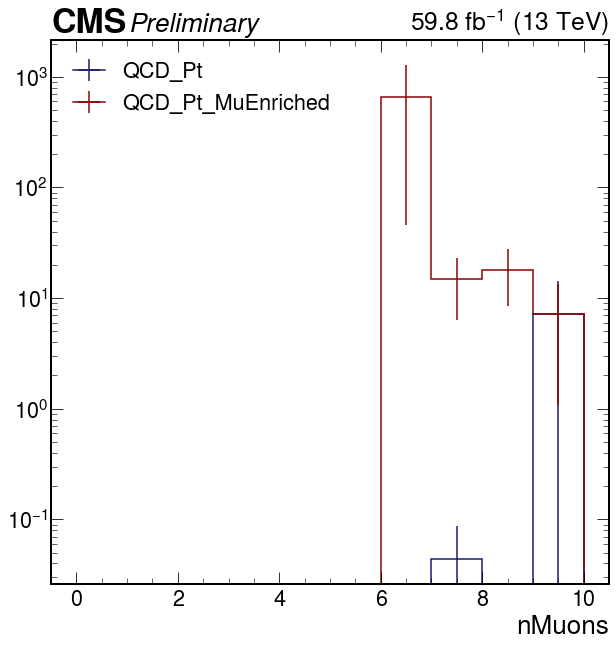

QCD_Pt_2018: 7.45 ± 7.20
QCD_Pt_MuEnriched_2018: 705.79 ± 618.30


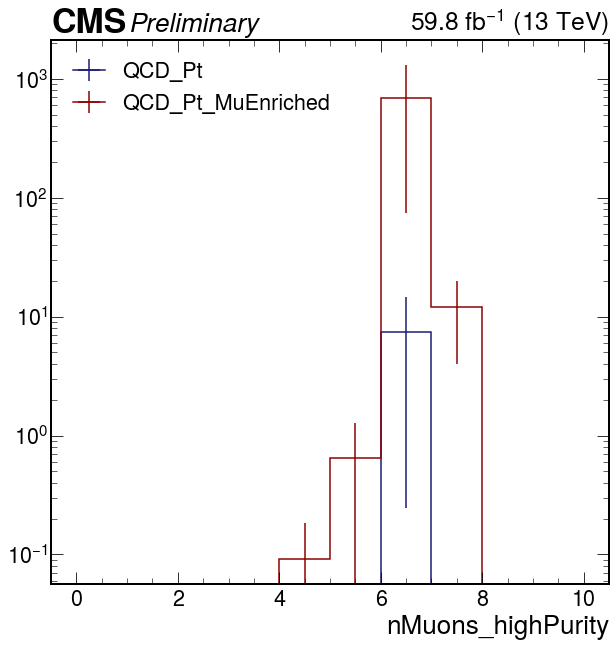

QCD_Pt_2018: 7.45 ± 7.20
QCD_Pt_MuEnriched_2018: 705.79 ± 618.30


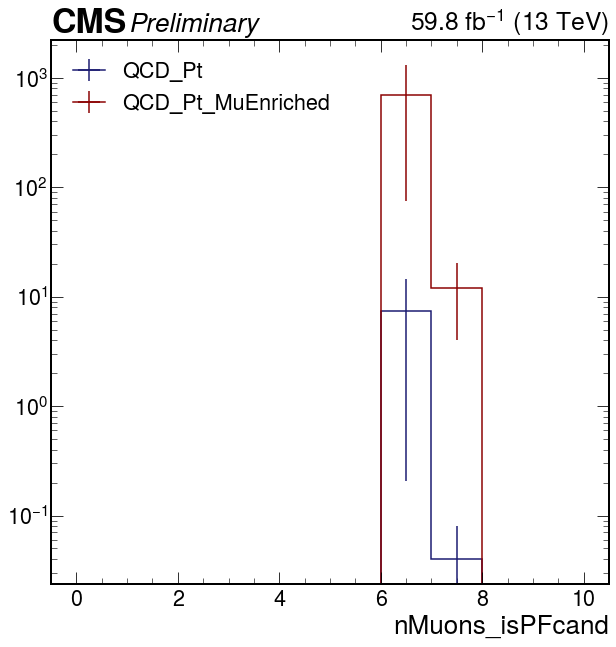

QCD_Pt_2018: 7.45 ± 7.20
QCD_Pt_MuEnriched_2018: 705.79 ± 618.30


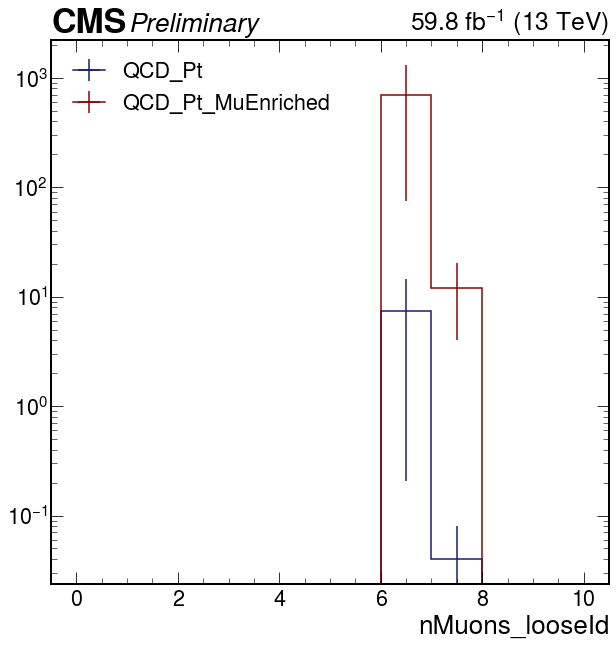

QCD_Pt_2018: 7.45 ± 7.20
QCD_Pt_MuEnriched_2018: 705.79 ± 618.30


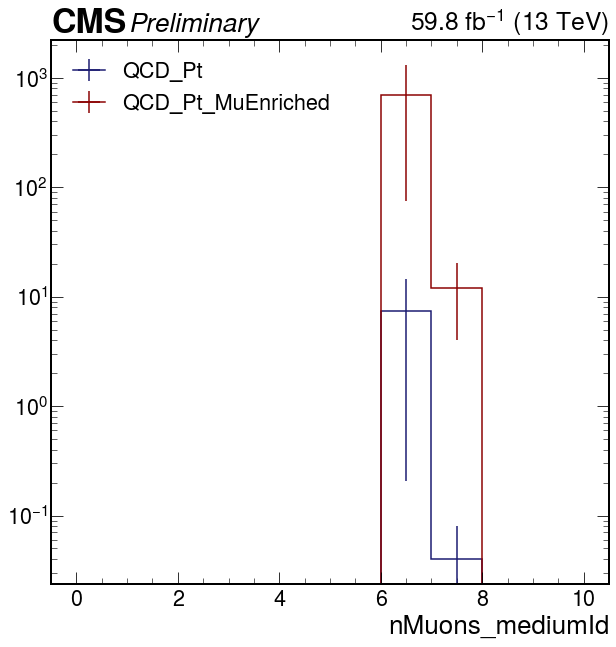

QCD_Pt_2018: 7.45 ± 7.20
QCD_Pt_MuEnriched_2018: 705.79 ± 618.30


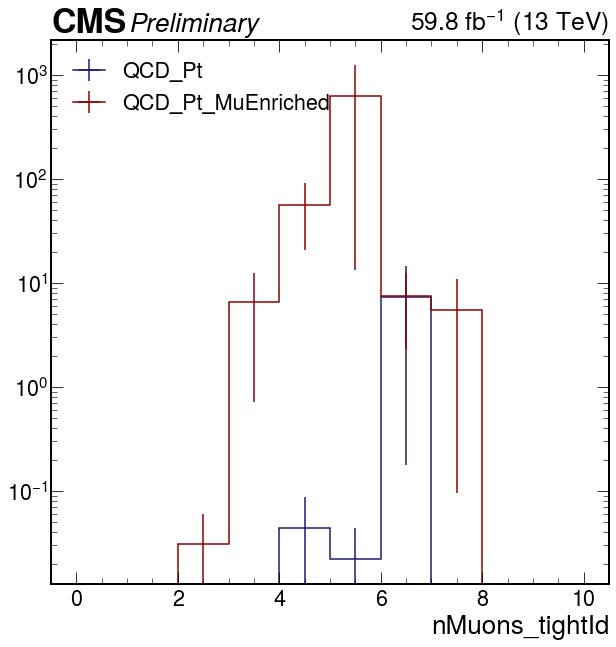

QCD_Pt_2018: 7.45 ± 7.20
QCD_Pt_MuEnriched_2018: 705.79 ± 618.30


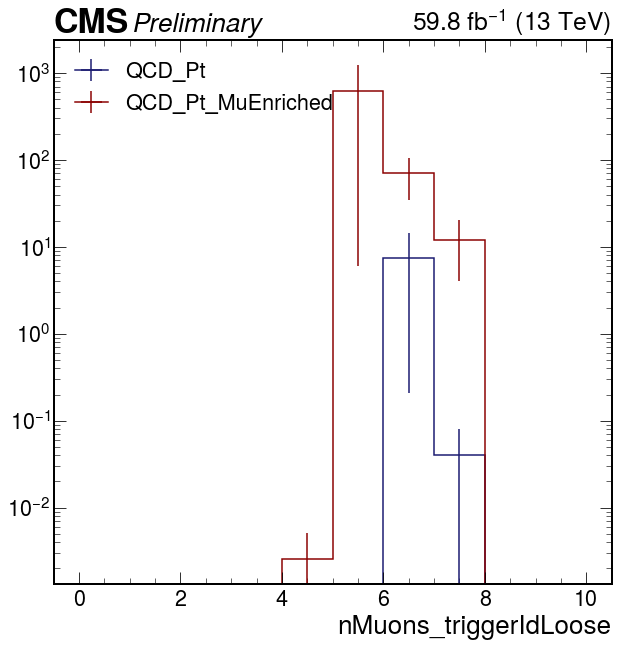

QCD_Pt_2018: 7.45 ± 7.20
QCD_Pt_MuEnriched_2018: 705.79 ± 618.30


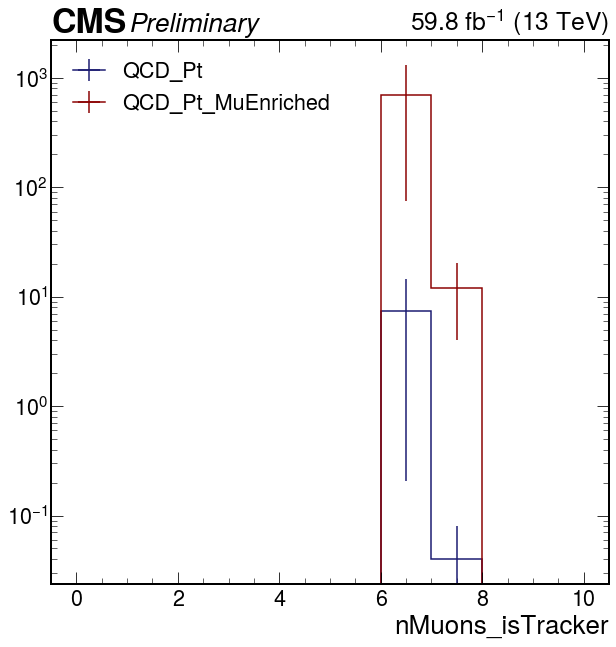

QCD_Pt_2018: 7.45 ± 7.20
QCD_Pt_MuEnriched_2018: 705.79 ± 618.30


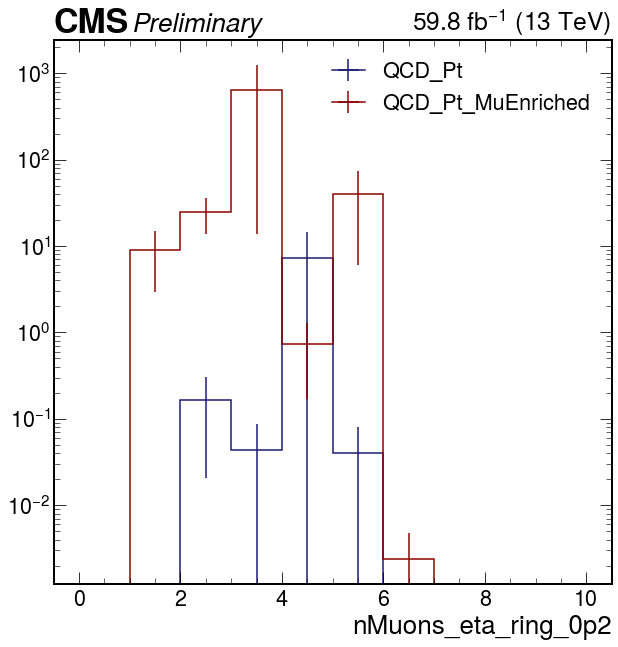

QCD_Pt_2018: 7.45 ± 7.20
QCD_Pt_MuEnriched_2018: 705.79 ± 618.30


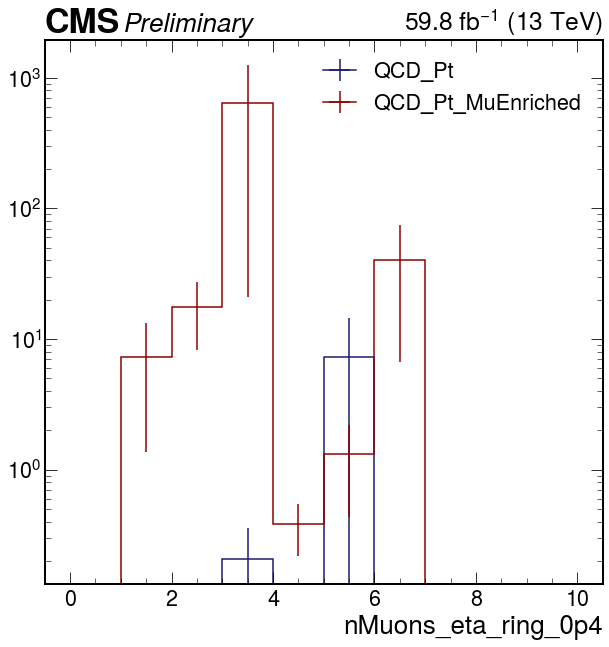

QCD_Pt_2018: 7.45 ± 7.20
QCD_Pt_MuEnriched_2018: 705.79 ± 618.30


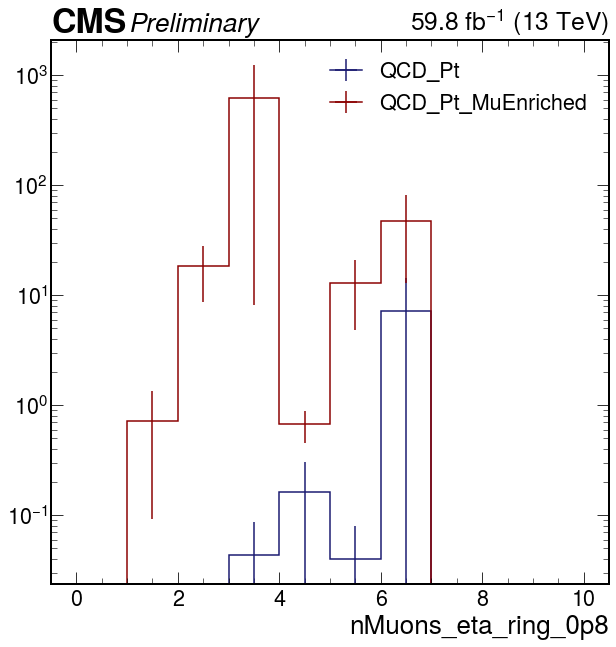

QCD_Pt_2018: 7.45 ± 7.20
QCD_Pt_MuEnriched_2018: 705.79 ± 618.30


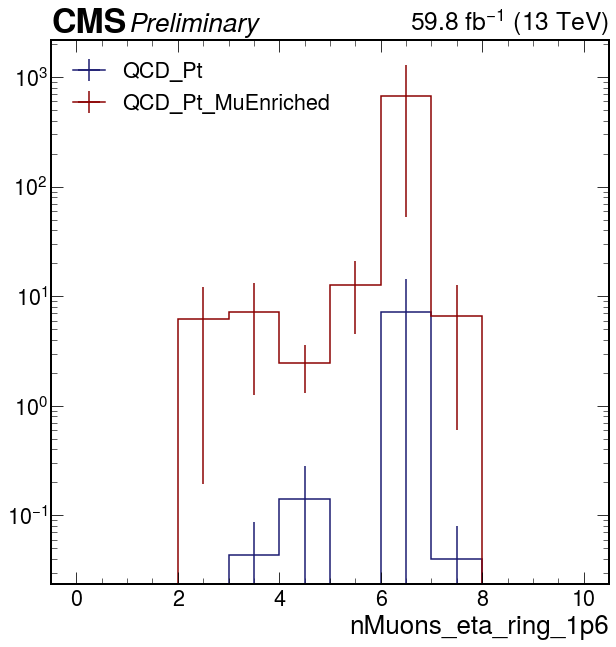

In [12]:
plot_labels = [
    x for x in plots['QCD_Pt_2018'].keys() if ('nMuons_' in x) and ('Cluster_4muons' in x) and ('2D' not in x)
]
year='2018'
decay='darkPho'

samples = [
    #'DYNJetsToLL_2018',
    'QCD_Pt_2018',
    'QCD_Pt_MuEnriched_2018',
    #'TTJets_2018',
    #'WWZ_4F_2018',
    #'ZZTo4L_2018',
    #'ZZZ_2018',
    #'ttZJets_2018',
    #f'SUEP-m125-{decay}_2018',
    #f'SUEP-m400-{decay}_2018',
    #f'SUEP-m750-{decay}_2018',
    #f'SUEP-m1000-{decay}_2018',
]
density = False

for plot_label in plot_labels:
    fig, ax = plt.subplots(figsize=(10, 10))
    hep.cms.label(llabel='Preliminary',data=False, lumi=plot_utils.lumiLabel(year))
    isLog = False
    for sample in samples:
        if plot_label not in plots[sample].keys(): continue
        h = plots[sample][plot_label][:10j]
        if not np.all(np.isclose(h.axes.widths[0], h.axes.widths[0][0])):
            isLog = True
            continue
        while h.size > 52:
            h = h[::2j]
        print(f"{sample}: {h.sum().value:0.2f} ± {np.sqrt(h.sum().variance):0.2f}")
        if density: h = h/h.sum().value
        hep.histplot(
            h, 
            yerr=np.sqrt(h.variances()), 
            label=sample.replace('_2018',''), 
            color=plot_utils.default_colors[sample],
        ) 

    if isLog:
        continue
    # tweak these by hand, as needed
    #plt.ylim(1e-2,1e8)
    plt.xlabel(plot_label.replace('_Cluster_4muons',''))
    plt.legend()
    plt.yscale("log")

    # save and show
    plt.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    plt.show()

Check muon pt specifically

QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
QCD_Pt_MuEnriched_2018 WeightedSum(value=705.788, variance=382294)


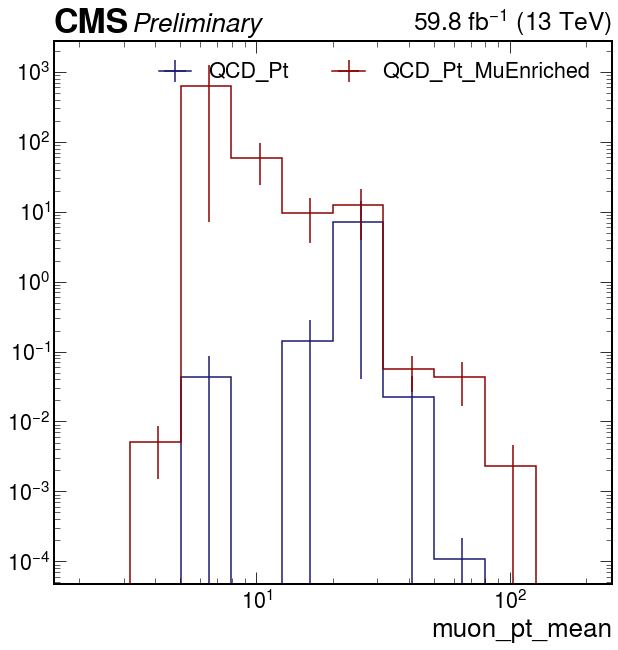

No handles with labels found to put in legend.


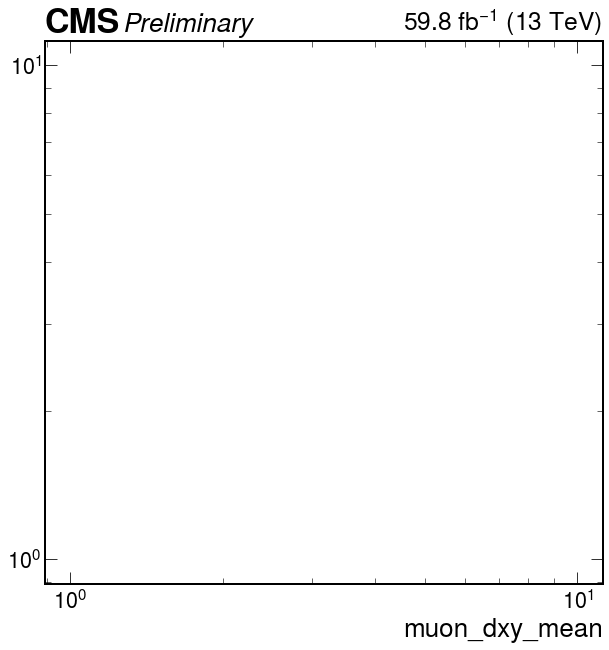

No handles with labels found to put in legend.


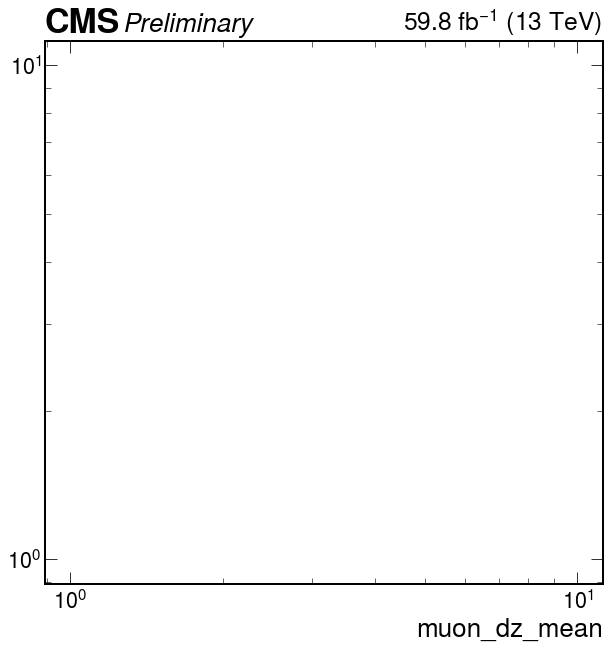

No handles with labels found to put in legend.


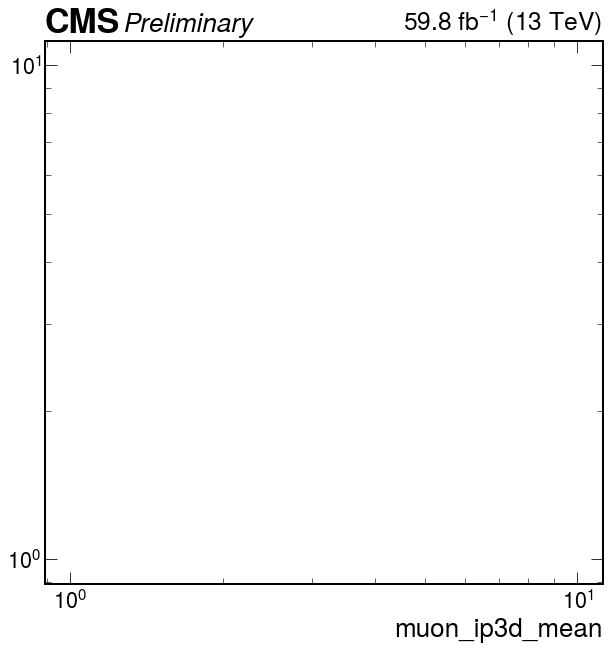

QCD_Pt_2018 WeightedSum(value=7.44512, variance=51.8358)
QCD_Pt_MuEnriched_2018 WeightedSum(value=705.745, variance=382294)


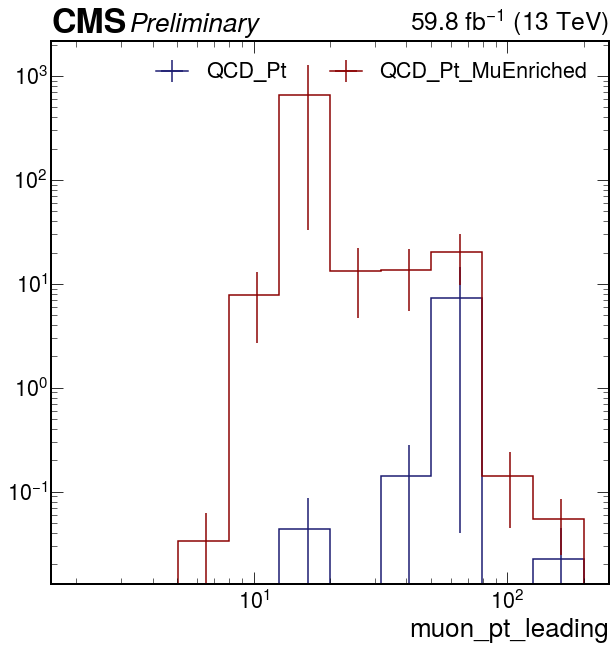

QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
QCD_Pt_MuEnriched_2018 WeightedSum(value=705.788, variance=382294)


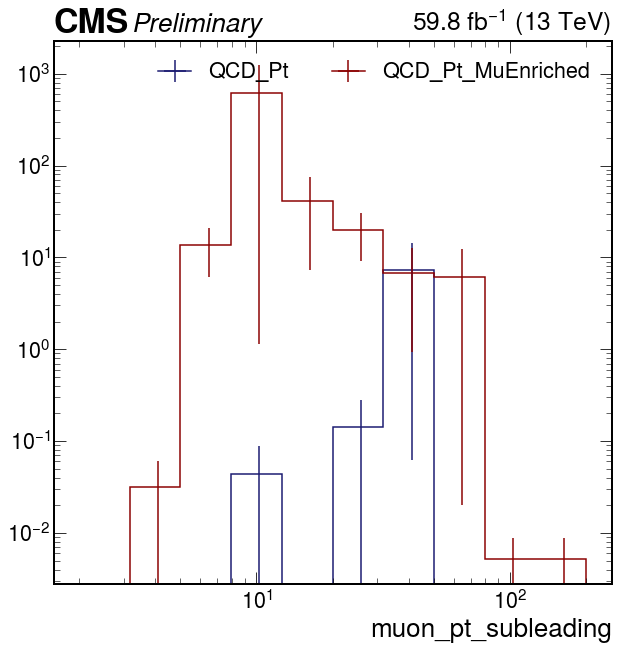

No handles with labels found to put in legend.


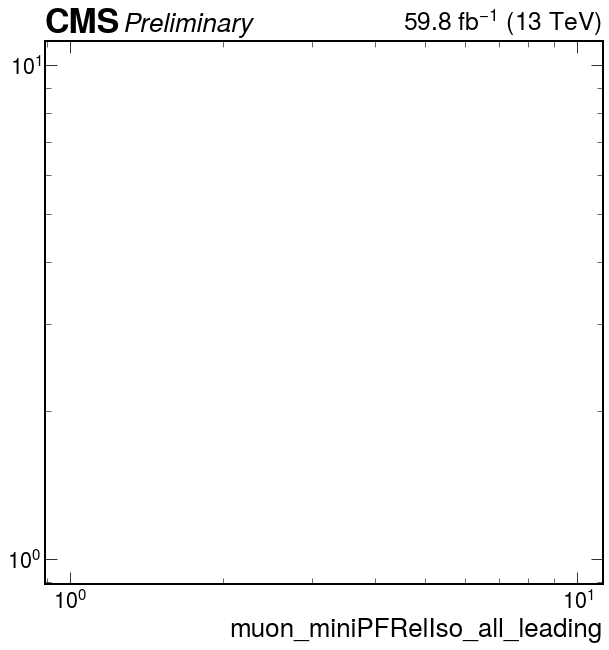

No handles with labels found to put in legend.


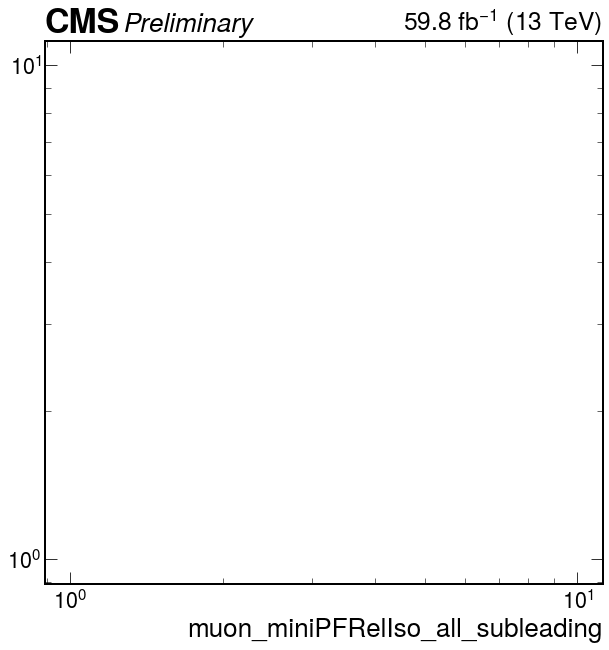

No handles with labels found to put in legend.


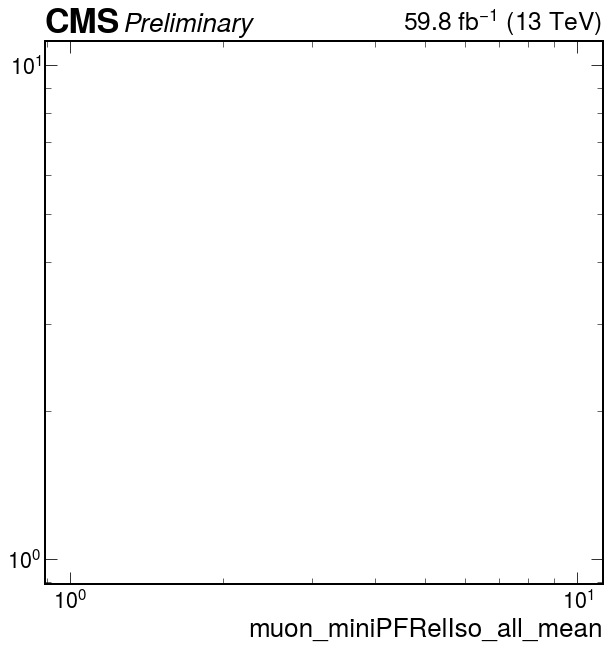

No handles with labels found to put in legend.


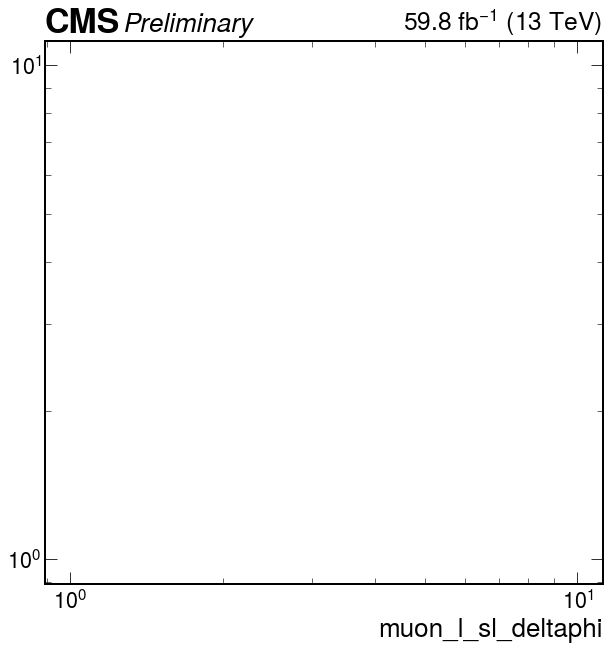

No handles with labels found to put in legend.


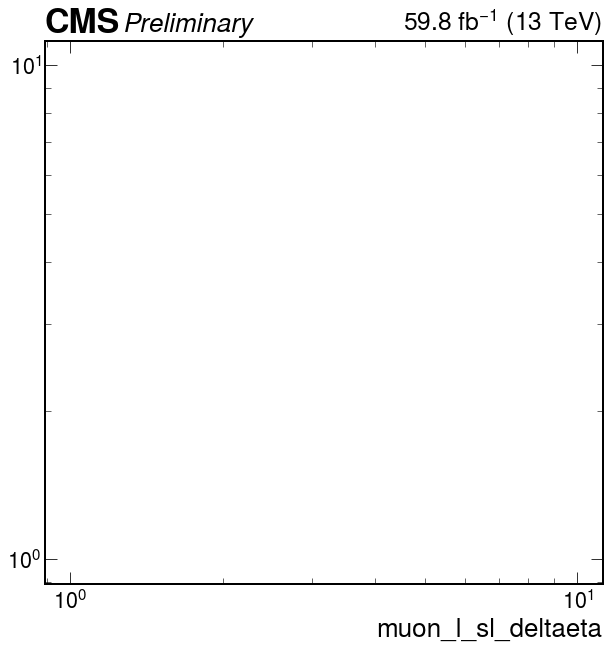

No handles with labels found to put in legend.


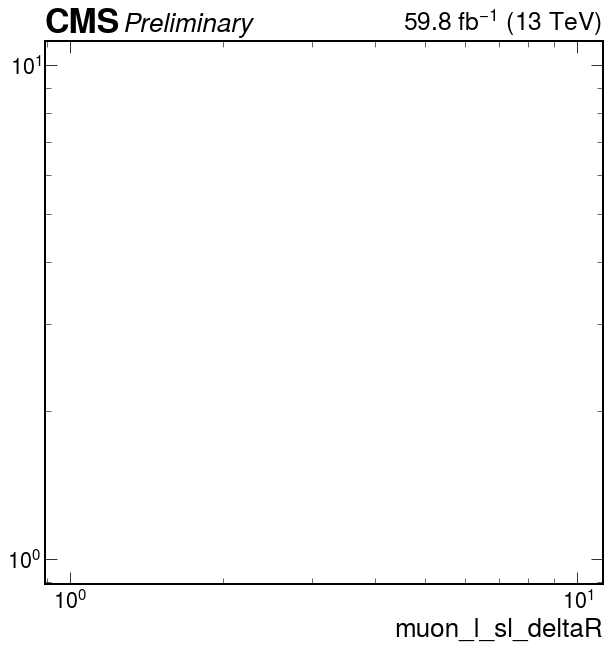

No handles with labels found to put in legend.


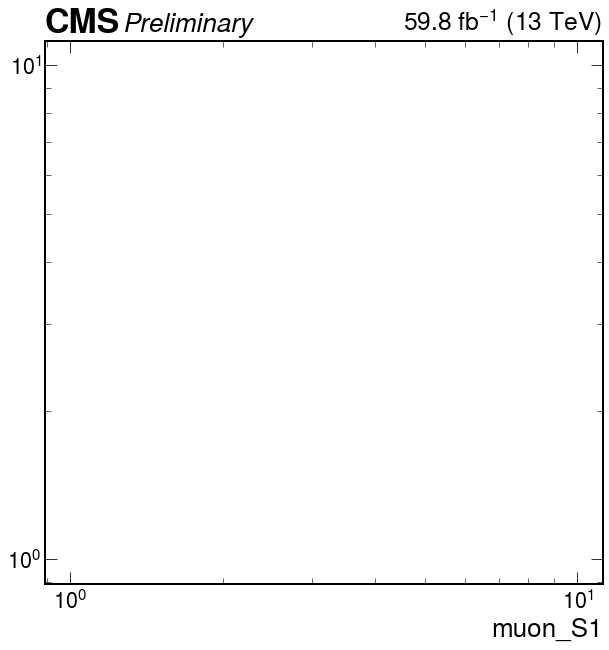

QCD_Pt_2018 WeightedSum(value=7.4013, variance=51.8339)
QCD_Pt_MuEnriched_2018 WeightedSum(value=684.464, variance=382197)


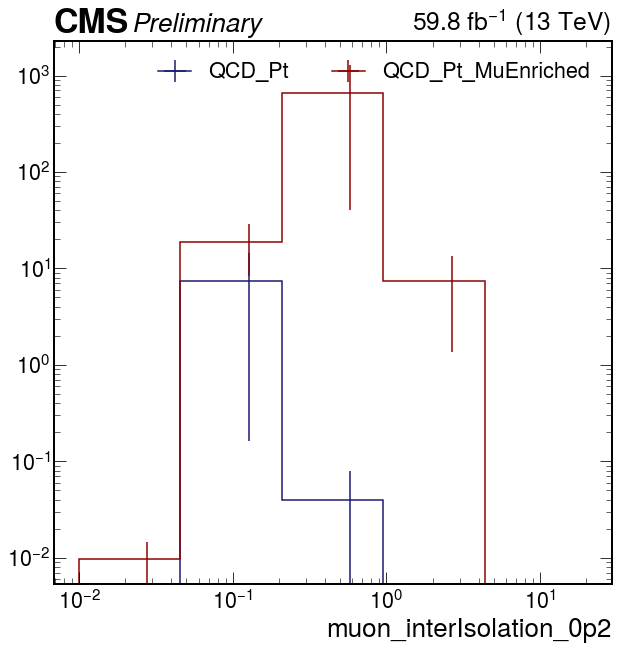

QCD_Pt_2018 WeightedSum(value=7.4013, variance=51.8339)
QCD_Pt_MuEnriched_2018 WeightedSum(value=691.987, variance=382234)


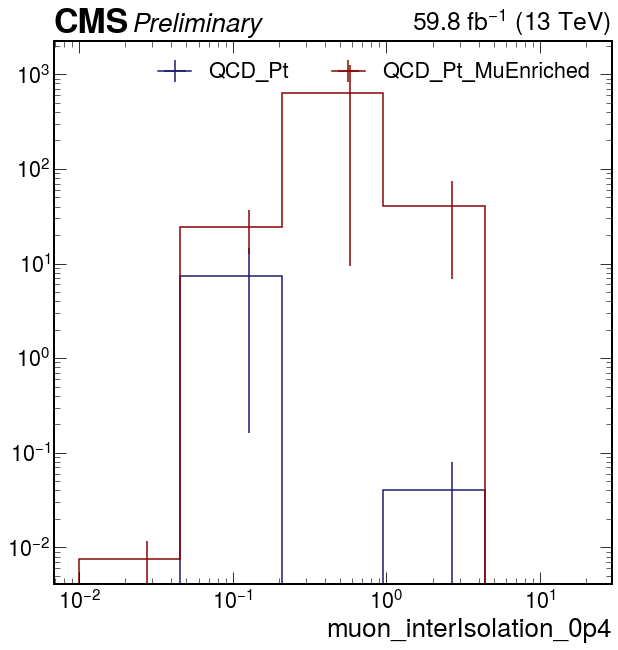

QCD_Pt_2018 WeightedSum(value=7.4014, variance=51.8339)
QCD_Pt_MuEnriched_2018 WeightedSum(value=704.101, variance=382293)


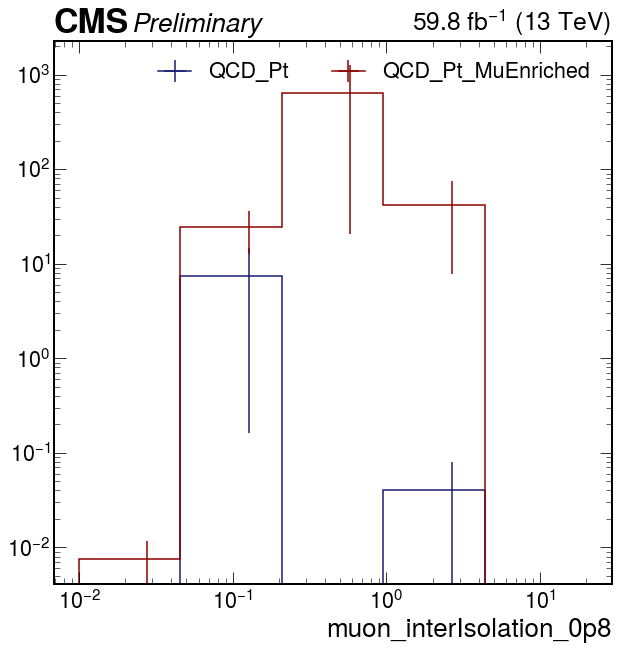

QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
QCD_Pt_MuEnriched_2018 WeightedSum(value=704.916, variance=382294)


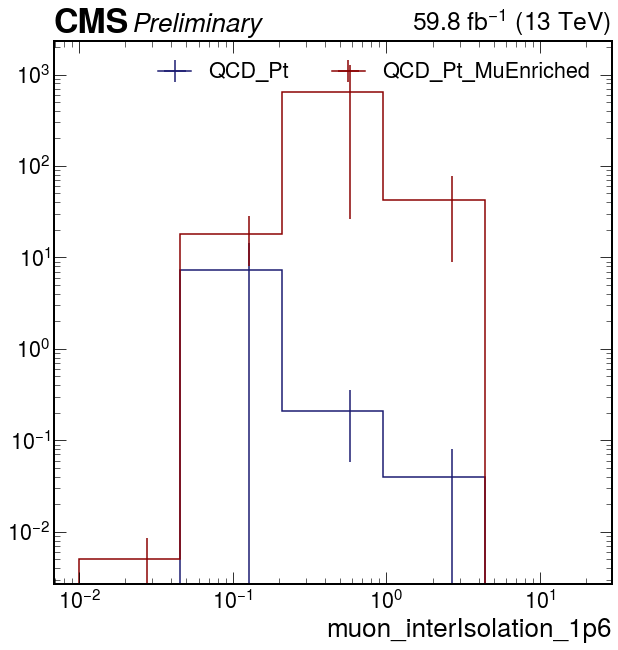

In [18]:
plot_labels = [
    x for x in plots['QCD_Pt_2018'].keys() if ('muon_' in x) and ('Cluster_4muons' in x) and ('2D' not in x)
]
year='2018'
decay='darkPho'

samples = [
    #'DYNJetsToLL_2018',
    'QCD_Pt_2018',
    'QCD_Pt_MuEnriched_2018',
    #'TTJets_2018',
    #'WWZ_4F_2018',
    #'ZZTo4L_2018',
    #'ZZZ_2018',
    #'ttZJets_2018',
    #f'SUEP-m125-{decay}_2018',
    #f'SUEP-m400-{decay}_2018',
    #f'SUEP-m750-{decay}_2018',
    #f'SUEP-m1000-{decay}_2018',
]
density = False

for plot_label in plot_labels:
    fig, ax = plt.subplots(figsize=(10, 10))
    hep.cms.label(llabel='Preliminary',data=False, lumi=plot_utils.lumiLabel(year))
    for sample in samples:
        h = plots[sample][plot_label][::10j]
        if np.all(np.isclose(h.axes.widths[0], h.axes.widths[0][0])):
            continue
        while h.size > 50:
            h = h[::2j]
        print(sample, h.sum())
        if density: h = h/h.sum().value
        hep.histplot(
            h, 
            yerr=np.sqrt(h.variances()), 
            label=sample.replace('_2018',''), 
            color=plot_utils.default_colors[sample],
        ) 

    # tweak these by hand, as needed
    #plt.ylim(1e-2,1e7)
    plt.xlabel(plot_label.replace('_Cluster_4muons',''))
    plt.legend(ncol=2)
    plt.xscale('log')
    plt.yscale("log")

    # save and show
    plt.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    plt.show()

With stacked background

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=240178, variance=6.74363e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=2841.17, variance=3230.77)


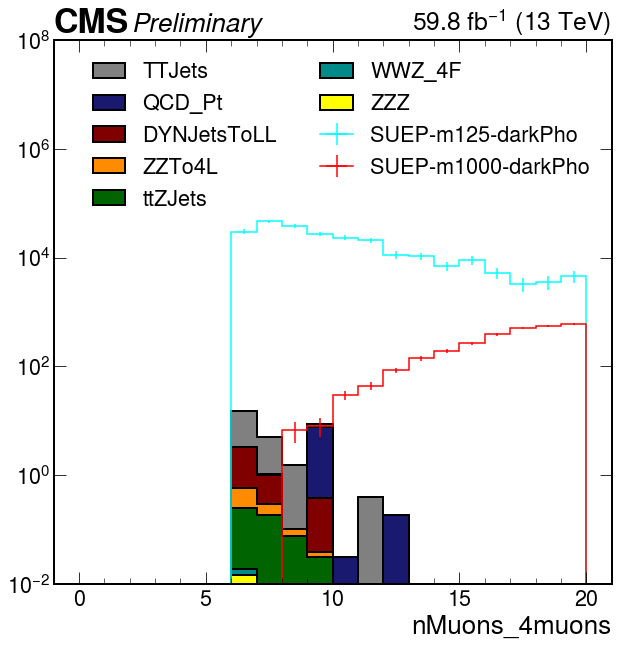

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=7055.68, variance=8037.3)


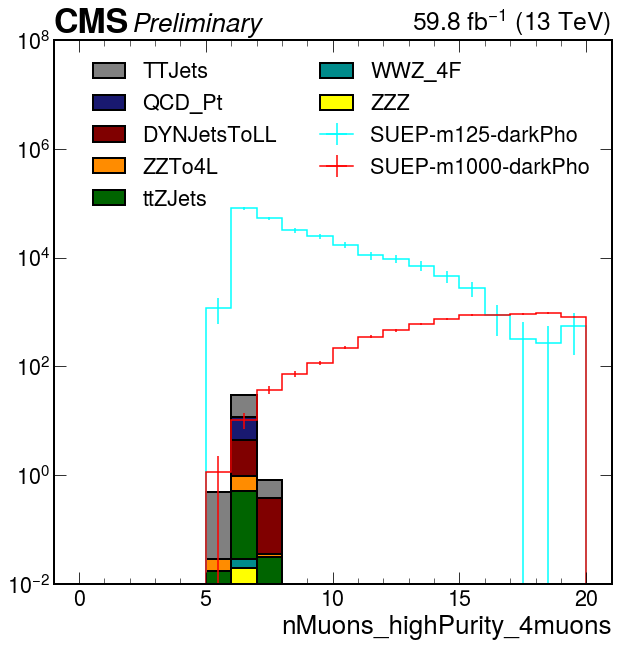

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=6999.28, variance=7972.06)


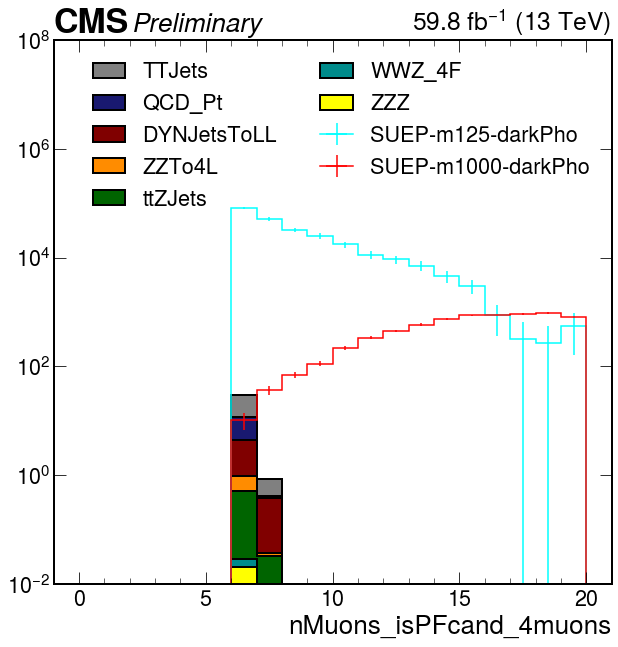

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=6999.28, variance=7972.06)


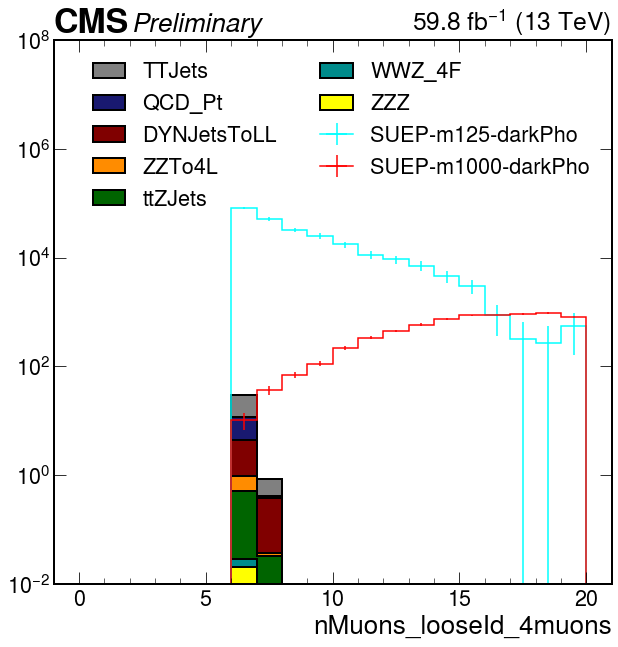

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=6999.28, variance=7972.06)


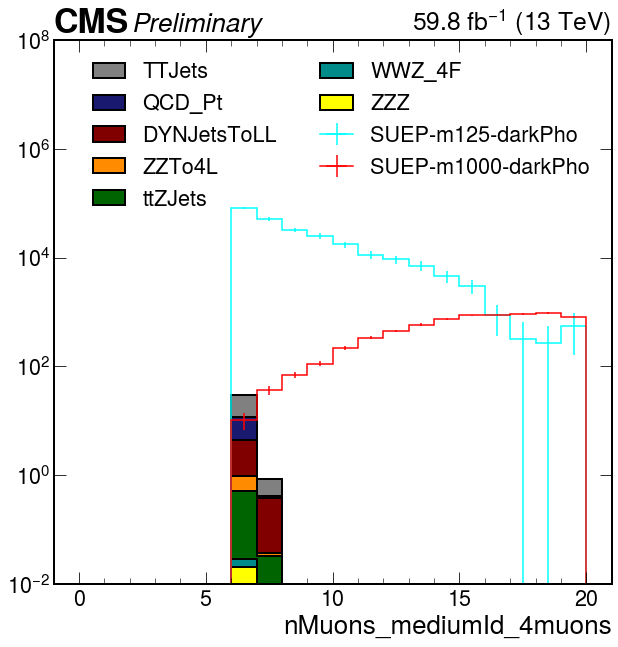

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246738, variance=6.93177e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=10053.6, variance=11446.6)


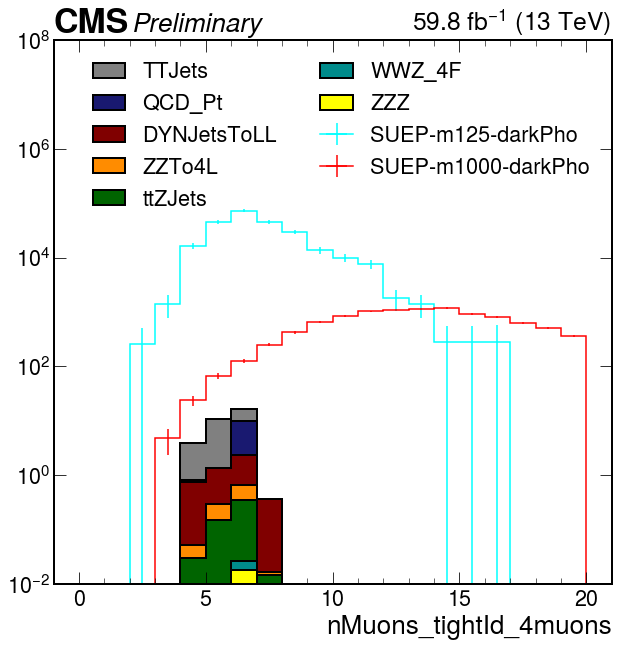

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=7034.57, variance=8012.53)


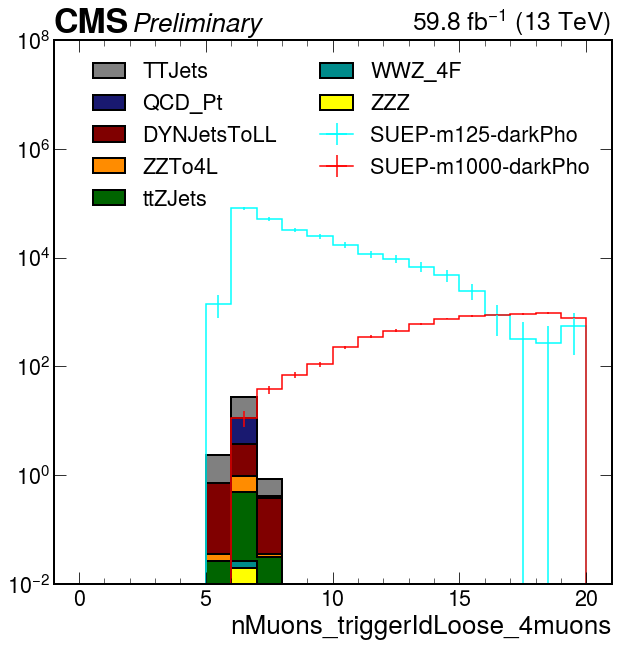

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=7000.25, variance=7973)


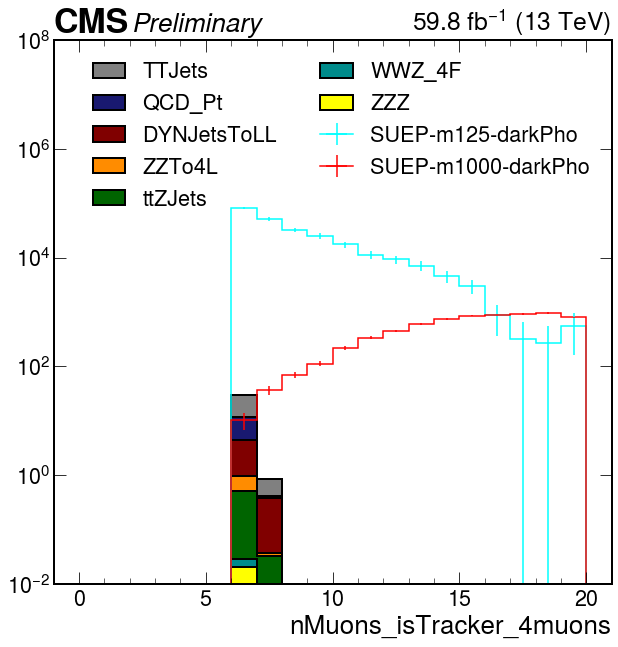

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246738, variance=6.93177e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=10772.1, variance=12264.4)


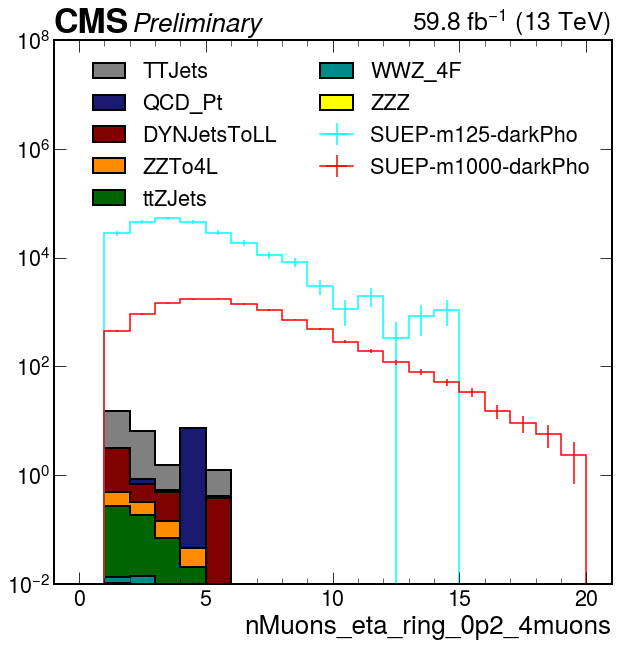

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246738, variance=6.93177e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=10562.2, variance=12019.4)


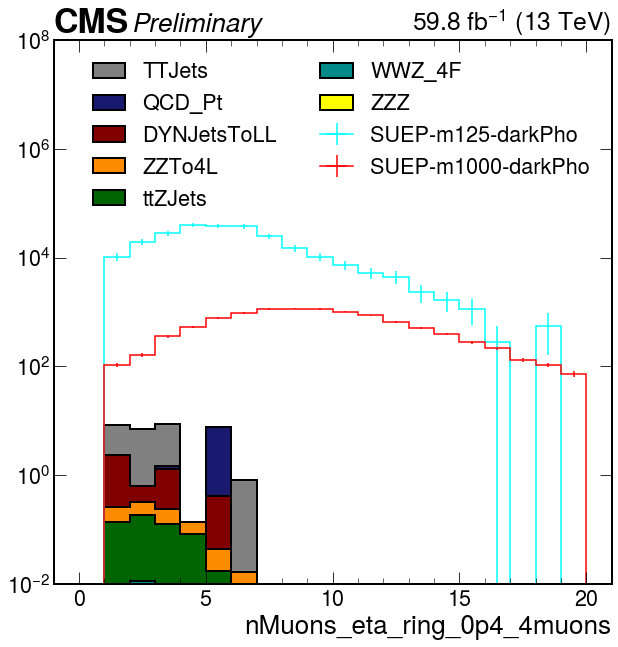

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=9141.17, variance=10408.2)


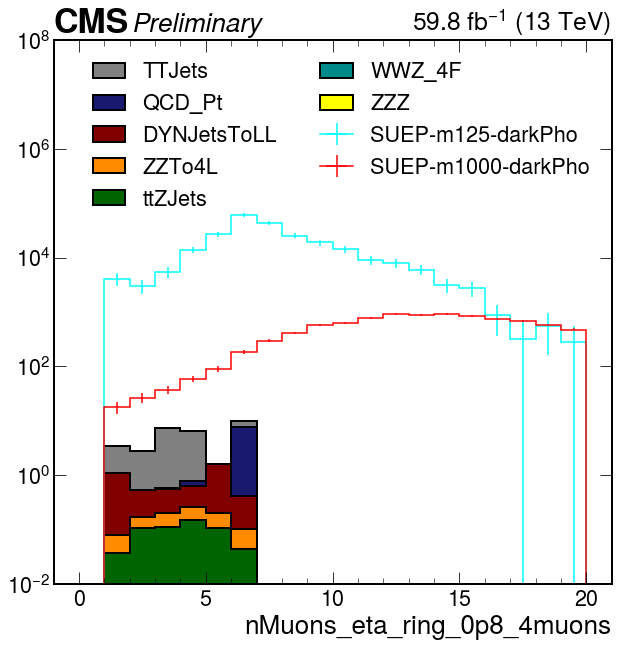

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=7165.43, variance=8159.69)


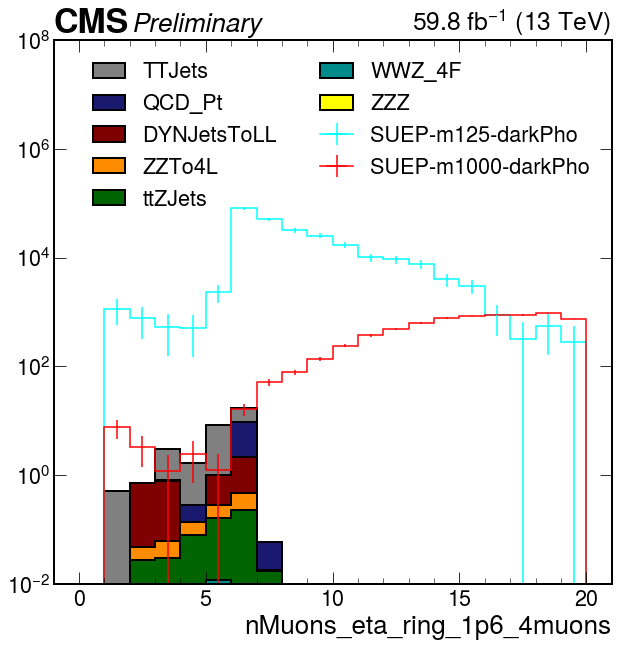

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=240178, variance=6.74363e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=2841.17, variance=3230.77)


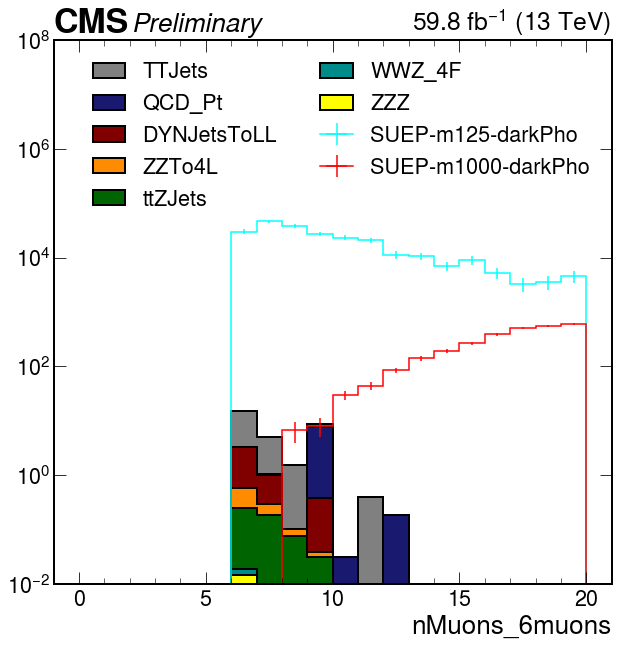

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=7055.68, variance=8037.3)


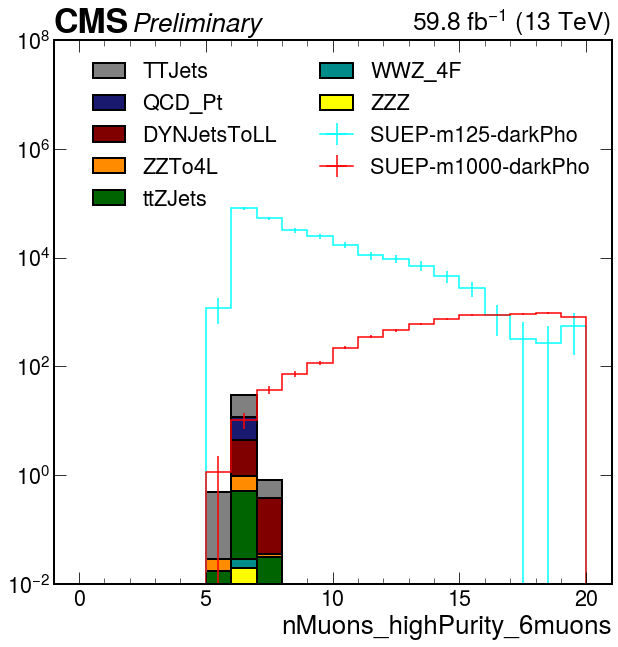

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=6999.28, variance=7972.06)


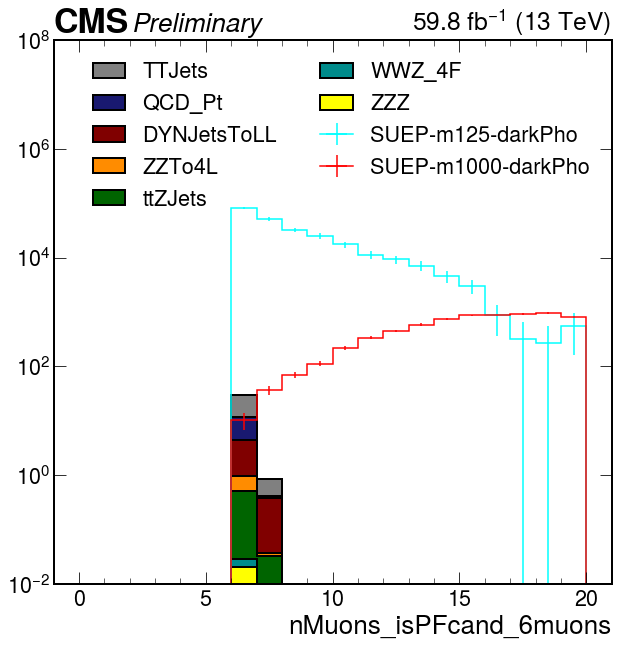

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=6999.28, variance=7972.06)


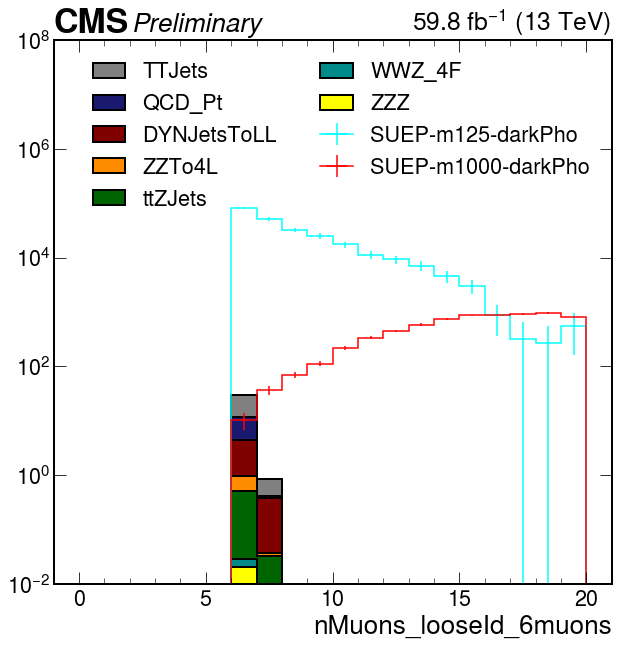

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=6999.28, variance=7972.06)


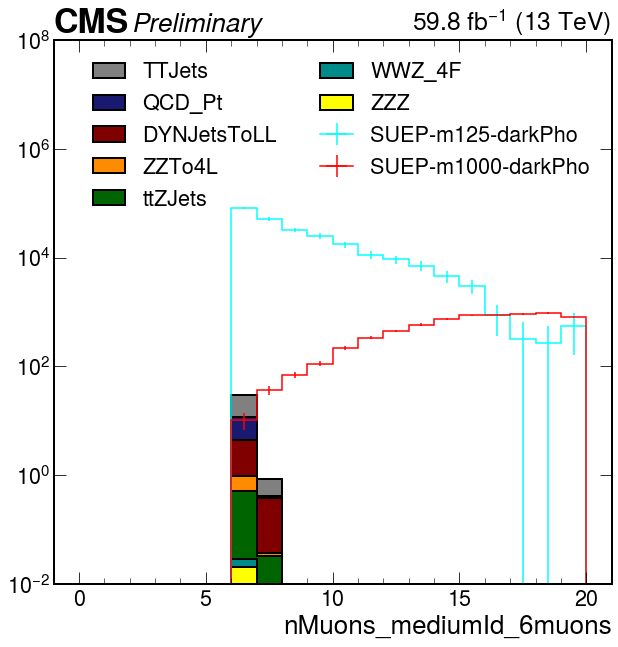

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246738, variance=6.93177e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=10053.6, variance=11446.6)


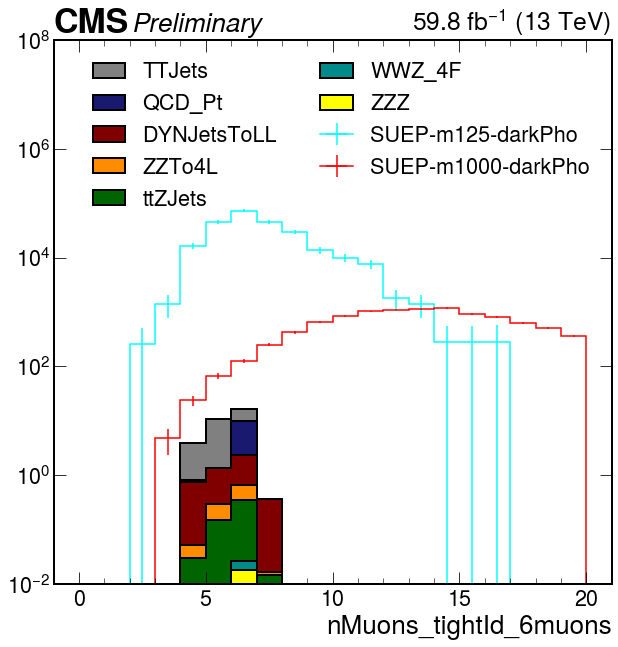

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=7034.57, variance=8012.53)


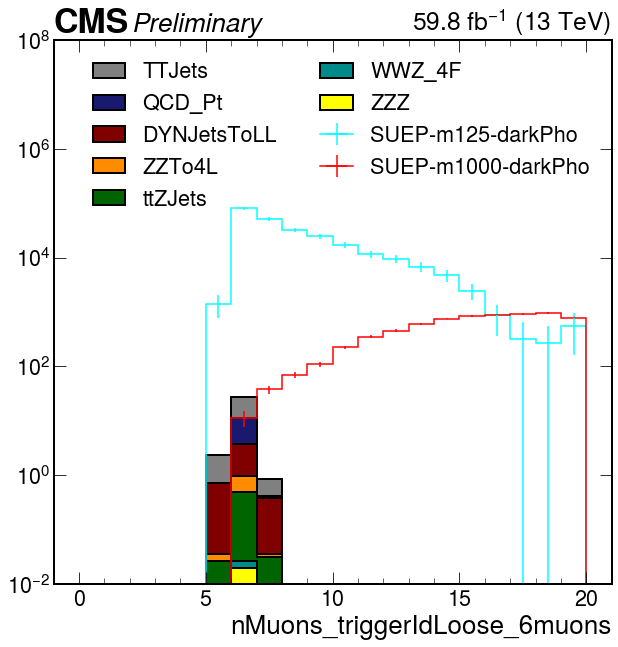

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=7000.25, variance=7973)


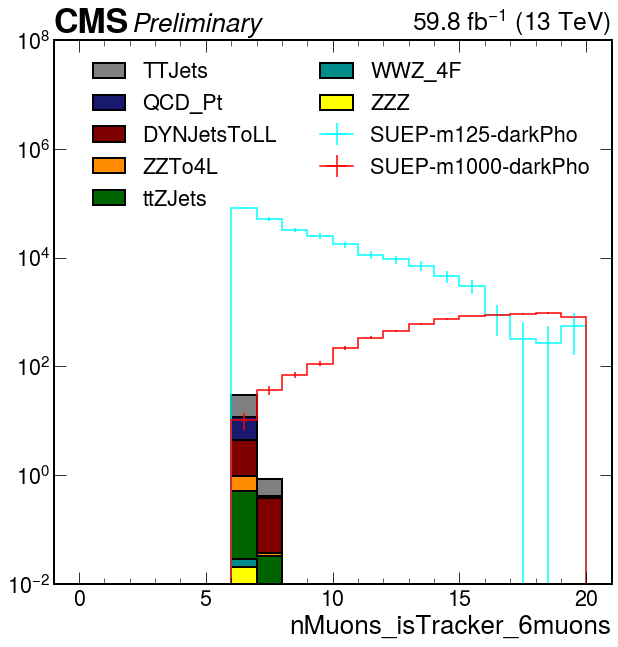

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246738, variance=6.93177e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=10772.1, variance=12264.4)


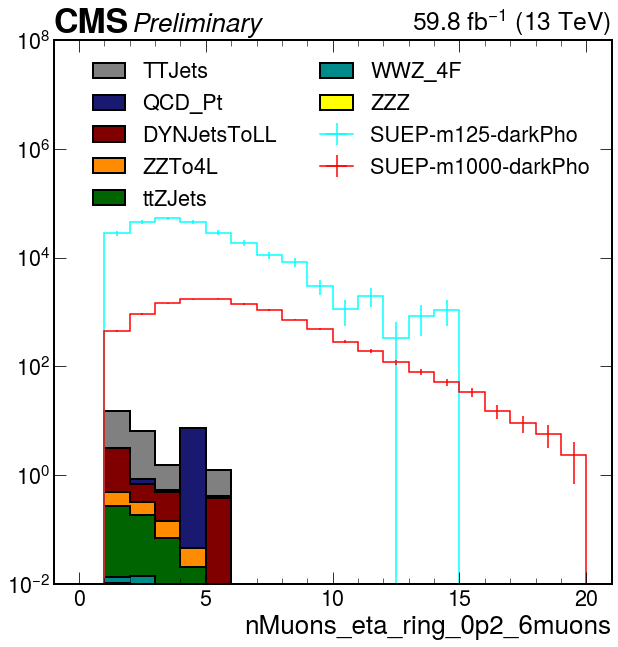

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246738, variance=6.93177e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=10562.2, variance=12019.4)


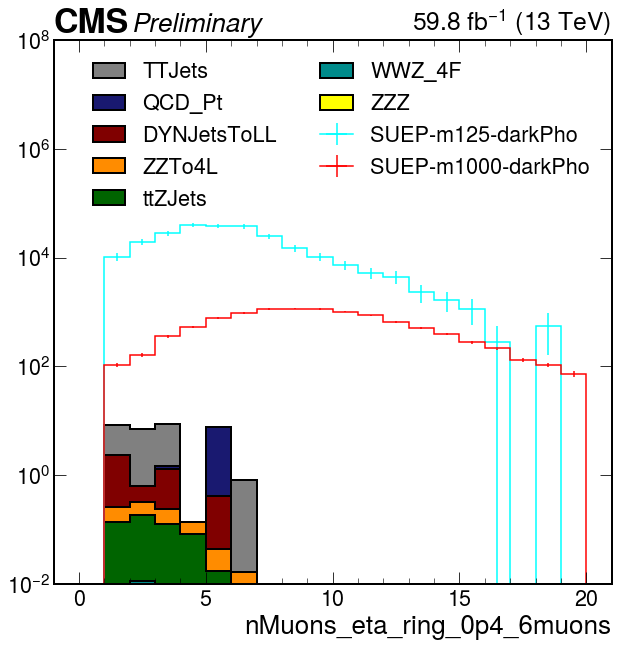

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=9141.17, variance=10408.2)


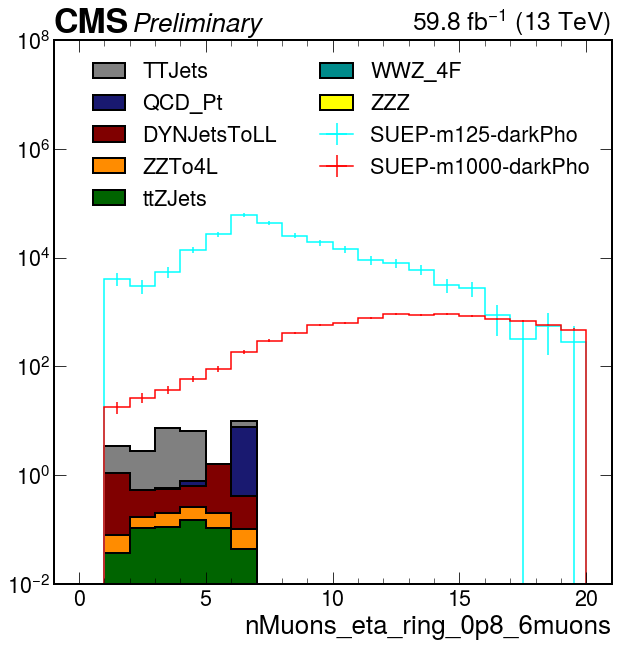

ZZZ_2018 WeightedSum(value=0.0203198, variance=2.35053e-06)
WWZ_4F_2018 WeightedSum(value=0.00904086, variance=1.02233e-05)
ttZJets_2018 WeightedSum(value=0.52035, variance=0.000514936)
ZZTo4L_2018 WeightedSum(value=0.466044, variance=0.000386824)
DYNJetsToLL_2018 WeightedSum(value=3.77394, variance=1.51829)
QCD_Pt_2018 WeightedSum(value=7.44523, variance=51.8358)
TTJets_2018 WeightedSum(value=18.7958, variance=29.4958)
SUEP-m125-darkPho_2018 WeightedSum(value=246455, variance=6.92376e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=7165.43, variance=8159.69)


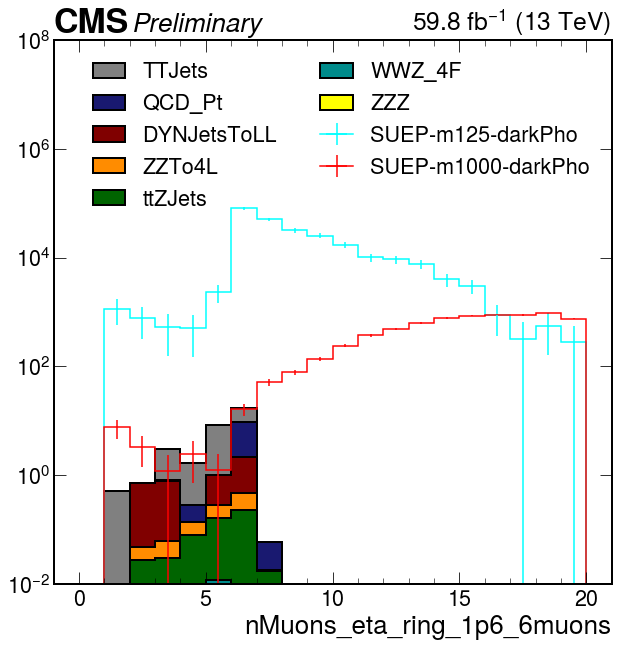

In [7]:
plot_labels = [
    x for x in plots['QCD_Pt_2018'].keys() if ('Muons' in x) and ('Inverted' not in x) and ('2D' not in x)
]
#plot_labels = ['muon_interIsolation_leading_Cluster']
year='2018'
decay='darkPho'

samples_bkg = [
    'ZZZ_2018',
    'WWZ_4F_2018',
    'ttZJets_2018',
    'ZZTo4L_2018',
    'DYNJetsToLL_2018',
    'QCD_Pt_2018',
    'TTJets_2018',
]
samples_signal = [
    f'SUEP-m125-{decay}_2018',
    #f'SUEP-m400-{decay}_2018',
    #f'SUEP-m750-{decay}_2018',
    f'SUEP-m1000-{decay}_2018',
]
density = False

for plot_label in plot_labels:
    fig, ax = plt.subplots(figsize=(10, 10))
    hep.cms.label(llabel='Preliminary',data=False, lumi=plot_utils.lumiLabel(year))
    h_bkg = []
    for sample in samples_bkg: 
        h = plots[sample][plot_label][:20j:]
        print(sample, h.sum())
        if density: h = h/h.sum().value
        h_bkg.append(h)
    hep.histplot(
        h_bkg,
        yerr=[np.sqrt(h.variances()) for h in h_bkg], 
        label=[s[:-5] for s in samples_bkg], 
        color=[plot_utils.default_colors[sample] for sample in samples_bkg],
        stack=True,
        histtype='fill',
        ec="black",
        lw=2,
    )
    for sample in samples_signal:
        h = plots[sample][plot_label][:20j:]
        print(sample, h.sum())
        if density: h = h/h.sum().value
        hep.histplot(
            h, 
            yerr=np.sqrt(h.variances()), 
            label=sample[:-5], 
            color=plot_utils.default_colors[sample],
        )

    # tweak these by hand, as needed
    plt.ylim(1e-2,1e8)
    plt.xlabel(plot_label.replace('_Cluster',''))
    #plt.xlabel(r'inter-isolation')
    plt.legend(ncol=2)
    plt.yscale("log")

    # save and show
    # plt.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    plt.show()

(0.8, 300)

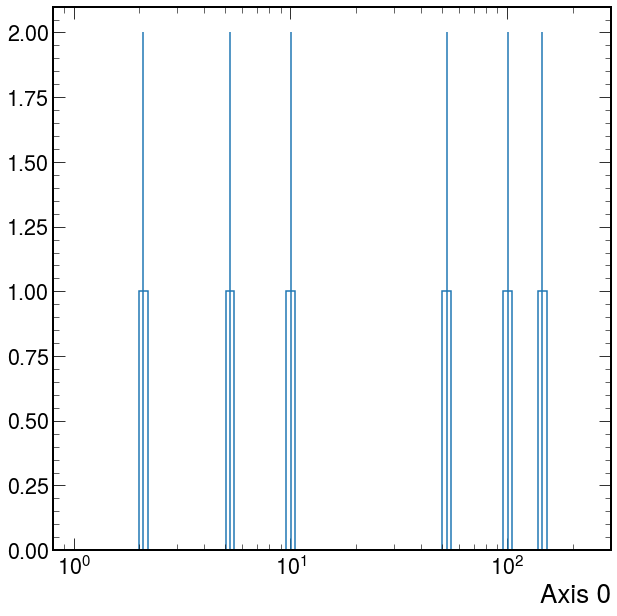

In [40]:
h0 = Hist.new.Regular(50, 2, 200, transform=hist.axis.transform.log).Double()
h0.fill([2.1, 5.5, 10., 55, 101, 150])
h0.plot()
plt.xscale('log')
plt.xlim(0.8,300)

In [61]:
np.all(np.isclose(h0.axes.widths[0], h0.axes.widths[0][0]))

False

ZZZ_2018 WeightedSum(value=0.348946, variance=4.10014e-05)
WWZ_4F_2018 WeightedSum(value=1.58059, variance=0.00195892)
ttZJets_2018 WeightedSum(value=26.978, variance=0.0272792)
ZZTo4L_2018 WeightedSum(value=46.0256, variance=0.0379786)
DYNJetsToLL_2018 WeightedSum(value=199.721, variance=85.5833)
QCD_Pt_2018 WeightedSum(value=3011.04, variance=941708)
TTJets_2018 WeightedSum(value=1231.35, variance=2010.89)


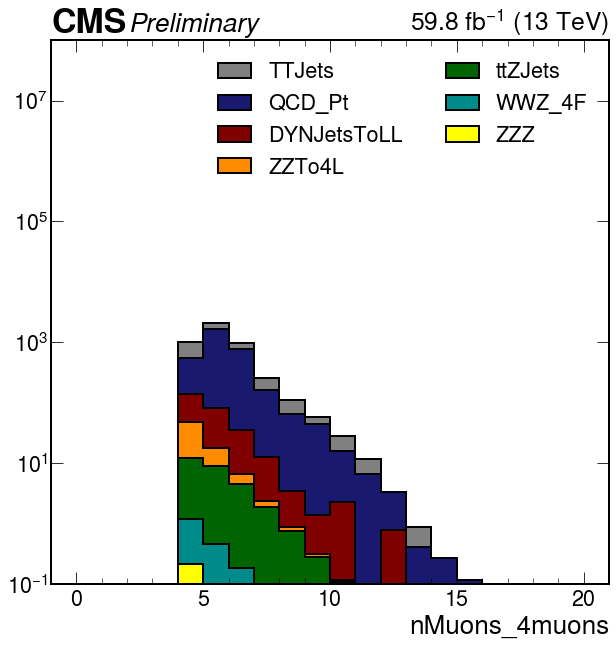

In [30]:
plot_labels = ['nMuons_Cluster_4muons']
year='2018'
decay='darkPho'

samples_bkg = [
    'ZZZ_2018',
    'WWZ_4F_2018',
    'ttZJets_2018',
    'ZZTo4L_2018',
    'DYNJetsToLL_2018',
    'QCD_Pt_2018',
    'TTJets_2018',
]
samples_signal = []
density = False

for plot_label in plot_labels:
    fig, ax = plt.subplots(figsize=(10, 10))
    hep.cms.label(llabel='Preliminary',data=False, lumi=plot_utils.lumiLabel(year))
    h_bkg = []
    for sample in samples_bkg: 
        h = plots[sample][plot_label][:20j:]
        print(sample, h.sum())
        if density: h = h/h.sum().value
        h_bkg.append(h)
    hep.histplot(
        h_bkg,
        yerr=[np.sqrt(h.variances()) for h in h_bkg], 
        label=[s[:-5] for s in samples_bkg], 
        color=[plot_utils.default_colors[sample] for sample in samples_bkg],
        stack=True,
        histtype='fill',
        ec="black",
        lw=2,
    )
    for sample in samples_signal:
        h = plots[sample][plot_label][:20j:]
        print(sample, h.sum())
        if density: h = h/h.sum().value
        hep.histplot(
            h, 
            yerr=np.sqrt(h.variances()), 
            label=sample[:-5], 
            color=plot_utils.default_colors[sample],
        )

    # tweak these by hand, as needed
    plt.ylim(1e-1,1e8)
    plt.xlabel(plot_label.replace('_Cluster',''))
    plt.legend(ncol=2)
    plt.yscale("log")

    # save and show
    plt.show()

ZZZ_2018 WeightedSum(value=0.289047, variance=3.39374e-05)
WWZ_4F_2018 WeightedSum(value=1.14454, variance=0.0014305)
ttZJets_2018 WeightedSum(value=18.8812, variance=0.0190775)
ZZTo4L_2018 WeightedSum(value=42.6018, variance=0.0351496)
DYNJetsToLL_2018 WeightedSum(value=166.725, variance=73.8786)
QCD_Pt_2018 WeightedSum(value=2615.53, variance=940107)
TTJets_2018 WeightedSum(value=998.35, variance=1605.02)


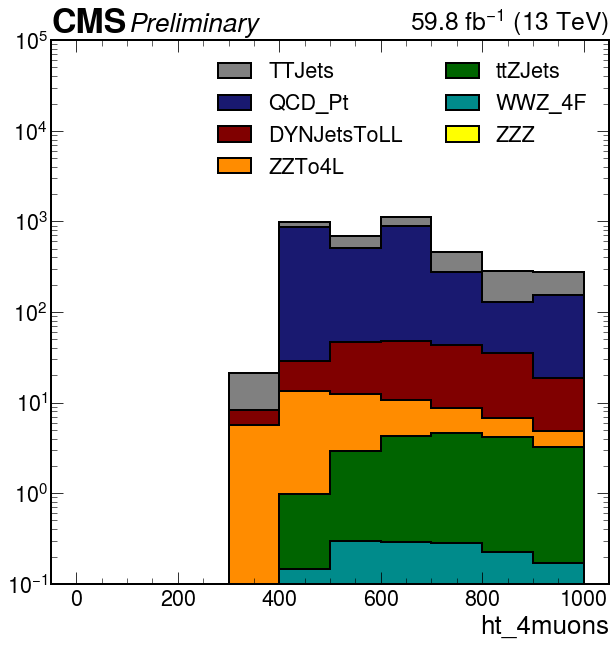

In [36]:
plot_labels = ['ht_Cluster_4muons']
year='2018'
decay='darkPho'

samples_bkg = [
    'ZZZ_2018',
    'WWZ_4F_2018',
    'ttZJets_2018',
    'ZZTo4L_2018',
    'DYNJetsToLL_2018',
    'QCD_Pt_2018',
    'TTJets_2018',
]
samples_signal = []
density = False

for plot_label in plot_labels:
    fig, ax = plt.subplots(figsize=(10, 10))
    hep.cms.label(llabel='Preliminary',data=False, lumi=plot_utils.lumiLabel(year))
    h_bkg = []
    for sample in samples_bkg: 
        h = plots[sample][plot_label][:1000j]
        print(sample, h.sum())
        if density: h = h/h.sum().value
        h_bkg.append(h)
    hep.histplot(
        h_bkg,
        yerr=[np.sqrt(h.variances()) for h in h_bkg], 
        label=[s[:-5] for s in samples_bkg], 
        color=[plot_utils.default_colors[sample] for sample in samples_bkg],
        stack=True,
        histtype='fill',
        ec="black",
        lw=2,
    )
    for sample in samples_signal:
        h = plots[sample][plot_label][:]
        print(sample, h.sum())
        if density: h = h/h.sum().value
        hep.histplot(
            h, 
            yerr=np.sqrt(h.variances()), 
            label=sample[:-5], 
            color=plot_utils.default_colors[sample],
        )

    # tweak these by hand, as needed
    plt.ylim(1e-1,1e5)
    plt.xlabel(plot_label.replace('_Cluster',''))
    plt.legend(ncol=2)
    plt.yscale("log")

    # save and show
    plt.show()

ZZZ_2018 WeightedSum(value=1.99747, variance=0.000228352)
WWZ_4F_2018 WeightedSum(value=5.59972, variance=0.00707962)
ttZJets_2018 WeightedSum(value=94.0472, variance=0.0951161)
ZZTo4L_2018 WeightedSum(value=1580.87, variance=1.31302)
DYNJetsToLL_2018 WeightedSum(value=6185.4, variance=9125.99)
QCD_Pt_2018 WeightedSum(value=276911, variance=1.05039e+10)
TTJets_2018 WeightedSum(value=13967.1, variance=19872)
SUEP-m125-darkPho_2018 WeightedSum(value=397677, variance=1.18941e+08)
SUEP-m1000-darkPho_2018 WeightedSum(value=232.2, variance=264.692)


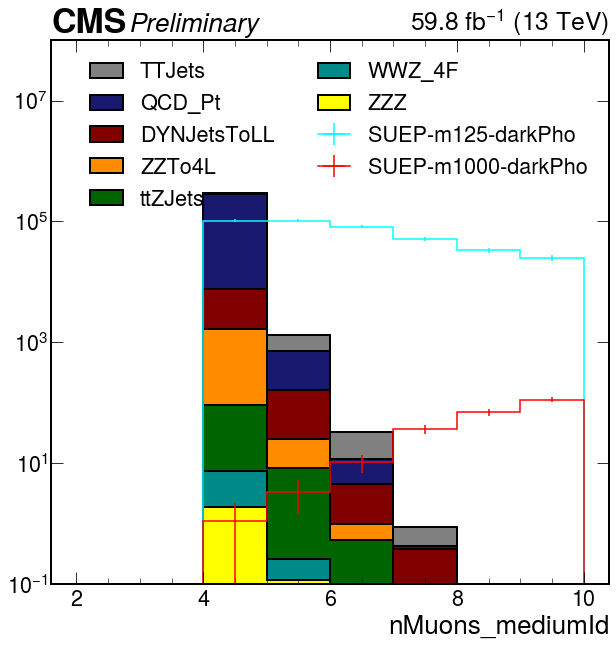

In [58]:
plot_labels = ['nMuons_mediumId_Cluster']
year='2018'
decay='darkPho'

samples_bkg = [
    'ZZZ_2018',
    'WWZ_4F_2018',
    'ttZJets_2018',
    'ZZTo4L_2018',
    'DYNJetsToLL_2018',
    'QCD_Pt_2018',
    'TTJets_2018',
]
samples_signal = [
    f'SUEP-m125-{decay}_2018',
    f'SUEP-m1000-{decay}_2018',
]
density = False

for plot_label in plot_labels:
    fig, ax = plt.subplots(figsize=(10, 10))
    hep.cms.label(llabel='Preliminary',data=False, lumi=plot_utils.lumiLabel(year))
    h_bkg = []
    for sample in samples_bkg: 
        h = plots[sample][plot_label][2j:10j:]
        print(sample, h.sum())
        if density: h = h/h.sum().value
        h_bkg.append(h)
    hep.histplot(
        h_bkg,
        yerr=[np.sqrt(h.variances()) for h in h_bkg], 
        label=[s[:-5] for s in samples_bkg], 
        color=[plot_utils.default_colors[sample] for sample in samples_bkg],
        stack=True,
        histtype='fill',
        ec="black",
        lw=2,
    )
    for sample in samples_signal:
        h = plots[sample][plot_label][2j:10j:]
        print(sample, h.sum())
        if density: h = h/h.sum().value
        hep.histplot(
            h, 
            yerr=np.sqrt(h.variances()), 
            label=sample[:-5], 
            color=plot_utils.default_colors[sample],
        )

    # tweak these by hand, as needed
    plt.ylim(1e-1,1e8)
    plt.xlabel(plot_label.replace('_Cluster',''))
    plt.legend(ncol=2)
    plt.yscale("log")

    # save and show
    # plt.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    plt.show()

## Plot HT

In [48]:
for i in plots['QCD_Pt_2018'].keys():
    if 'ht' in i:
        print(i)

ht_Cluster_4muons
ht_JEC_Cluster_4muons
ht_JEC_JER_up_Cluster_4muons
ht_JEC_JER_down_Cluster_4muons
ht_JEC_JES_up_Cluster_4muons
ht_JEC_JES_down_Cluster_4muons
A_ht_Cluster_4muons
A_ht_JEC_Cluster_4muons
A_ht_JEC_JER_up_Cluster_4muons
A_ht_JEC_JER_down_Cluster_4muons
A_ht_JEC_JES_up_Cluster_4muons
A_ht_JEC_JES_down_Cluster_4muons
B_ht_Cluster_4muons
B_ht_JEC_Cluster_4muons
B_ht_JEC_JER_up_Cluster_4muons
B_ht_JEC_JER_down_Cluster_4muons
B_ht_JEC_JES_up_Cluster_4muons
B_ht_JEC_JES_down_Cluster_4muons
C_ht_Cluster_4muons
C_ht_JEC_Cluster_4muons
C_ht_JEC_JER_up_Cluster_4muons
C_ht_JEC_JER_down_Cluster_4muons
C_ht_JEC_JES_up_Cluster_4muons
C_ht_JEC_JES_down_Cluster_4muons
D_ht_Cluster_4muons
D_ht_JEC_Cluster_4muons
D_ht_JEC_JER_up_Cluster_4muons
D_ht_JEC_JER_down_Cluster_4muons
D_ht_JEC_JES_up_Cluster_4muons
D_ht_JEC_JES_down_Cluster_4muons
nMuons_tightId_Cluster_4muons
ht_Cluster_6muons
ht_JEC_Cluster_6muons
ht_JEC_JER_up_Cluster_6muons
ht_JEC_JER_down_Cluster_6muons
ht_JEC_JES_up_Cluster_

DYNJetsToLL_2018 WeightedSum(value=199.721, variance=85.5833)
QCD_Pt_2018 WeightedSum(value=3011.05, variance=941708)
TTJets_2018 WeightedSum(value=1231.35, variance=2010.89)
WWZ_4F_2018 WeightedSum(value=1.58059, variance=0.00195892)
ZZTo4L_2018 WeightedSum(value=46.0256, variance=0.0379786)
ZZZ_2018 WeightedSum(value=0.348946, variance=4.10014e-05)
ttZJets_2018 WeightedSum(value=26.979, variance=0.0272802)


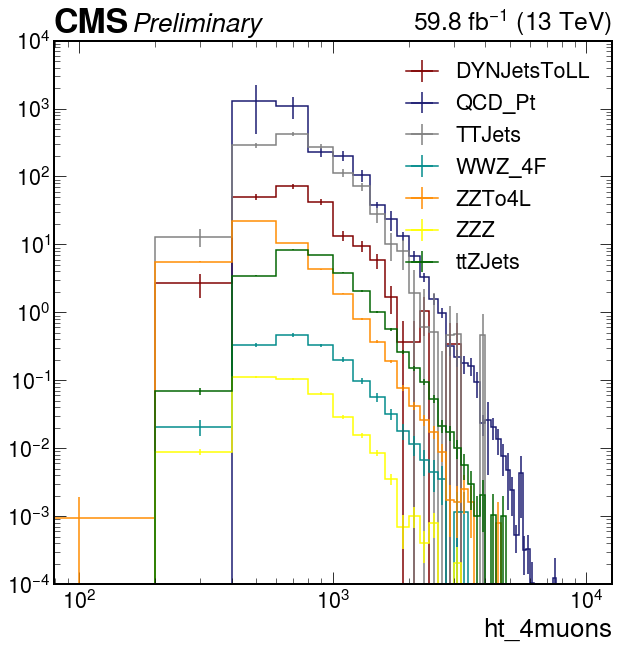

In [82]:
plot_labels = ["ht_Cluster_4muons"]
year='2018'

samples = [
    'DYNJetsToLL_2018',
    'QCD_Pt_2018',
    'TTJets_2018',
    'WWZ_4F_2018',
    'ZZTo4L_2018',
    'ZZZ_2018',
    'ttZJets_2018',
]
density = False

for plot_label in plot_labels:
    fig, ax = plt.subplots(figsize=(10, 10))
    hep.cms.label(llabel='Preliminary',data=False, lumi=plot_utils.lumiLabel(year))
    for sample in samples: 
        h = plots[sample][plot_label][0j:10000j:2j]
        print(sample, h.sum())
        if density: h = h/h.sum().value
        hep.histplot(
            h, 
            yerr=np.sqrt(h.variances()), 
            label=sample.strip("_2018"), 
            color=plot_utils.default_colors[sample],
        ) 

    # tweak these by hand, as needed
    plt.ylim(1e-4,1e4)
    plt.xlabel(plot_label.replace('_Cluster',''))
    plt.legend()
    plt.xscale("log")
    plt.yscale("log")

    # save and show
    plt.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    plt.show()

SUEP-m125-darkPho_2018 WeightedSum(value=35286.9, variance=1.69194e+07)
SUEP-m1000-darkPho_2018 WeightedSum(value=8670.22, variance=9858.76)
SUEP-m125-darkPhoHad_2018 WeightedSum(value=7547.26, variance=2.20641e+06)
SUEP-m1000-darkPhoHad_2018 WeightedSum(value=5186.8, variance=5884.61)


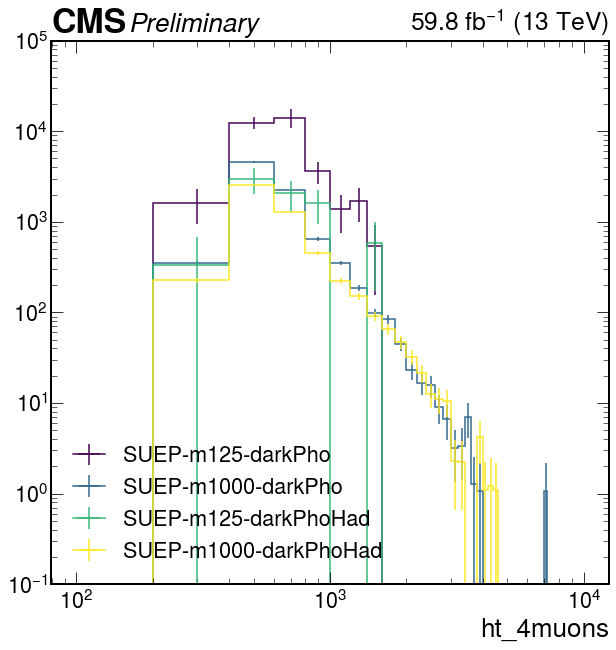

In [83]:
plot_labels = ["ht_Cluster_4muons"]
year='2018'

samples = [
    f'SUEP-m125-darkPho_2018',
    f'SUEP-m1000-darkPho_2018',
    f'SUEP-m125-darkPhoHad_2018',
    f'SUEP-m1000-darkPhoHad_2018',
]

N = 4
color_cycle = plt.cycler(color=plt.cm.viridis(np.linspace(0, 1, N)))
plt.rcParams["axes.prop_cycle"] = color_cycle

density = False

for plot_label in plot_labels:
    fig, ax = plt.subplots(figsize=(10, 10))
    hep.cms.label(llabel='Preliminary',data=False, lumi=plot_utils.lumiLabel(year))
    for sample in samples: 
        h = plots[sample][plot_label][0j:10000j:2j]
        print(sample, h.sum())
        if density: h = h/h.sum().value
        linestyle='-'
        if "darkPhoHad" in sample:
            linestyle=':'
        hep.histplot(
            h, 
            yerr=np.sqrt(h.variances()), 
            label=sample.strip("_2018"), 
        ) 

    # tweak these by hand, as needed
    plt.ylim(1e-1,1e5)
    plt.xlabel(plot_label.replace('_Cluster',''))
    plt.legend()
    plt.xscale("log")
    plt.yscale("log")

    # save and show
    plt.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    plt.show()

In [84]:
for i in plots['QCD_Pt_2018'].keys():
    if 'jet' in i:
        print(i)

ngood_fastjets_Cluster_4muons
ngood_ak4jets_Cluster_4muons
A_ngood_fastjets_Cluster_4muons
A_ngood_ak4jets_Cluster_4muons
B_ngood_fastjets_Cluster_4muons
B_ngood_ak4jets_Cluster_4muons
C_ngood_fastjets_Cluster_4muons
C_ngood_ak4jets_Cluster_4muons
D_ngood_fastjets_Cluster_4muons
D_ngood_ak4jets_Cluster_4muons
2D_nMuons_mediumId_vs_ngood_ak4jets_Cluster_4muons
ngood_fastjets_Cluster_6muons
ngood_ak4jets_Cluster_6muons
A_ngood_fastjets_Cluster_6muons
A_ngood_ak4jets_Cluster_6muons
B_ngood_fastjets_Cluster_6muons
B_ngood_ak4jets_Cluster_6muons
C_ngood_fastjets_Cluster_6muons
C_ngood_ak4jets_Cluster_6muons
D_ngood_fastjets_Cluster_6muons
D_ngood_ak4jets_Cluster_6muons
2D_nMuons_mediumId_vs_ngood_ak4jets_Cluster_6muons


DYNJetsToLL_2018 WeightedSum(value=199.721, variance=85.5833)
QCD_Pt_2018 WeightedSum(value=3011.05, variance=941708)
TTJets_2018 WeightedSum(value=1231.35, variance=2010.89)
WWZ_4F_2018 WeightedSum(value=1.58059, variance=0.00195892)
ZZTo4L_2018 WeightedSum(value=46.0256, variance=0.0379786)
ZZZ_2018 WeightedSum(value=0.348946, variance=4.10014e-05)
ttZJets_2018 WeightedSum(value=26.979, variance=0.0272802)


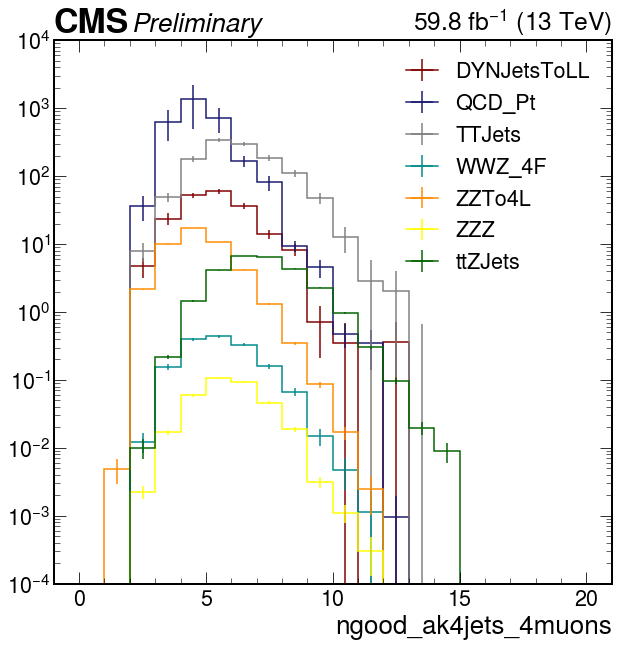

In [86]:
plot_labels = ["ngood_ak4jets_Cluster_4muons"]
year='2018'

samples = [
    'DYNJetsToLL_2018',
    'QCD_Pt_2018',
    'TTJets_2018',
    'WWZ_4F_2018',
    'ZZTo4L_2018',
    'ZZZ_2018',
    'ttZJets_2018',
]
density = False

for plot_label in plot_labels:
    fig, ax = plt.subplots(figsize=(10, 10))
    hep.cms.label(llabel='Preliminary',data=False, lumi=plot_utils.lumiLabel(year))
    for sample in samples: 
        h = plots[sample][plot_label]
        print(sample, h.sum())
        if density: h = h/h.sum().value
        hep.histplot(
            h, 
            yerr=np.sqrt(h.variances()), 
            label=sample.strip("_2018"), 
            color=plot_utils.default_colors[sample],
        ) 

    # tweak these by hand, as needed
    plt.ylim(1e-4,1e4)
    plt.xlabel(plot_label.replace('_Cluster',''))
    plt.legend()
    plt.yscale("log")
    plt.show()

## 2D Plots

Plot some of the 2D histograms for any number of samples in the same plot.<br>
Parameters:<br>
`plot_label`: _str_, which plot to show.<br>
`samples`: _list of str_, which samples to include in the plot.<br>
`draw_lines`: _bool_, whether to draw lines in following arguments.<br>
`lines_<dimension>`: _list of floats_, draws lines at given values.

In [11]:
for i in plots['QCD_Pt_2018'].keys():
    if '2D' in i:
        print(i)

2D_SUEP_S1_vs_ntracks_Cluster_4muons
2D_SUEP_S1_vs_SUEP_nconst_Cluster_4muons
2D_SUEP_S1_vs_nMuons_mediumId_Cluster_4muons
2D_SUEP_nconst_vs_SUEP_pt_avg_Cluster_4muons
2D_nMuons_mediumId_vs_ngood_ak4jets_Cluster_4muons
2D_nMuons_mediumId_vs_muon_interIsolation_1p6_Cluster_4muons
2D_SUEP_S1_vs_ntracks_Cluster_6muons
2D_SUEP_S1_vs_SUEP_nconst_Cluster_6muons
2D_SUEP_S1_vs_nMuons_mediumId_Cluster_6muons
2D_SUEP_nconst_vs_SUEP_pt_avg_Cluster_6muons
2D_nMuons_mediumId_vs_ngood_ak4jets_Cluster_6muons
2D_nMuons_mediumId_vs_muon_interIsolation_1p6_Cluster_6muons


In [15]:
for i in plots.keys():
    print(i)

SUEP-m1000-darkPhoHad_2018
SUEP-m1000-darkPho_2018
SUEP-m125-darkPhoHad_2018
SUEP-m125-darkPho_2018
SUEP-m400-darkPhoHad_2018
SUEP-m400-darkPho_2018
SUEP-m750-darkPhoHad_2018
SUEP-m750-darkPho_2018
QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_test_2018
bkg_2018
QCD_Pt_2018
QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_test_2018
QCD_Pt_15to30_TuneCP5_13TeV_pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_test_2018
QCD_Pt_170to300_TuneCP5_13TeV_pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_test_2018
QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_test_2018
QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_test_2018
QCD_Pt_300to470_TuneCP5_1

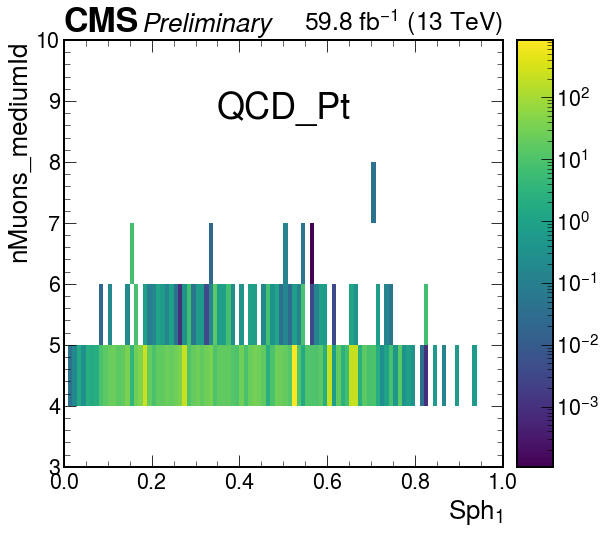

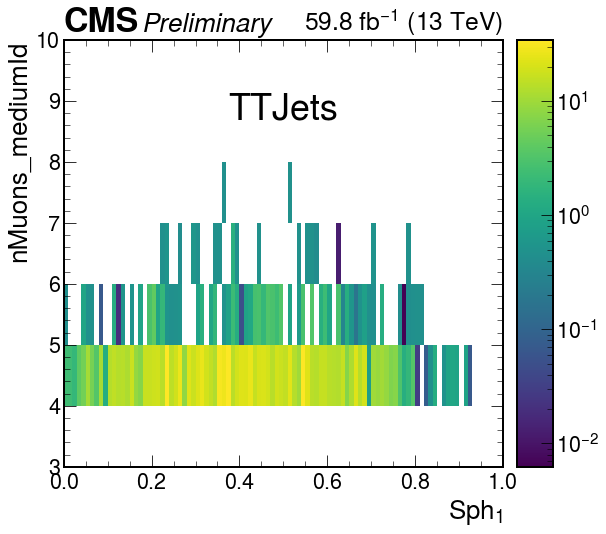

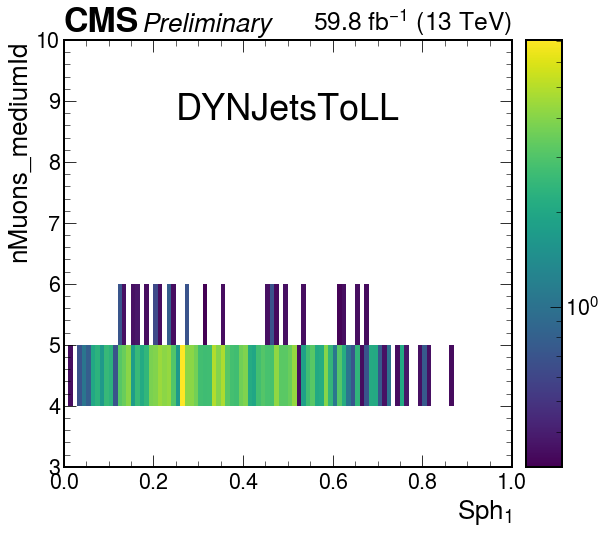

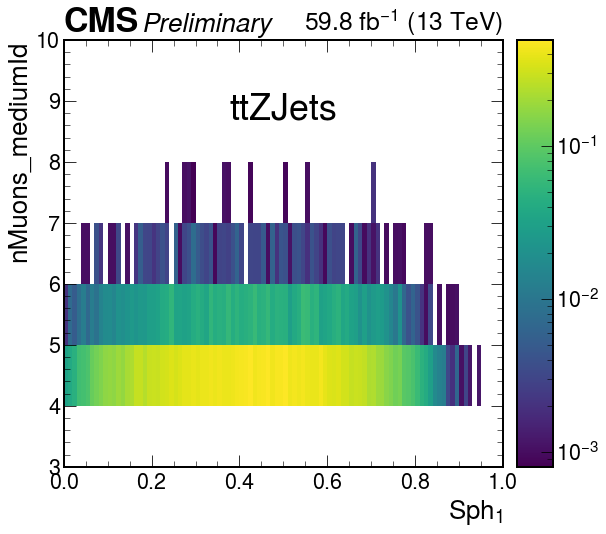

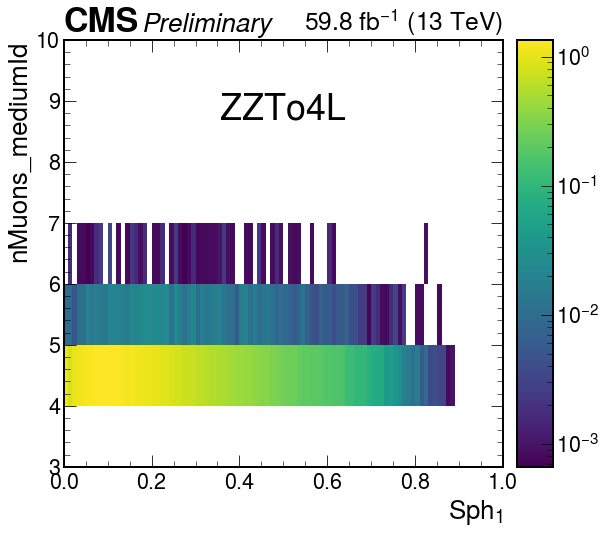

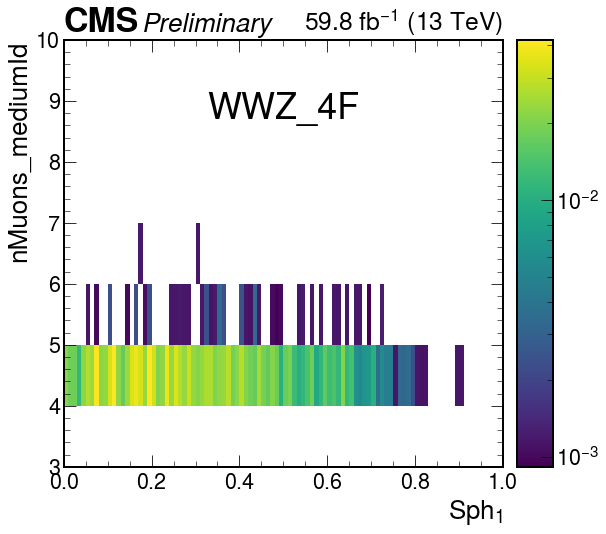

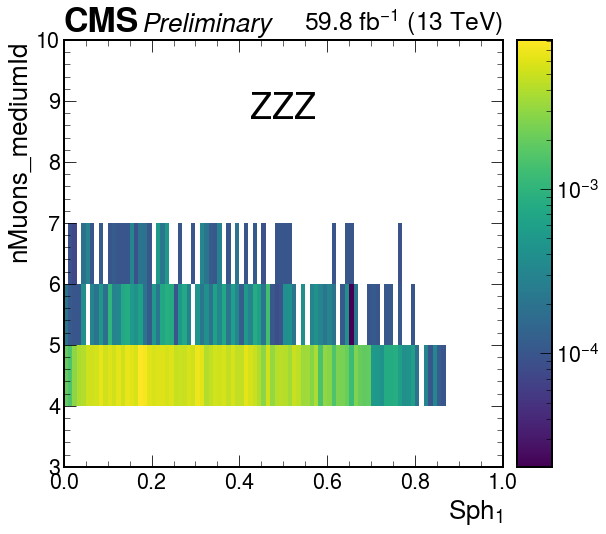

In [38]:
plot_label = '2D_SUEP_S1_vs_nMuons_mediumId_Cluster_4muons'
samples = [
    'QCD_Pt_2018',
    'TTJets_2018',
    'DYNJetsToLL_2018',
    'ttZJets_2018',
    'ZZTo4L_2018',
    'WWZ_4F_2018',
    'ZZZ_2018',
]
for sample in samples:
    if plots[sample][plot_label].sum().value == 0:
        print("Histogram empty for sample", sample)
    h = plots[sample][plot_label]

    fig, ax1 = plt.subplots(1, 1, figsize=(9,8))
    hep.hist2dplot(
        h[:,3j:10j], 
        norm=matplotlib.colors.LogNorm(),
        label=sample,
        ax=ax1,
    )
    hep.cms.label(
        llabel='Preliminary',
        data=False, 
        lumi=plot_utils.lumiLabel('2018')
    )

    ax1.text(0.5, 8.7,sample.strip('_2018'), fontsize=36, ha='center')
    fig.tight_layout()
    plt.show()

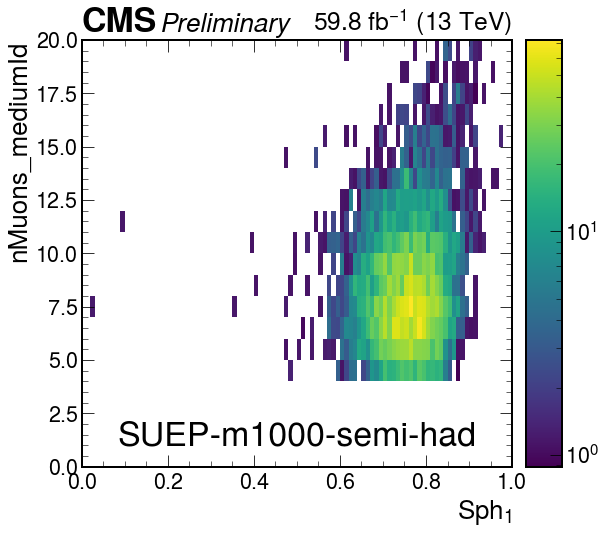

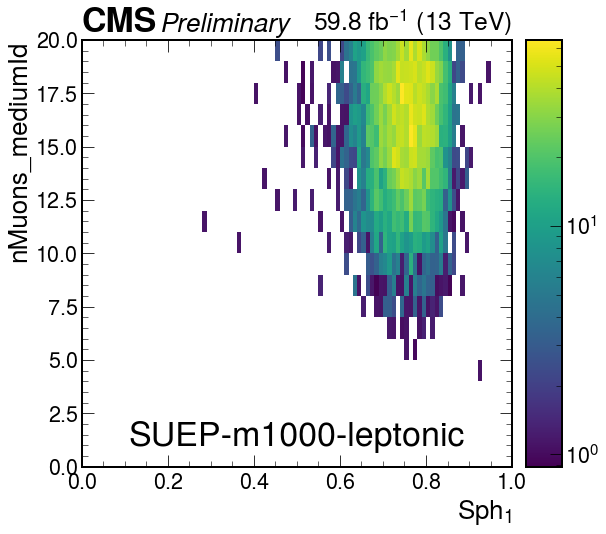

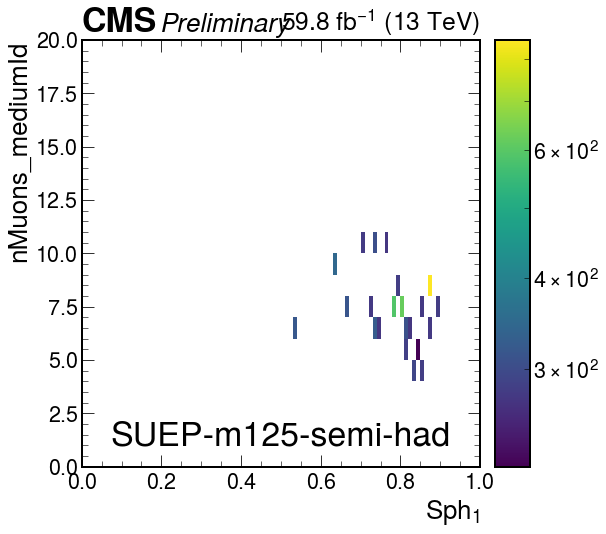

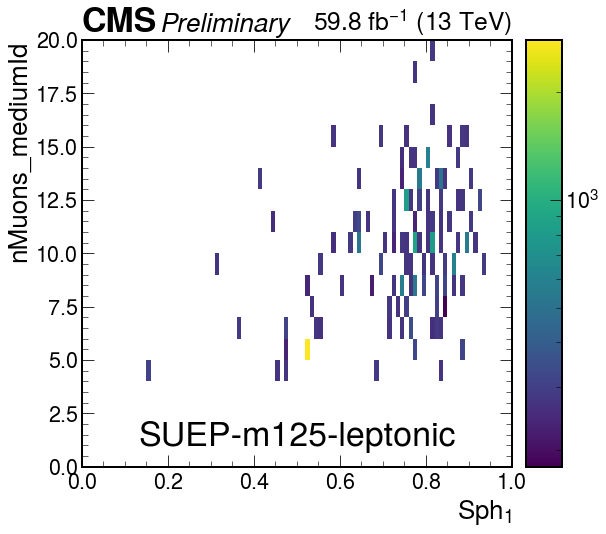

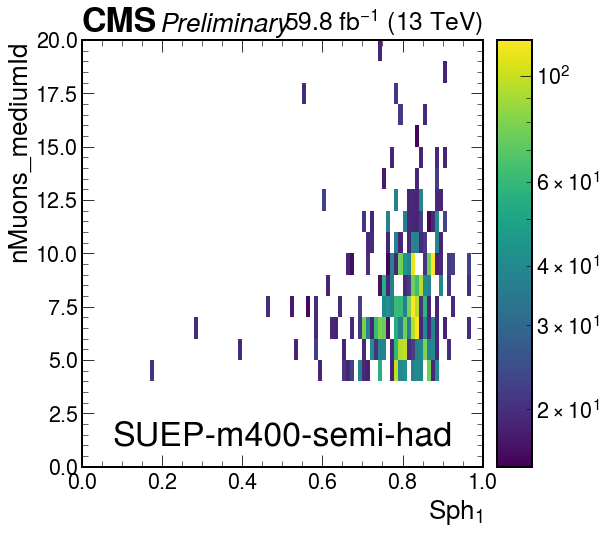

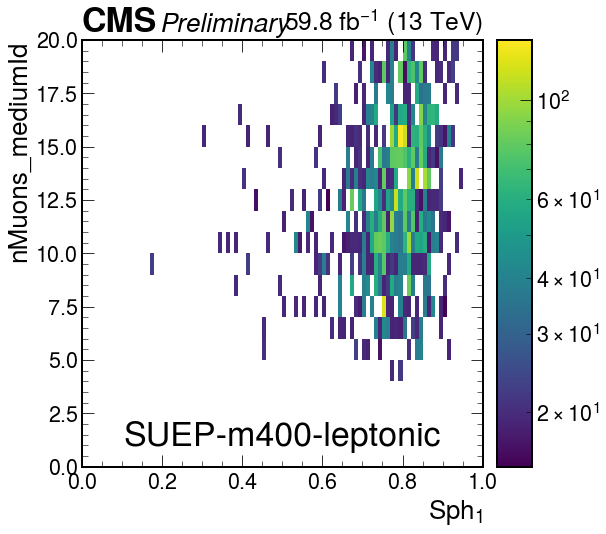

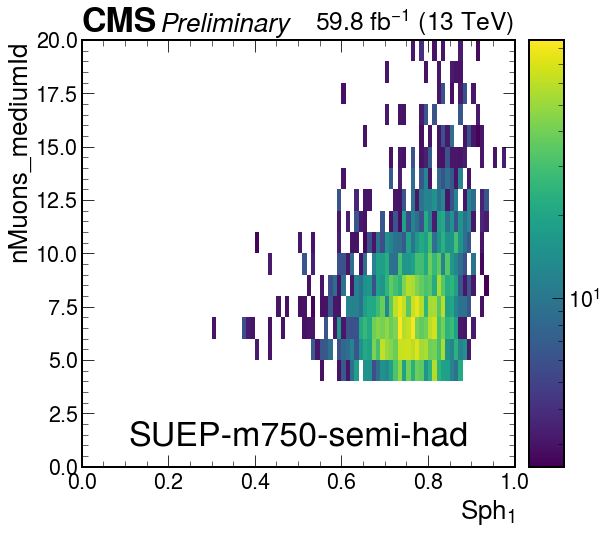

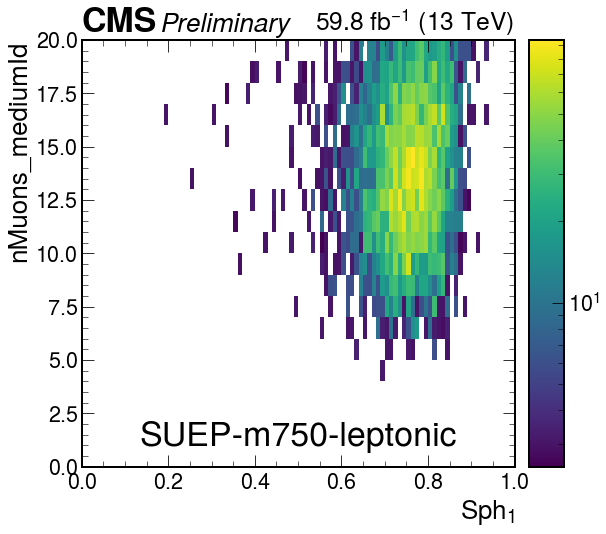

In [45]:
plot_label = '2D_SUEP_S1_vs_nMuons_mediumId_Cluster_4muons'
samples = [
    'SUEP-m1000-darkPhoHad_2018',
    'SUEP-m1000-darkPho_2018',
    'SUEP-m125-darkPhoHad_2018',
    'SUEP-m125-darkPho_2018',
    'SUEP-m400-darkPhoHad_2018',
    'SUEP-m400-darkPho_2018',
    'SUEP-m750-darkPhoHad_2018',
    'SUEP-m750-darkPho_2018',
]
for sample in samples:
    if plots[sample][plot_label].sum().value == 0:
        print("Histogram empty for sample", sample)
    h = plots[sample][plot_label]

    fig, ax1 = plt.subplots(1, 1, figsize=(9,8))
    hep.hist2dplot(
        h[:,0j:20j], 
        norm=matplotlib.colors.LogNorm(),
        label=sample,
        ax=ax1,
    )
    hep.cms.label(
        llabel='Preliminary',
        data=False, 
        lumi=plot_utils.lumiLabel('2018')
    )

    ax1.text(
        0.5, 
        1,
        sample.strip('_2018').replace("darkPhoHad", "semi-had").replace("darkPho", "leptonic"), 
        fontsize=34, 
        ha='center'
    )
    fig.tight_layout()
    plt.show()

In [48]:
plots['SUEP-m125-darkPho_2018']['2D_nMuons_mediumId_vs_ngood_ak4jets_Cluster']

Hist(
  Regular(20, 0, 20, name='nMuons_mediumId_Cluster', label='nMuons_mediumId'),
  Regular(20, 0, 20, name='ngood_ak4jets_Cluster', label='ngood_ak4jets'),
  storage=Weight()) # Sum: WeightedSum(value=246725, variance=6.93102e+07) (WeightedSum(value=247008, variance=6.93903e+07) with flow)

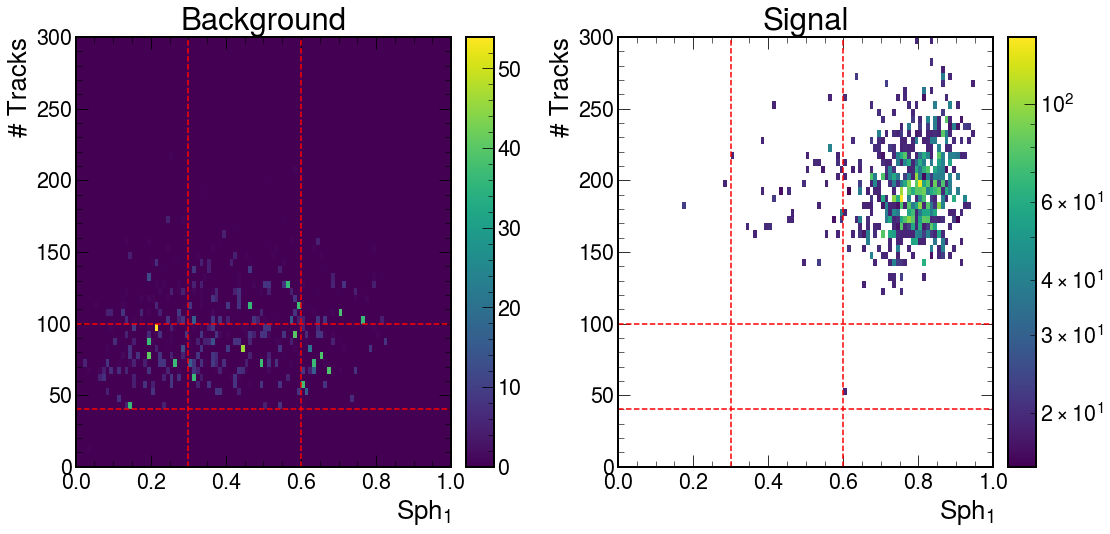

In [8]:
plot_label = '2D_SUEP_S1_vs_ntracks_Cluster_4muons'
samples_bkg = [    
    'QCD_HT_2018',
]
signal = 'SUEP-m400-darkPho_2018'

draw_lines = True
lines_x = [0.3, 0.6]
lines_y = [40, 100]

h_bkg = None
for sample in samples_bkg:
    if plots[sample][plot_label].sum().value == 0:
        print("Histogram empty for sample", sample)
        continue
    if h_bkg is None:
        h_bkg = plots[sample][plot_label]
    else:
        h_bkg += plots[sample][plot_label]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
hep.hist2dplot(
    h_bkg[:,:300j], 
    #norm=matplotlib.colors.LogNorm(),
    label=sample,
    ax=ax1,
)  

h_signal = plots[signal][plot_label]
hep.hist2dplot(
    h_signal[:,:300j], 
    norm=matplotlib.colors.LogNorm(),
    label=sample,
    ax=ax2,
)

# draw lines to visualize selections, ABCD regions, etc.
if draw_lines:
    for y in lines_y: 
        ax1.plot([0,10000], [y,y], color='red', linestyle='dashed')
        ax2.plot([0,10000], [y,y], color='red', linestyle='dashed')
    for x in lines_x: 
        ax1.plot([x,x], [0,1000], color='red', linestyle='dashed')
        ax2.plot([x,x], [0,1000], color='red', linestyle='dashed')
    
    #plt.xlim(0,200)
    #plt.savefig(output_label + plot_label+ "_"+sample+file_ext)

ax1.set_title("Background")
ax2.set_title("Signal")
fig.tight_layout()
plt.show()

In [14]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
samples_bkg = [    
    'bkg_2018',
]
signal = 'SUEP-m400-darkPho_2018'

draw_lines = True
lines_x = [0.2, 0.6]
lines_y = [15, 50]

h_bkg = None
for sample in samples_bkg:
    if plots[sample][plot_label].sum().value == 0:
        print("Histogram empty for sample", sample)
        continue
    if h_bkg is None:
        h_bkg = plots[sample][plot_label]
    else:
        h_bkg += plots[sample][plot_label]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
hep.hist2dplot(
    h_bkg[:,:200j], 
    norm=matplotlib.colors.LogNorm(),
    label=sample,
    ax=ax1,
)  

h_signal = plots[signal][plot_label]
hep.hist2dplot(
    h_signal[:,:400j], 
    norm=matplotlib.colors.LogNorm(),
    label=sample,
    ax=ax2,
)

# draw lines to visualize selections, ABCD regions, etc.
if draw_lines:
    for y in lines_y: 
        ax1.plot([0,10000], [y,y], color='red', linestyle='dashed')
        ax2.plot([0,10000], [y,y], color='red', linestyle='dashed')
    for x in lines_x: 
        ax1.plot([x,x], [0,1000], color='red', linestyle='dashed')
        ax2.plot([x,x], [0,1000], color='red', linestyle='dashed')
    
    #plt.xlim(0,200)
    #plt.savefig(output_label + plot_label+ "_"+sample+file_ext)

ax1.set_title("Background")
ax2.set_title("Signal")
fig.tight_layout()
plt.show()

KeyError: '2D_SUEP_S1_vs_SUEP_nconst_Cluster'

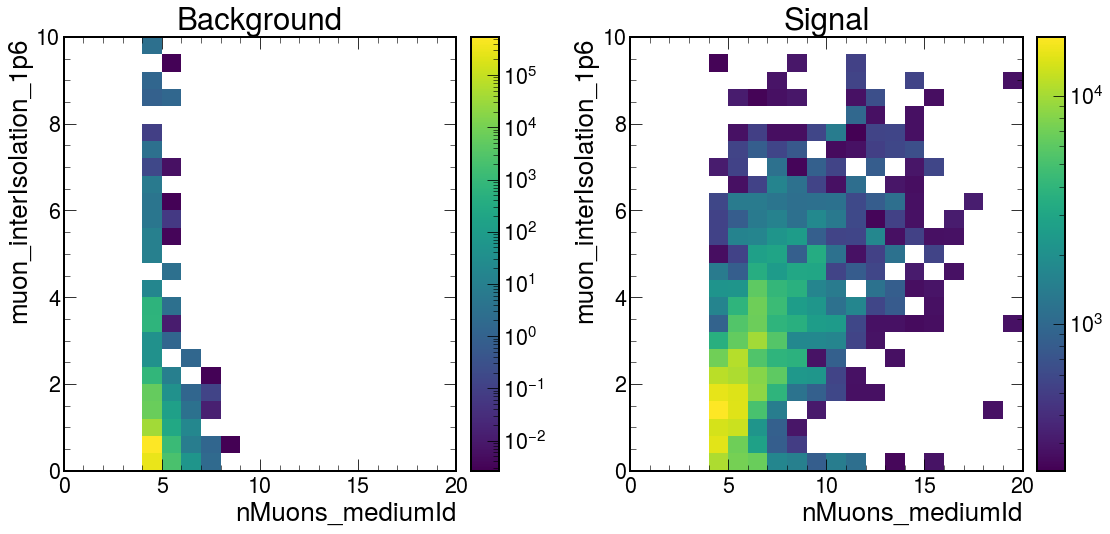

In [31]:
plot_label = '2D_nMuons_mediumId_vs_muon_interIsolation_1p6_Cluster'
samples_bkg = [    
    'DYNJetsToLL_2018',
    'QCD_Pt_2018',
    'TTJets_2018',
    'WWZ_4F_2018',
    'ZZTo4L_2018',
    'ZZZ_2018',
    'ttZJets_2018',
]
signal = 'SUEP-m125-darkPho_2018'

draw_lines = True
lines_x = []
lines_y = []

h_bkg = None
for sample in samples_bkg:
    if plots[sample][plot_label].sum().value == 0:
        print("Histogram empty for sample", sample)
        continue
    if h_bkg is None:
        h_bkg = plots[sample][plot_label]
    else:
        h_bkg += plots[sample][plot_label]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
hep.hist2dplot(
    h_bkg, 
    norm=matplotlib.colors.LogNorm(),
    label=sample,
    ax=ax1,
)  

h_signal = plots[signal][plot_label]
hep.hist2dplot(
    h_signal, 
    norm=matplotlib.colors.LogNorm(),
    label=sample,
    ax=ax2,
)

# draw lines to visualize selections, ABCD regions, etc.
if draw_lines:
    for y in lines_y: 
        ax1.plot([0,10000], [y,y], color='red', linestyle='dashed')
        ax2.plot([0,10000], [y,y], color='red', linestyle='dashed')
    for x in lines_x: 
        ax1.plot([x,x], [0,1000], color='red', linestyle='dashed')
        ax2.plot([x,x], [0,1000], color='red', linestyle='dashed')
    
    #plt.xlim(0,200)
    #plt.savefig(output_label + plot_label+ "_"+sample+file_ext)

ax1.set_title("Background")
ax2.set_title("Signal")
fig.tight_layout()
plt.show()

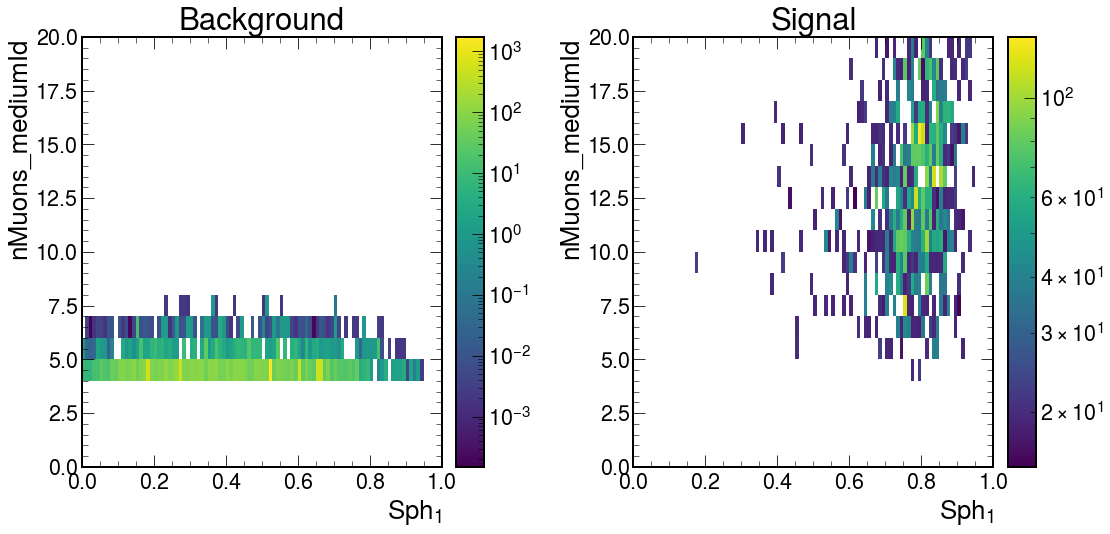

In [48]:
plot_label = '2D_SUEP_S1_vs_nMuons_mediumId_Cluster'
samples_bkg = [    
    'DYNJetsToLL_2018',
    'QCD_Pt_2018',
    'TTJets_2018',
    'WWZ_4F_2018',
    'ZZTo4L_2018',
    'ZZZ_2018',
    'ttZJets_2018',
]
signal = 'SUEP-m400-darkPho_2018'

draw_lines = True
lines_x = []
lines_y = []

h_bkg = None
for sample in samples_bkg:
    if plots[sample][plot_label].sum().value == 0:
        print("Histogram empty for sample", sample)
        continue
    if h_bkg is None:
        h_bkg = plots[sample][plot_label]
    else:
        h_bkg += plots[sample][plot_label]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
hep.hist2dplot(
    h_bkg, 
    norm=matplotlib.colors.LogNorm(),
    label=sample,
    ax=ax1,
)  

h_signal = plots[signal][plot_label]
hep.hist2dplot(
    h_signal, 
    norm=matplotlib.colors.LogNorm(),
    label=sample,
    ax=ax2,
)

# draw lines to visualize selections, ABCD regions, etc.
if draw_lines:
    for y in lines_y: 
        ax1.plot([0,10000], [y,y], color='red', linestyle='dashed')
        ax2.plot([0,10000], [y,y], color='red', linestyle='dashed')
    for x in lines_x: 
        ax1.plot([x,x], [0,1000], color='red', linestyle='dashed')
        ax2.plot([x,x], [0,1000], color='red', linestyle='dashed')
    
    #plt.xlim(0,200)
    #plt.savefig(output_label + plot_label+ "_"+sample+file_ext)

ax1.set_title("Background")
ax2.set_title("Signal")
fig.tight_layout()
plt.show()

## Fitting the muon distribution

Compare sum of all backgrounds when making all bins positive and when keeping them as they are.

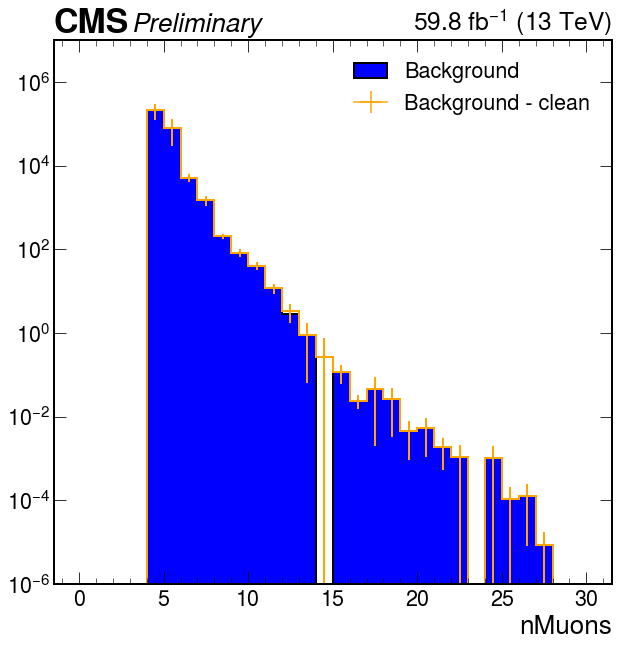

In [53]:
plot_label = 'nMuons_Cluster'
year='2018'

samples_bkg = [
    'ZZZ_2018',
    'WWZ_4F_2018',
    'ttZJets_2018',
    'ZZTo4L_2018',
    'DYNJetsToLL_2018',
    'QCD_Pt_2018',
    'TTJets_2018',
]
density = False

fig, ax = plt.subplots(figsize=(10, 10))
hep.cms.label(
    llabel='Preliminary',
    data=False, 
    lumi=plot_utils.lumiLabel(year)
)
h_bkg = None
h_bkg_clean = None
for sample in samples_bkg: 
    h = plots[sample][plot_label][:30j]
    h_clean = h.copy()
    for i in range(h_clean.shape[0]):
        if h_clean[i].value < 0:
            h_clean[i] = (0, h_clean[i].variance)
    if density: 
        h = h/h.sum().value
        h_clean = h_clean/h_clean.sum().value
    if h_bkg is None:
        h_bkg = h
        h_bkg_clean = h_clean
    else:
        h_bkg += h
        h_bkg_clean += h_clean
hep.histplot(
    h_bkg,
    yerr=np.sqrt(h_bkg.variances()), 
    label='Background', 
    color='blue',
    histtype='fill',
    ec="black",
    lw=2,
)
hep.histplot(
    h_bkg_clean,
    yerr=np.sqrt(h_bkg_clean.variances()), 
    label='Background - clean', 
    color='orange',
    histtype='step',
    lw=2,
)

# tweak these by hand, as needed
plt.ylim(1e-6,1e7)
plt.xlabel(plot_label.replace('_Cluster',''))
plt.legend()
plt.yscale("log")

# save and show
plt.show()

In [58]:
h_bkg.to_numpy()

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.13386252e+05, 7.83266505e+04, 5.19373315e+03, 1.49791140e+03,
        2.03239803e+02, 8.25057949e+01, 4.02187828e+01, 1.15929217e+01,
        3.28535769e+00, 9.01400932e-01, 2.69915303e-01, 1.17315990e-01,
        2.39389959e-02, 4.53869655e-02, 2.56974396e-02, 4.48345902e-03,
        5.21465291e-03, 1.82191900e-03, 1.06525957e-03, 0.00000000e+00,
        1.01117629e-03, 1.04709507e-04, 1.24437134e-04, 8.67244899e-06,
        0.00000000e+00, 0.00000000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]))

Now the fit...

In [56]:
from iminuit import cost, Minuit
from scipy.stats import truncexpon, expon

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.515e+08 (chi2/ndof = 16125005.9)│              Nfcn = 43               │
│ EDM = nan (Goal: 0.0002)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   4e-1    │    nan    │            │            │         │         │       │
│ 1 │ b    │     2     │    nan    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────┐
│   │   a   b │
├───┼─────────┤
│ a │ nan nan │
│ b │ nan nan │
└───┴─────────┘

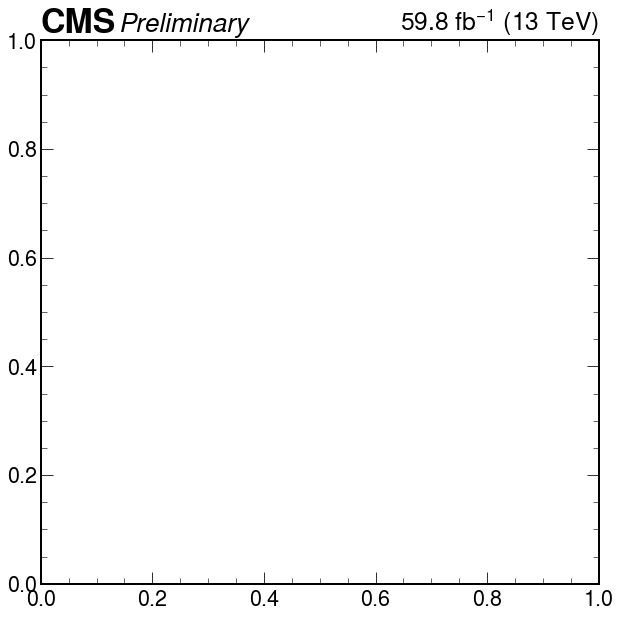

In [60]:
plot_label = 'nMuons_Cluster'
year = '2018'

samples_bkg = [
    'ZZZ_2018',
    'WWZ_4F_2018',
    'ttZJets_2018',
    'ZZTo4L_2018',
    'DYNJetsToLL_2018',
    'QCD_Pt_2018',
    'TTJets_2018',
]
density = False

fig, ax = plt.subplots(figsize=(10, 10))
hep.cms.label(
    llabel = 'Preliminary',
    data = False, 
    lumi = plot_utils.lumiLabel(year)
)
h_bkg = None
for sample in samples_bkg: 
    h = plots[sample][plot_label][:30j]
    for i in range(h.shape[0]):
        if h[i].value < 0:
            h[i] = (0, h[i].variance)
    if density: 
        h = h/h.sum().value
    if h_bkg is None:
        h_bkg = h
    else:
        h_bkg += h

# fit range
xr = (0, 30)
        
def cdf(xe, a, b):
    return a * truncexpon.cdf(xe, b)

# n : bin contents 
# xe : bin edges
n, xe = h_bkg.to_numpy()
c = cost.BinnedNLL(n, xe, cdf)
m = Minuit(c, a=0.4, b=2)
#m.limits["a"] = (0, 1)
#m.limits["b"] = (0, None)
m.migrad()

In [ ]:
hep.histplot(
    h_bkg,
    yerr=np.sqrt(h_bkg.variances()), 
    label='Background', 
    color='orange',
    histtype='step',
    lw=2,
)

# tweak these by hand, as needed
plt.ylim(1e-6,1e7)
plt.xlabel(plot_label.replace('_Cluster',''))
plt.legend()
plt.yscale("log")

# save and show
plt.show()

### 2D Hist Slices Stacked
Slice a 2D histogram and plot the stacked slices individually.

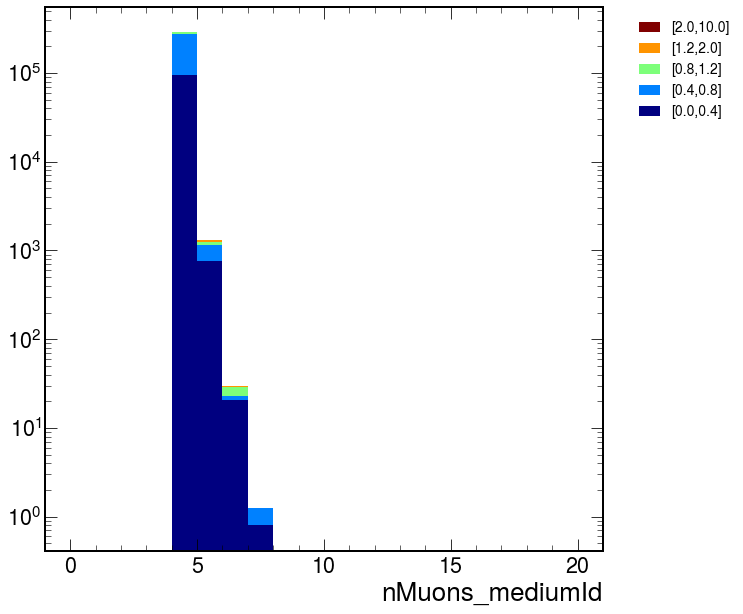

In [15]:
#sample = 'QCD_Pt_2018'
slice_var = 'y'
plot_label = '2D_nMuons_mediumId_vs_muon_interIsolation_1p6_Cluster'

regions_list = [[0j,0.4j],[0.4j,0.8j],[0.8j,1.2j],[1.2j,2j],[2j,10j]]
labels = [f"[{regions[0].imag},{regions[1].imag}]" for regions in regions_list]

h = h_bkg
fig, ax = plot_utils.plot_sliced_hist2d(h, regions_list, slice_var=slice_var, labels=labels)

## Ratio Plots

### Compare Datasets
Make ratio plots of different datasets.<br>
Parameters:<br>
`selection`: _str_, which selection to use, e.g. 'ch', 'mult'.<br>
`plot_labels`: _list of str_, which plots to make.

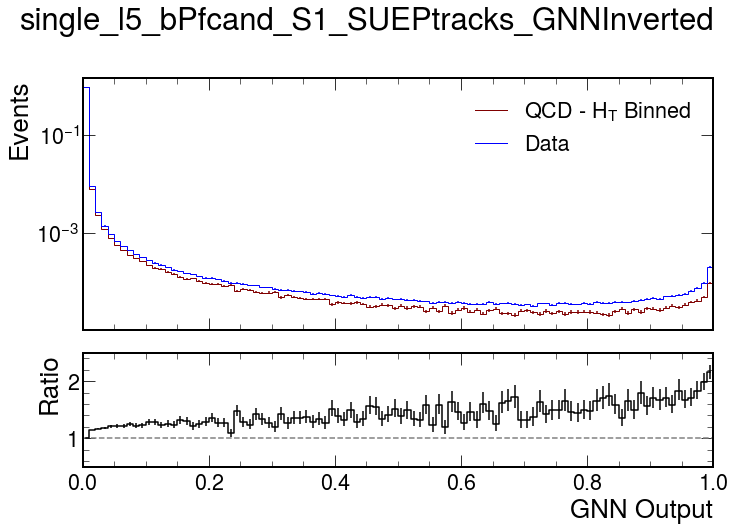

In [6]:
selection = 'GNNInverted'
plot_labels = ['single_l5_bPfcand_S1_SUEPtracks']
density = True
sample1 = 'QCD_HT_2018'
sample2 = 'data_2018'

for plot_label in plot_labels:
    
    plot_label += '_'+selection

    h1 = plots[sample1][plot_label][::1j]
    h2 = plots[sample2][plot_label][::1j]
    
    # our custom ratio calculates errors differently, more appropriate for plotting densities
    if density:
        h1 = h1/h1.sum().value
        h2 = h2/h2.sum().value
        fig, axs, _ = plot_ratio(h1, h2, label1=r'QCD - $H_T$ Binned', label2 = 'Data')
        axs[0].legend()
        axs[1].set_ylim(0.5,2.5)
        
    else:            
        fig = plt.figure(figsize=(10, 8))
        
        _ = h1.plot_ratio(h2,
                         rp_num_label=r'QCD MC - $H_T$ Binned',
                         rp_denom_label='Data')
        fig.axes[0].set_yscale("log")
        #fig.axes[0].set_xlim(0, 2000)
        #fig.axes[0].set_ylim(1e-5, 1e7)
        fig.axes[1].set_ylim(0.0,1.5)
        fig.axes[1].set_ylabel('MC/data')
    
    fig.figure.suptitle(plot_label)
    plt.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    plt.show()

### Ratio Plots: Shared x-axis
Make ratio plots for different datasets of all regions combined into one histogram.<br>

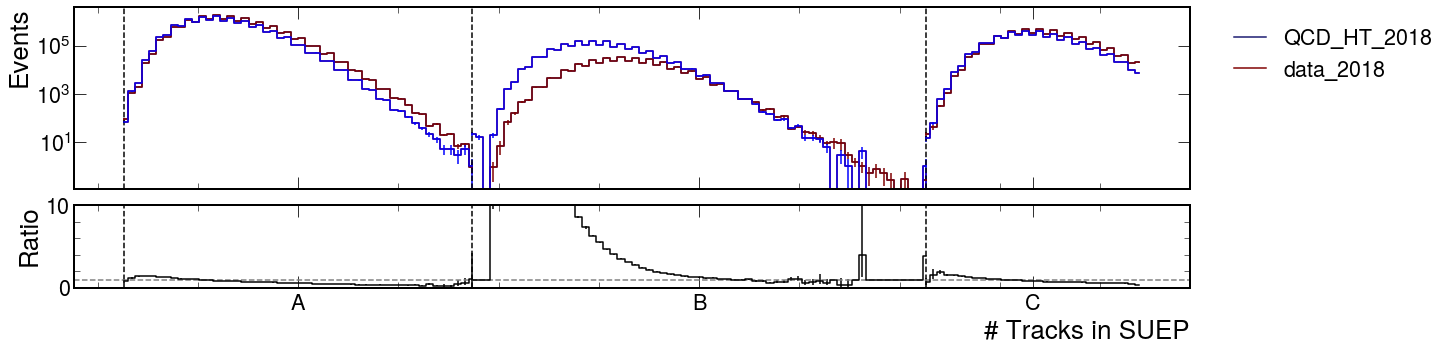

In [10]:
x = 'ABC'
y = 'ACB'
plot_labels = ['SUEP_nconst_GNN']
sample1 = 'QCD_HT_2018'
sample2 = 'data_2018'
for plot_label in plot_labels:
    fig, (ax1, ax2) = plot_ratio_regions(plots, 'A_'+plot_label, 
                           sample1, sample2, 
                           x, density=False)
    ax2.set_ylim(0,10)
    fig.savefig(output_label + plot_label + file_ext, bbox_inches='tight')

### Compare Variables

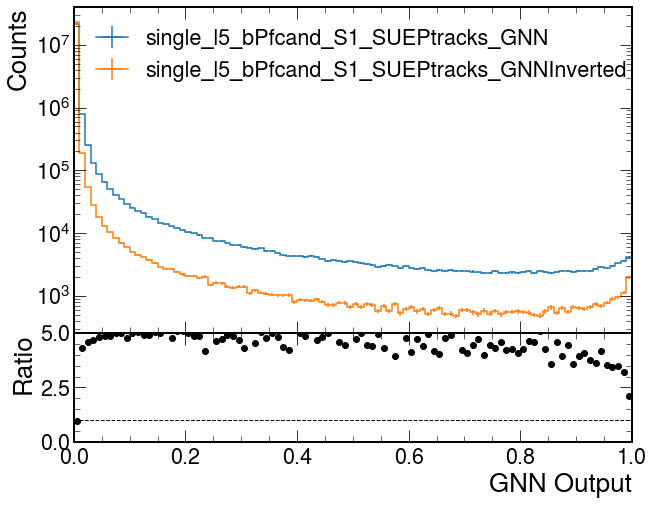

In [17]:
plot_label1 = "single_l5_bPfcand_S1_SUEPtracks_GNN"
plot_label2 = "single_l5_bPfcand_S1_SUEPtracks_GNNInverted"
sample = 'QCD_HT_2018'
density = False

# QCD hist for ABCD region
h1 = plots[sample][plot_label1]
h2 = plots[sample][plot_label2]

if density:
    h1 = h1/h1.sum().value
    h2 = h2/h2.sum().value

fig = plt.figure(figsize=(10, 8))

_ = h1.plot_ratio(h2,
                 rp_num_label=plot_label1,
                 rp_denom_label=plot_label2)

fig.axes[0].set_yscale("log")
# fig.axes[0].set_xlabel("pT")
#fig.axes[0].set_xlim(0, 2000)
#fig.axes[0].set_ylim(1e-5, 1e7)
fig.axes[1].set_ylim(0,5)
plt.savefig(output_label + plot_label1 + "_" + plot_label2 + file_ext, bbox_inches='tight')
plt.show()

### Ratios of Slices
Slice a 2D histogram for both two samples or variables and plot ratio of each of the slices.

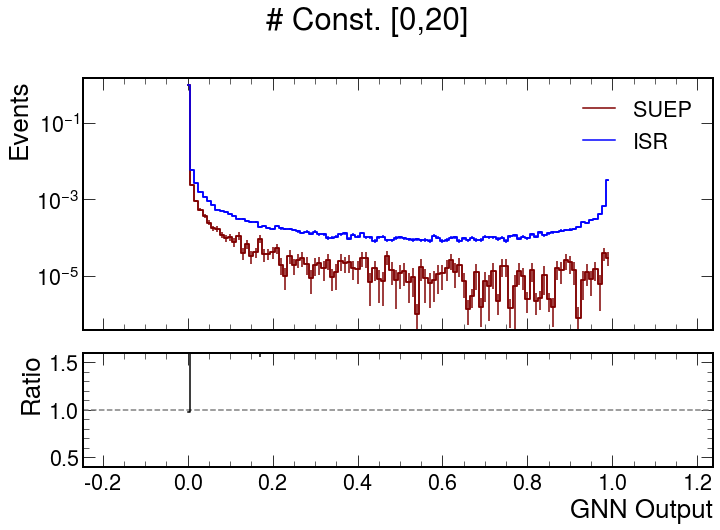

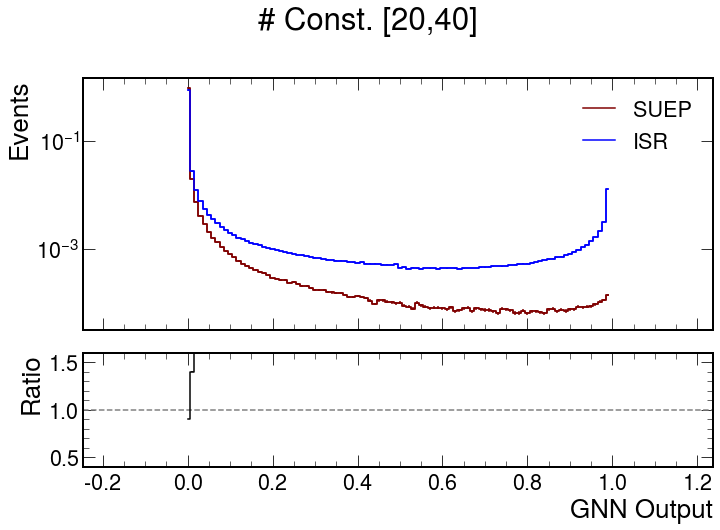

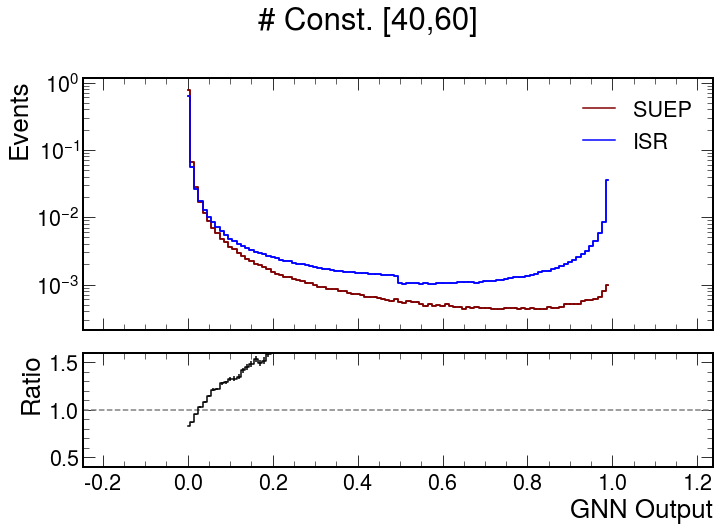

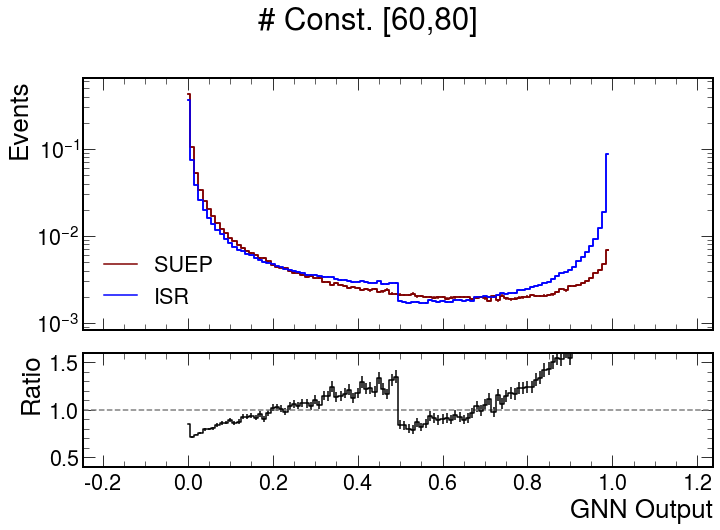

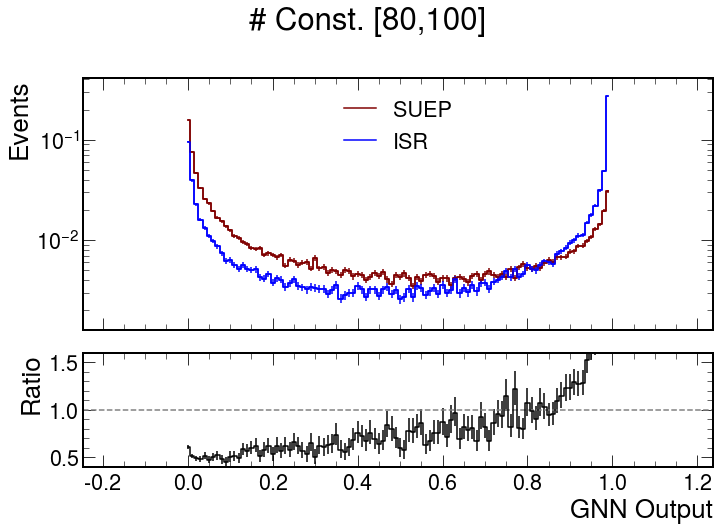

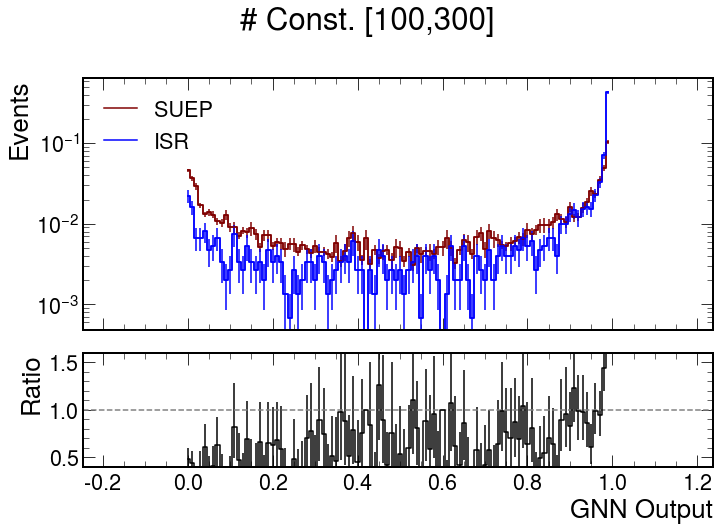

In [12]:
h1 = plots['QCD_HT_2018']["2D_SUEP_nconst_vs_single_l5_bPfcand_S1_GNN"]
h2 = plots['data_2018']["2D_SUEP_nconst_vs_single_l5_bPfcand_S1_GNN"]

regions_list = [[0.0j,20j],[20j,40j],[40j,60j],
                [60j,80j],[80j,100j],[100j,300j]]
h1_slices = slice_hist2d(h1, regions_list, slice_var='x')
h2_slices = slice_hist2d(h2, regions_list, slice_var='x')

for h1_slice, h2_slice, regions in zip(h1_slices, h2_slices, regions_list):
    
    h1_slice = h1_slice[:]
    h2_slice = h2_slice[:]
    
    h1_slice = h1_slice/h1_slice.sum().value
    h2_slice = h2_slice/h2_slice.sum().value
  
    fig, axs, _ = plot_ratio(h1_slice, h2_slice, label1='SUEP', label2='ISR')
    axs[0].legend()

    fig.suptitle("# Const. [{},{}]".format(int(regions[0].imag), int(regions[1].imag)))
    plt.show()

### Weights

In [ ]:
plot_label = 'SUEP_nconst_CL'
regions = x = 'ABCDEFGHI'
density = False

weights = nested_dict(2, float)
for r in regions:
    
    plot = r + "_" + plot_label
    
    # control regions
    if r != 'I':
        h1 = plots['QCD_HT'][plot]
        h2 = plots['data'][plot]

        fig, _, res = plot_ratio(h1, h2)
        plt.close()

        x = h1.to_numpy()[1]
        ratios = res[0]+1

        weights[r]['bins'] = x
        weights[r]['ratios'] = ratios
    
    # signal region
    else:
        
        h1 = plots['QCD_HT']['F_'+plot_label]
        F = h1.sum().value
        G = plots['QCD_HT']['G_'+plot_label].sum().value
        C = plots['QCD_HT']['C_'+plot_label].sum().value
        A = plots['QCD_HT']['A_'+plot_label].sum().value
        H = plots['QCD_HT']['H_'+plot_label].sum().value
        E = plots['QCD_HT']['E_'+plot_label].sum().value
        D = plots['QCD_HT']['D_'+plot_label].sum().value
        B = plots['QCD_HT']['B_'+plot_label].sum().value
        
        h1 = h1 * F**3 * (G * C / A) * \
                ((H / E)**4) \
                * (G * F / D)**-2 \
                * (H * C / B)**-2
        
        h2 = plots['data']['F_'+plot_label]
        F = h2.sum().value
        G = plots['data']['G_'+plot_label].sum().value
        C = plots['data']['C_'+plot_label].sum().value
        A = plots['data']['A_'+plot_label].sum().value
        H = plots['data']['H_'+plot_label].sum().value
        E = plots['data']['E_'+plot_label].sum().value
        D = plots['data']['D_'+plot_label].sum().value
        B = plots['data']['B_'+plot_label].sum().value
        
        h2 = h2 * F**3 * (G * C / A) * \
                ((H / E)**4) \
                * (G * F / D)**-2 \
                * (H * C / B)**-2
        
        fig, _, res = plot_ratio(h1, h2, plot, 'QCD_HT', 'data')
        plt.close()
        
        x = h1.to_numpy()[1]
        ratios = res[0]+1

        weights[r]['bins'] = x
        weights[r]['ratios'] = ratios
        
weights = dict(weights)
np.save('nconst_weights', weights)

## Automatic Plotting
Make all plots in the pkl and save them automatically.<br>

### All 1D and 2D Plots

In [12]:
outdir = 'allplots/'
samples = ['QCD_HT', 'QCD_HT_scout']
density = True

plot_labels = [k for k in list(plots['QCD_HT'].keys())]
if not os.path.isdir(output_label+outdir): os.system("mkdir " + str(output_label+outdir))

for plot_label in plot_labels:
    
    # 2D plots
    if '2D' in plot_label:
        
        print(plot_label, end=", ")
        
        for sample in samples:

            if plots[sample][plot_label].sum().value == 0:
                print("Histogram empty for sample", sample, end=", ")
                continue

            h = plots[sample][plot_label]
            hep.hist2dplot(h, 
                       norm=matplotlib.colors.LogNorm(),
                       label=sample) 
            plt.savefig(output_label + outdir + plot_label+ "_"+sample+file_ext, bbox_inches='tight')
            plt.close()
        
    # 1D variables
    elif '2D' not in plot_label:
    
        print(plot_label, end=", ")
        
        if plots[sample][plot_label].sum().value == 0:
                print("Histogram empty for sample", sample, end=", ")
                continue
        
        # plot everything
        for sample in samples:
            h = plots[sample][plot_label]
            if density: h = h/h.sum().value
            hep.histplot(h, yerr=True, label=sample) 
        plt.legend()
        plt.yscale("log")
        plt.savefig(output_label + 'allplots/' + plot_label+ "_all"+file_ext, bbox_inches='tight')
        plt.close()

    print()
print("All done")

ABCDvars_ISRRemoval, Histogram empty for sample QCD_HT_scout, ht_ISRRemoval, 
ht_tracker_ISRRemoval, 
ntracks_ISRRemoval, 
ngood_fastjets_ISRRemoval, 
PV_npvs_ISRRemoval, 
Pileup_nTrueInt_ISRRemoval, Histogram empty for sample QCD_HT_scout, ngood_ak4jets_ISRRemoval, 
ngood_tracker_ak4jets_ISRRemoval, 
FNR_ISRRemoval, Histogram empty for sample QCD_HT_scout, ISR_contamination_ISRRemoval, Histogram empty for sample QCD_HT_scout, A_ht_ISRRemoval, 
A_ht_tracker_ISRRemoval, 
A_ntracks_ISRRemoval, 
A_ngood_fastjets_ISRRemoval, 
A_PV_npvs_ISRRemoval, 
A_Pileup_nTrueInt_ISRRemoval, Histogram empty for sample QCD_HT_scout, A_ngood_ak4jets_ISRRemoval, 
A_ngood_tracker_ak4jets_ISRRemoval, 
A_FNR_ISRRemoval, Histogram empty for sample QCD_HT_scout, A_ISR_contamination_ISRRemoval, Histogram empty for sample QCD_HT_scout, B_ht_ISRRemoval, 
B_ht_tracker_ISRRemoval, 
B_ntracks_ISRRemoval, 
B_ngood_fastjets_ISRRemoval, 
B_PV_npvs_ISRRemoval, 
B_Pileup_nTrueInt_ISRRemoval, Histogram empty for sample QCD

### All Ratios: 1D Plots
For each 1D histogram, make a ratio plot between two samples.

In [18]:
plot_labels = list(plots['QCD_HT_2018'].keys())
density = False
combos = [['QCD_HT_2018','data_2018']]

for l1, l2 in combos:
    
    outdir = l1+"_"+l2+"/"
    print(outdir)

    if not os.path.isdir(output_label+outdir): 
        os.system("mkdir " + str(output_label+outdir))

    for plot_label in plot_labels:

        if '2D' in plot_label: continue

        print(plot_label, end=", ")
        h1 = plots[l1][plot_label]
        h2 = plots[l2][plot_label]
        
        if h1.sum().value == 0 or h2.sum().value == 0: continue
        
        if density: 
            h1 = h1/h1.sum().value
            h2 = h2/h2.sum().value
            fig, axs, _ = plot_ratio(h1, h2, label1=l1, label2=l2)
            axs[0].legend()
        else:
            fig = plt.figure(figsize=(10, 8))
            _ = h1.plot_ratio(h2,
                             rp_num_label=l1,
                             rp_denom_label=l2)
            fig.axes[0].set_yscale("log")
            fig.axes[1].set_ylim(0.4,1.6)
            
        plt.savefig(output_label + outdir + plot_label +file_ext, bbox_inches='tight')
        plt.close()

    print("All done")

QCD_HT_2018_data_2018/
ABCDvars_ISRRemoval, ht_ISRRemoval, ntracks_ISRRemoval, ngood_fastjets_ISRRemoval, PV_npvs_ISRRemoval, Pileup_nTrueInt_ISRRemoval, ngood_ak4jets_ISRRemoval, ngood_tracker_ak4jets_ISRRemoval, FNR_ISRRemoval, ISR_contamination_ISRRemoval, A_ht_ISRRemoval, A_ntracks_ISRRemoval, A_ngood_fastjets_ISRRemoval, A_PV_npvs_ISRRemoval, A_Pileup_nTrueInt_ISRRemoval, A_ngood_ak4jets_ISRRemoval, A_ngood_tracker_ak4jets_ISRRemoval, A_FNR_ISRRemoval, A_ISR_contamination_ISRRemoval, B_ht_ISRRemoval, B_ntracks_ISRRemoval, B_ngood_fastjets_ISRRemoval, B_PV_npvs_ISRRemoval, B_Pileup_nTrueInt_ISRRemoval, B_ngood_ak4jets_ISRRemoval, B_ngood_tracker_ak4jets_ISRRemoval, B_FNR_ISRRemoval, B_ISR_contamination_ISRRemoval, C_ht_ISRRemoval, C_ntracks_ISRRemoval, C_ngood_fastjets_ISRRemoval, C_PV_npvs_ISRRemoval, C_Pileup_nTrueInt_ISRRemoval, C_ngood_ak4jets_ISRRemoval, C_ngood_tracker_ak4jets_ISRRemoval, C_FNR_ISRRemoval, C_ISR_contamination_ISRRemoval, D_ht_ISRRemoval, D_ntracks_ISRRemoval,

### All Ratios: Combined Regions

In [20]:
density = True

plot_labels = list(plots['QCD_HT_2018'].keys())
combos = [['QCD_HT_2018','data_2018']]

for l1, l2 in combos:
    
    outdir = l1+"_"+l2+"_combinedRegions/"
    print(outdir)

    if not os.path.isdir(output_label+outdir): 
        os.system("mkdir " + str(output_label+outdir))

    for plot_label in plot_labels:

        if "A_" not in plot_label: continue
        print(plot_label, end=", ")
        
        h1 = plots[l1][plot_label.replace("A_", "")]
        h2 = plots[l2][plot_label.replace("A_", "")]
        if h1.sum().value == 0 or h2.sum().value == 0:
            print("Empty", end=", ")
            continue
            
        # x or y define order of regions
        x = 'ABCDEFGH'
        y = 'ADGBEHCF'
        _ = plot_ratio_regions(plots, plot_label, l1, l2, x, density=density)
        plt.savefig(output_label + outdir + plot_label +file_ext, bbox_inches='tight')
        plt.close()

QCD_HT_2018_data_2018_combinedRegions/
A_ht_ISRRemoval, A_ntracks_ISRRemoval, A_ngood_fastjets_ISRRemoval, A_PV_npvs_ISRRemoval, A_Pileup_nTrueInt_ISRRemoval, Empty, A_ngood_ak4jets_ISRRemoval, A_ngood_tracker_ak4jets_ISRRemoval, Empty, A_FNR_ISRRemoval, Empty, A_ISR_contamination_ISRRemoval, Empty, A_SUEP_nconst_ISRRemoval, A_SUEP_pt_ISRRemoval, A_SUEP_pt_avg_ISRRemoval, A_SUEP_pt_avg_b_ISRRemoval, A_SUEP_pt_mean_scaled_ISRRemoval, A_SUEP_eta_ISRRemoval, A_SUEP_phi_ISRRemoval, A_SUEP_mass_ISRRemoval, A_SUEP_S1_ISRRemoval, A_SUEP_girth, Empty, A_SUEP_rho0_ISRRemoval, A_SUEP_rho1_ISRRemoval, A_ht_Cluster, A_ntracks_Cluster, A_ngood_fastjets_Cluster, A_PV_npvs_Cluster, A_Pileup_nTrueInt_Cluster, Empty, A_ngood_ak4jets_Cluster, A_ngood_tracker_ak4jets_Cluster, Empty, A_FNR_Cluster, Empty, A_ISR_contamination_Cluster, Empty, A_SUEP_nconst_Cluster, A_SUEP_pt_Cluster, A_SUEP_pt_avg_Cluster, A_SUEP_pt_avg_b_Cluster, A_SUEP_pt_mean_scaled_Cluster, A_SUEP_eta_Cluster, A_SUEP_phi_Cluster, A_SUEP

## Binned QCD Plots
Make plots with the QCD separated by bins. This won't work if QCD has been marged. <br>
Parameters:<br>
`selection`: _str_, which selection to use, e.g. 'ch', 'mult'.<br>
`plot_labels`: _list_, which plots you want to make.<br>
`identifier`: _str_, how to identify the QCD samples, e.g. QCD_HT or QCD_Pt.

In [19]:
print(list(plots.keys()))

['SUEP-m1000-darkPhoHad_2018', 'SUEP-m1000-darkPho_2018', 'SUEP-m125-darkPhoHad_2018', 'SUEP-m125-darkPho_2018', 'SUEP-m400-darkPhoHad_2018', 'SUEP-m400-darkPho_2018', 'SUEP-m750-darkPhoHad_2018', 'SUEP-m750-darkPho_2018', 'QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_test_2018', 'bkg_2018', 'QCD_Pt_2018', 'QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_test_2018', 'QCD_Pt_15to30_TuneCP5_13TeV_pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_test_2018', 'QCD_Pt_170to300_TuneCP5_13TeV_pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_test_2018', 'QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM_test_2018', 'QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1

In [6]:
print(
    list(
        plots[
            'QCD_HT50to100_TuneCP5_PSWeights_13TeV-madgraph-pythia8+'
            'RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+'
            'MINIAODSIM_test_2018'
        ].keys()
    )
)

[]


HT smoothness check for the HT-binned samples

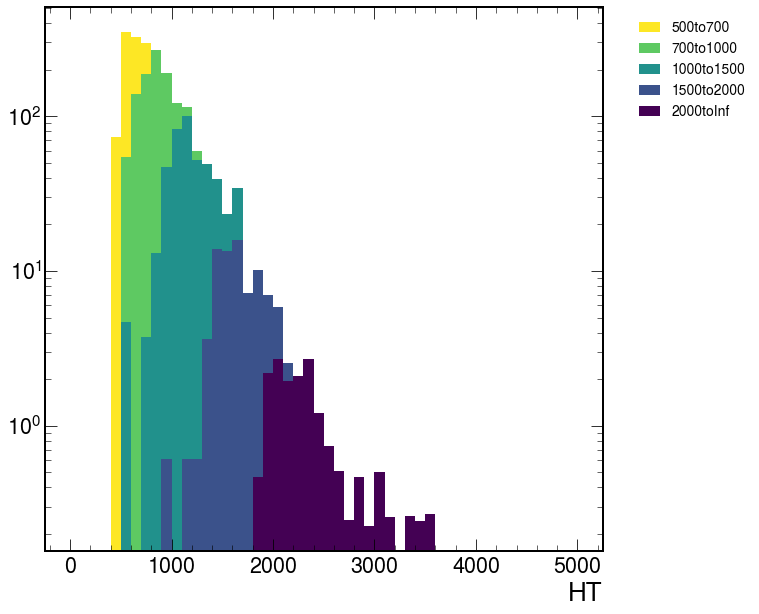

In [15]:
plot_labels = ['ht_Cluster_4muons']
prefix = 'QCD_HT'
suffix1 = '_TuneCP5_PSWeights_13TeV-madgraph-pythia8+'
suffix2 = 'RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+'
suffix3 = 'MINIAODSIM_test_2018'
samples = [
    #'50to100', 
    #'100to200', 
    #'200to300', 
    #'300to500', 
    '500to700', 
    '700to1000', 
    '1000to1500', 
    '1500to2000', 
    '2000toInf'
]

for plot_label in plot_labels:
        
    # get hists
    hlist, labels = [], []
    for sample in samples:
        name = prefix + sample + suffix1 + suffix2 + suffix3
        if sample == '700to1000':
            name = name.replace('_L1v1-v1', '_L1v1-v2')
        if len(plots[name]) == 0:
            continue
        hlist.append(plots[name][plot_label][:5000j:])
        labels.append(sample)
                        
    # not sure why, but they NEED to be color coded appropriately
    vals = []
    for key in labels:
        key = key.split("_")[0]
        keyslice = key.split("to")[0]
        val = int(keyslice)
        vals.append(val)
    hlist_sorted, labels_sorted = [], []
    for arg in np.argsort(vals)[::-1]:
        hlist_sorted.append(hlist[arg])
        labels_sorted.append(labels[arg])
        
    cmap = plt.cm.viridis(np.linspace(0, 1, len(labels_sorted)))
    
    hep.histplot(
        hlist_sorted, 
        stack=True, 
        histtype ='fill',         
        label=labels_sorted, 
        color=cmap
    )
    
    plt.legend(fontsize=14, framealpha=1, facecolor='white', shadow=True, bbox_to_anchor=(1.04,1), loc="upper left")
    plt.yscale("log")
    plt.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    plt.show()

HT smoothness check for the Pt-binned samples

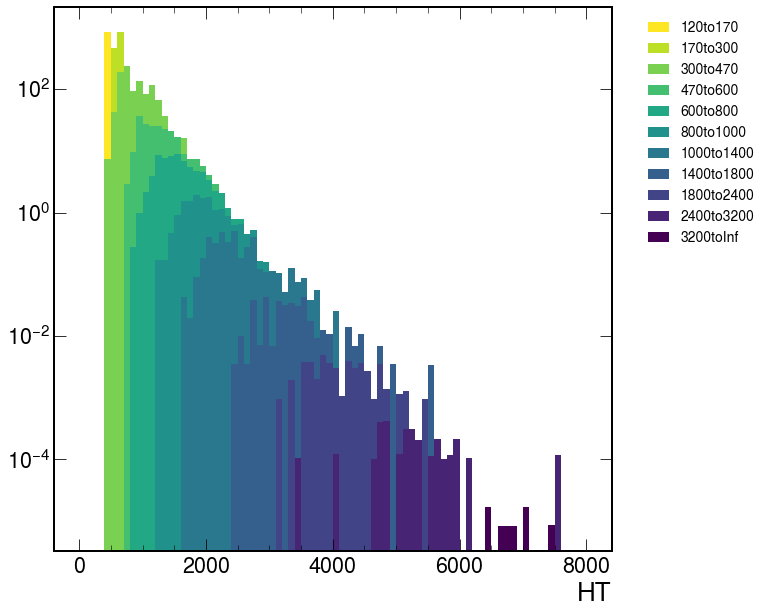

In [20]:
plot_labels = ['ht_Cluster_4muons']
prefix = 'QCD_Pt_'
suffix1 = '_TuneCP5_13TeV_pythia8+'
suffix2 = 'RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+'
suffix3 = 'MINIAODSIM_test_2018'
samples = [
    #'15to30', 
    #'30to50', 
    #'50to80', 
    #'80to120', 
    '120to170', 
    '170to300', 
    '300to470', 
    '470to600', 
    '600to800',
    '800to1000',
    '1000to1400',
    '1400to1800',
    '1800to2400',
    '2400to3200',
    '3200toInf'
]

for plot_label in plot_labels:
        
    # get hists
    hlist, labels = [], []
    for sample in samples:
        name = prefix + sample + suffix1 + suffix2 + suffix3
        if sample == '120to170':
            name = name.replace('_L1v1-v1', '_L1v1-v2')
        if len(plots[name]) == 0:
            continue
        hlist.append(plots[name][plot_label][:8000j:])
        labels.append(sample)
                        
    # not sure why, but they NEED to be color coded appropriately
    vals = []
    for key in labels:
        key = key.split("_")[0]
        keyslice = key.split("to")[0]
        val = int(keyslice)
        vals.append(val)
    hlist_sorted, labels_sorted = [], []
    for arg in np.argsort(vals)[::-1]:
        hlist_sorted.append(hlist[arg])
        labels_sorted.append(labels[arg])
        
    cmap = plt.cm.viridis(np.linspace(0, 1, len(labels_sorted)))
    
    hep.histplot(
        hlist_sorted, 
        stack=True, 
        histtype ='fill',         
        label=labels_sorted, 
        color=cmap
    )
    
    plt.legend(fontsize=14, framealpha=1, facecolor='white', shadow=True, bbox_to_anchor=(1.04,1), loc="upper left")
    plt.yscale("log")
    plt.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    plt.show()

## ABCD
Make the ABCD regions by hand from one of the 2D plots.<br>
Notation: `hist[v1:v2::sum]` sums along an axis from v1 to v2 (leave either blank to extend the summation bounds arbitrarily).

### ABCD Independent Variables Check
1D slices of 2D plots, usually used to check the independence of the ABCD method's two variables on the QCD sample. This won't work if QCD has been binned by pt. <br>
N.B.: Imaginary numbers are used to access the bin value; using real numbers would access the bin number (see hist documentation for more info).<br>
Parameters:<br>
`plot_label`:_str_, which plot to analyze.<br>
`sample`: _str_, which sample to analyze.<br>
`variables`: _str_, variables being sliced, used to pick the slices in the loop.<br>
`slices`: _list of lists of floats_, bins of values to be sliced. e.g. for equal slices use np.linspace(start, end, number of bins), if not can specify as [[0,10],[20,40],[40,50],...].

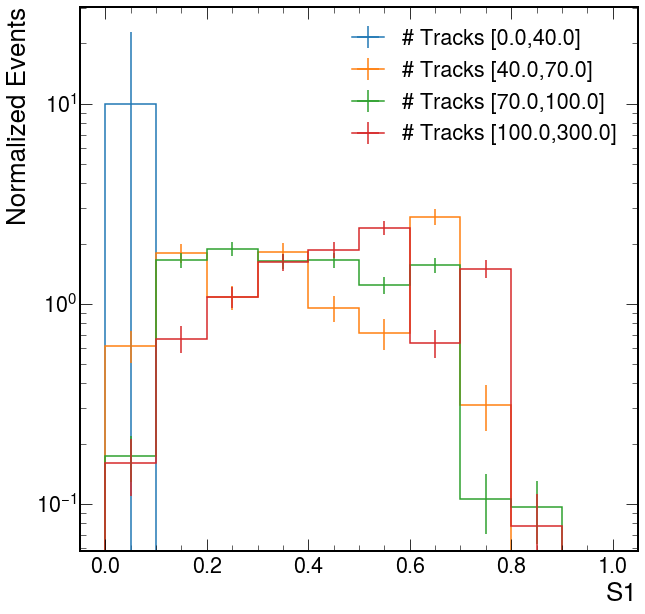

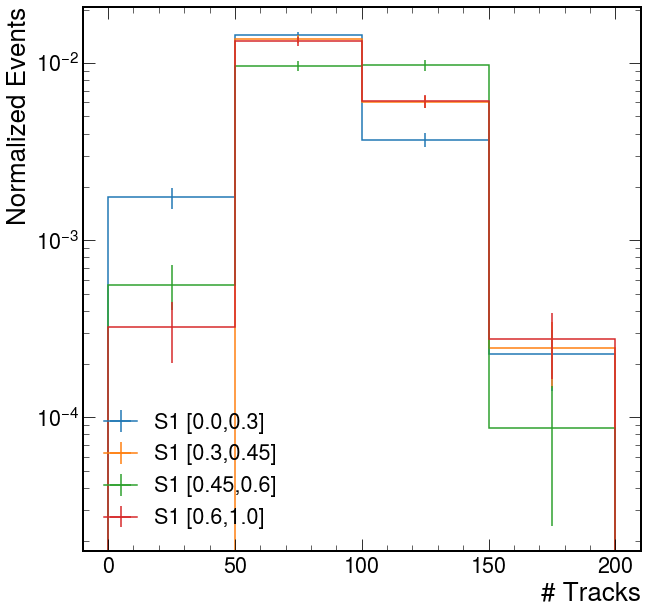

In [10]:
# parameters
plot_label = '2D_SUEP_S1_vs_ntracks_Cluster_4muons'
sample = 'QCD_HT_2018'
variables = ['S1', '# Tracks']

for i in range(2):
    
    slice_label = variables[(i+1)%2]
    
    # some predefined slices
    if slice_label == '# Tracks': 
        slices = [[0.0j,40j],[40j,70j],[70j,100j],[100j,300j]]
    elif slice_label == '# Const': 
        slices = [[0.0j,15j],[15j,30j],[30j,50j],[50j,300j]]
    elif slice_label == 'pT Avg': 
        slices = [[0.0j,20j],[20j,40j],[40j,60j],[60j,80j],[80j,1000j]]
    elif slice_label == 'pT Avg b': 
        slices = [[0.0j,2j],[2j,4j],[4j,6j],[6j,10j],[10j,1000j]]
    elif slice_label == 'pT Mean Scaled': 
        slices = [[0.0j, 0.1j],[0.1j,0.2j],[0.2j,0.4j],[0.4j,0.6j],[0.6j, 1.0j]]
    elif slice_label == 'S1': 
        slices = [[0.0j,0.3j],[0.3j,0.45j],[0.45j,0.6j],[0.6j,1.0j]]

    h = plots[sample][plot_label]
    
    if i==0:  
        h = h[:,:]
        hlist = plot_utils.slice_hist2d(h, slices, slice_var='y')
    if i==1:  
        h = h[:,:]
        hlist = plot_utils.slice_hist2d(h, slices, slice_var='x')
    
    for h, s in zip(hlist, slices):
        hep.histplot(
            h[:200j:10j],       
            yerr=True, 
            density=True, 
            label=f"{slice_label} [{s[0].imag},{s[1].imag}]",
        )
    
    plt.legend()
    # plt.ylim(1e-5,1e1)
    plt.yscale('log')
    plt.ylabel("Normalized Events")
    plt.xlabel(variables[i])
    # plt.savefig(
    #     f"{output_label}{plot_label}_slice_label_SLICES{file_ext}".replace("#","n").replace(" ","_"),
    #     bbox_inches='tight'
    # )
    plt.show()

### 4 Regions
Check closure in D region for one sample.

In [17]:
print([k for k in plots.keys() if ('RunII' not in k) and ('SUEP' not in k)])

['bkg_2018', 'QCD_Pt_2018', 'DYNJetsToLL_2018', 'TTJets_2018', 'ttZJets_2018', 'WWZ_4F_2018', 'ZZTo4L_2018', 'ZZZ_2018', 'QCD_HT_2018']


observed: 134.330 ± 55.662
expected: 198.312 ± 54.684


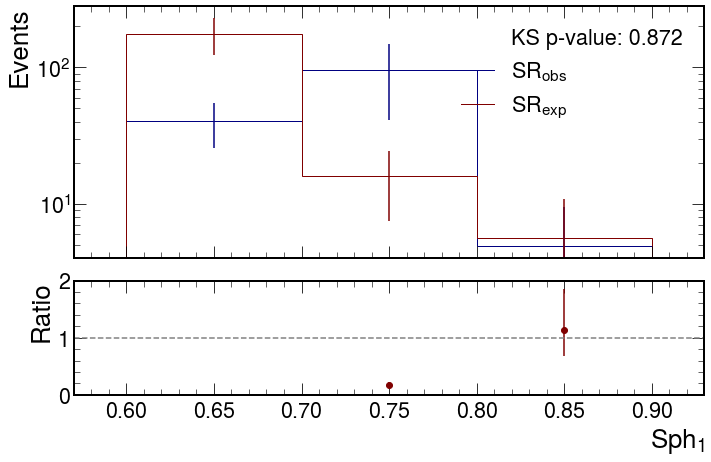

In [50]:
plot_label = '2D_SUEP_S1_vs_ntracks_Cluster_4muons'
abcd = plots['QCD_HT_2018'][plot_label]
xregions = [0.3j, 0.6j, 1.0j]
yregions = [40j, 100j, 1000j]

SR, SR_exp = plot_utils.ABCD_4regions(abcd, xregions, yregions, sum_var='y')

print(f"observed: {SR[1:].sum().value:.3f} ± {math.sqrt(SR.sum().variance):.3f}")
print(f"expected: {SR_exp.sum().value:.3f} ± {math.sqrt(SR_exp.sum().variance):.3f}")

nonzero = (SR.values() > 0) | (SR_exp.values() > 0)
ks = scipy.stats.ks_2samp(SR.values()[nonzero], SR_exp.values()[nonzero])

fig, axs = plot_utils.plot_ratio([SR[::10j], SR_exp[::10j]], labels=["$SR_{obs}$", "$SR_{exp}$"])
_ = axs[0].plot([],[],' ',label='KS p-value: {}'.format(round(ks.pvalue,3)))
_ = axs[1].set_ylim(0,2)
_ = axs[0].legend()

#plt.savefig(output_label+"ABCD_"+plot_label+file_ext)

In [66]:
SR[1:]

Hist(Regular(179, 50.2513, 500, name='nconst_Cluster_6muons', label='# Constituents'), storage=Weight()) # Sum: WeightedSum(value=0.00289701, variance=2.81336e-06) (WeightedSum(value=0.616658, variance=1.14487) with flow)

### 6 Regions

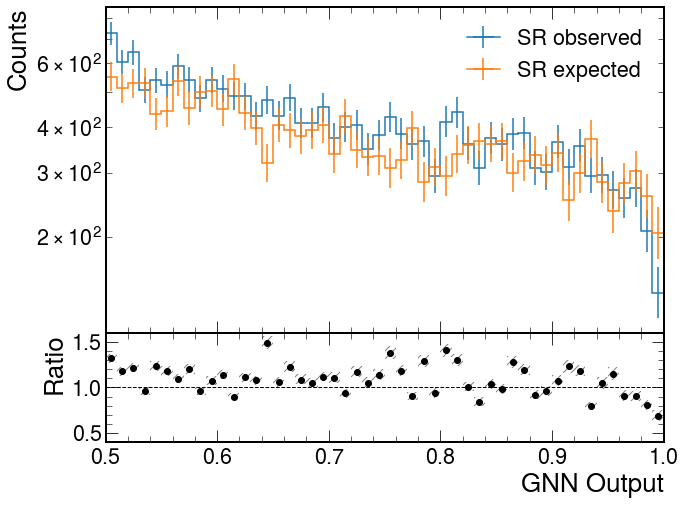

In [20]:
plot_label = '2D_SUEP_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNN'
abcd = plots['QCD_HT_2018'][plot_label]

xregions = [0.3j, 0.4j, 0.5j, 1.0j]
yregions = [0.3j, 0.5j, 1.0j]

SR, SR_exp = ABCD_6regions(abcd, xregions, yregions, sum_var='x')

fig = plt.figure(figsize=(10, 8))
main, sub = SR.plot_ratio(SR_exp,
                rp_num_label='SR observed',
                rp_denom_label='SR expected',
                rp_uncert_draw_type="bar")
fig.axes[0].set_yscale("log")
fig.axes[1].set_ylim(0.4,1.6)
plt.savefig(output_label+"ABCD_6regions_"+plot_label+file_ext)

### 9 Regions with error propagation

Scaling factor alpha: 2.26818218881235
Sigma alpha: 0.0385054555960370


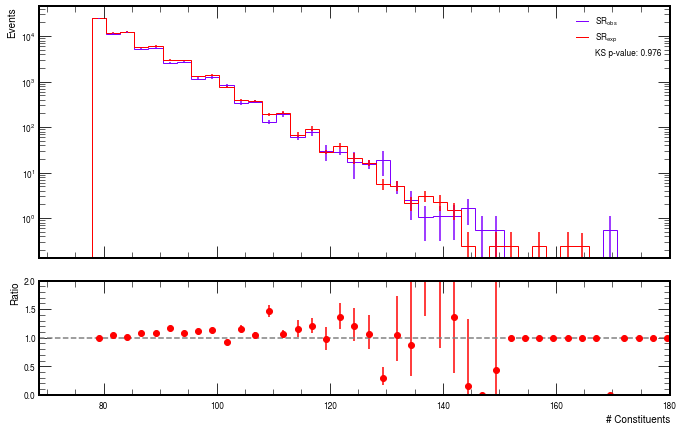

In [38]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
abcd = plots['QCD_HT_2018'][plot_label]

# 2D_SUEP_S1_vs_SUEP_nconst_Cluster
# 2D_ISR_S1_vs_ISR_nconst_ClusterInverted
xregions = [0.35j, 0.4j, 0.5j, 1.0j]
yregions = [10j, 40j, 80j, 300j]

# 2D_SUEP_S1_vs_SUEP_nconst_Cluster
# 2D_ISR_S1_vs_ISR_nconst_ClusterInverted
# xregions = [0.35j, 0.4j, 0.5j, 1.0j]
# yregions = [20j, 40j, 60j, 300j]

# 2D_ISR_S1_ISR_nconst_CL
# xregions = [0.35j, 0.4j, 0.5j, 1.0j]
# yregions = [0.0j, 30j, 60j, 300j]

# 2D_SUEP_S1_SUEP_nconst_CL (scouting)
# xregions = [0.35j, 0.4j, 0.5j, 1.0j]
# yregions = [10.0j, 35j, 60j, 300j]

SR, SR_exp, alpha, sigma_alpha = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x')

print("Scaling factor alpha:", alpha)
print("Sigma alpha:", sigma_alpha)

nonzero = (SR.values() > 0) | (SR_exp.values() > 0) # don't consider empty bins for KS test
ks = scipy.stats.ks_2samp(SR.values()[nonzero], SR_exp.values()[nonzero])

fig, axs = plot_ratio([SR_exp, SR], labels=["$SR_{obs}$", "$SR_{exp}$"])
_ = axs[0].plot([],[],' ',label='KS p-value: {}'.format(round(ks.pvalue,3)))
_ = axs[1].set_ylim(0,2)
_ = axs[0].legend()

In [24]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
samples = ['QCD_HT_2018', 'SUEP-m125-generic', 'SUEP-m125-generic-htcut', 'SUEP-m400-generic', 'SUEP-m750-generic', 'SUEP-m1000-generic']

# 2D_SUEP_S1_vs_SUEP_nconst_Cluster
# 2D_ISR_S1_vs_ISR_nconst_ClusterInverted
xregions = [0.35j, 0.4j, 0.5j, 1.0j]
yregions = [10j, 40j, 80j, 300j]

hlist = []
for sample in samples:
    abcd = plots[sample][plot_label]
    SR = abcd[xregions[-2]:xregions[-1], yregions[-2]:yregions[-1]]
    hlist.append(SR)

import uproot 
# save to root
with uproot.recreate('SR_2018.root') as froot:
    for l, h in zip(labels, samples):
        froot[l] = h

### Residuals

In [ ]:
plot_label = '2D_SUEP_S1_ntracks_IRM'
var_label = 'S1'
sample1 = 'QCD_HT'
sample2 = 'data'

abcd = plots[sample1][plot_label]
A = abcd[0.35j:0.5j,0j:100j:sum]
B = abcd[0.35j:0.5j,100j::sum]
C = abcd[0.5j:1.0j,0j:100j:sum]
D_exp = C * B.sum().value / A.sum().value

abcd2 = plots[sample2][plot_label]
A2 = abcd2[0.35j:0.5j,0j:100j:sum]
B2 = abcd2[0.35j:0.5j,100j::sum]
C2 = abcd2[0.5j:1.0j,0j:100j:sum]
D_exp2 = C2 * B2.sum().value / A2.sum().value

hists, hists2  = [A,B,C,D_exp], [A2, B2, C2, D_exp2]
labels = ['A','B','C','D_exp']
avgs, errs = [], []
for h1, h2, label in zip(hists, hists2, labels):
    
    h1 = h1/h1.sum().value
    h2 = h1/h2.sum().value
    fig, _, res = plot_ratio(h1, h2, var_label, sample1, sample2)
    plt.close()
    
    residuals = res[0]
    residual_stddevs = []
    for e1, e2 in zip(res[1][0], res[1][1]):
        if np.isinf(e1) and np.isinf(e2):
            print("well well well")
        elif np.isinf(e2):
            residual_stddevs.append(e1)
        elif np.isinf(e1):
            residual_stddevs.append(e1)
        else:
            residual_stddevs.append(max(e1,e2))
    residual_vars = np.array(residual_stddevs)**2
    residuals = abs(residuals[~np.isnan(residual_vars)])
    residual_vars = residual_vars[~np.isnan(residual_vars)]
    
    # Using Hist's fancy tools
    # wmean.value equivalent to np.sum(residuals/residual_vars) / np.sum(1/residual_vars)
    wmean = hist.accumulators.WeightedMean().fill(residuals, weight=1/residual_vars)
    
    # why is this difference from np.sqrt(wmean.variance)
    #test2 = 1/np.sqrt(np.sum(1/residual_vars))
    #print(test2, np.sqrt(wmean.variance))
    
    avgs.append(wmean.value)
    errs.append(np.sqrt(wmean.variance))
    
from IPython.display import display, Latex
for i in range(len(labels)):
    display(Latex(labels[i] + ' ' + str(round(avgs[i],3)) + '$\pm$' + str(round(errs[i],3))))

## Systematics

(0.9, 1.1)

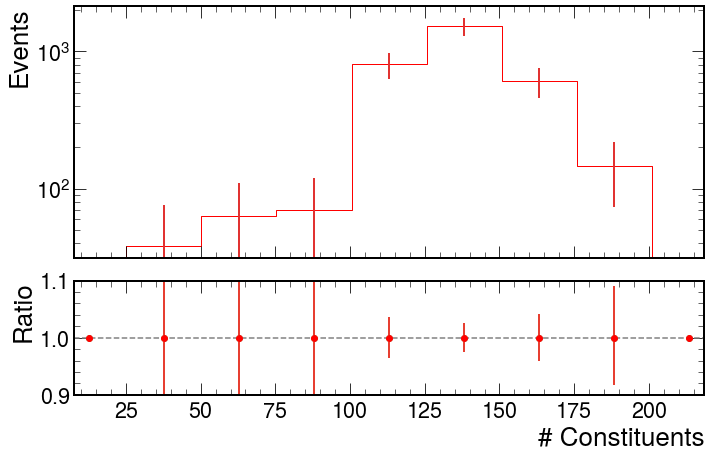

In [63]:
plot_label = 'SUEP_nconst_Cluster'
sample = 'SUEP-m400-generic'
sys = ['', '_JER_up', '_JER_down']
labels = ['Nominal', 'JEC JER Up', 'JEC JER Down']

hlist = []
for s, l in zip(sys, labels):
    h = plots[sample][plot_label + s][::10j]
    hlist.append(h)
fig, axs = plot_ratio(hlist, labels)
axs[1].set_ylim(0.9,1.1)

### GNN

(0.5, 2.5)

<Figure size 720x576 with 0 Axes>

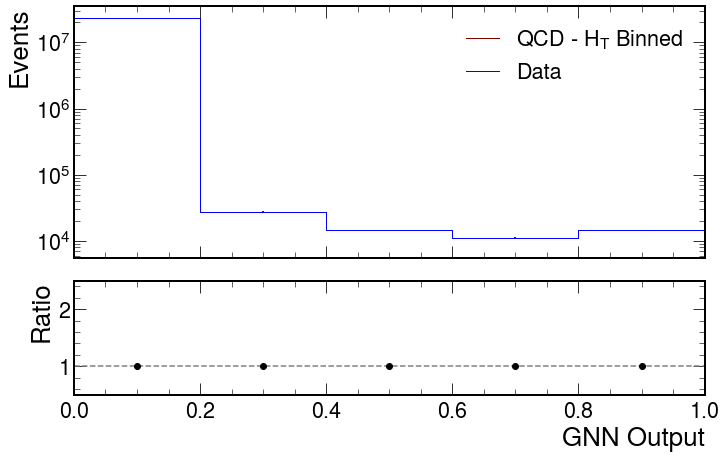

In [26]:
# parameters
plot_label = '2D_ISR_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNNInverted'
sample1 = 'QCD_HT_2018'
sample2 = 'QCD_HT_2018'

h1 = plots[sample1][plot_label]
h2 = plots[sample2][plot_label]

h1 = h1[0.0j::sum, 0.0j::20j]
h2 = h2[0.0j::sum, 0.0j::20j]

fig = plt.figure(figsize=(10, 8))
      
fig, axs, _ = new_plot_ratio(h1, h2, label1=r'QCD - $H_T$ Binned', label2 = 'Data')
axs[0].legend()
axs[1].set_ylim(0.5,2.5)
#axs[0].set_yscale("linear")

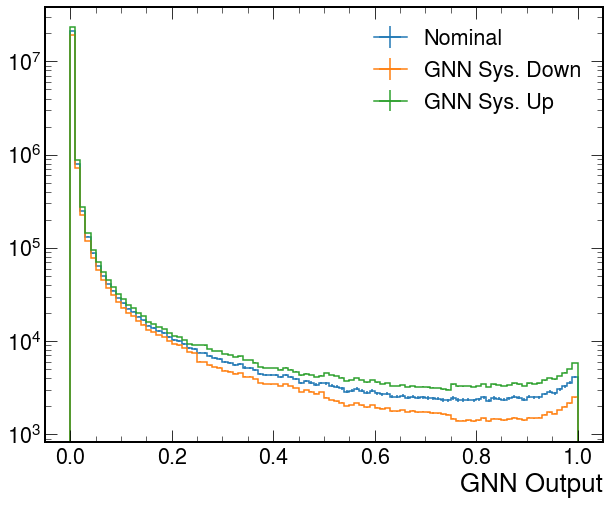

In [11]:
# parameters
plot_label = 'single_l5_bPfcand_S1_SUEPtracks_GNN'
sample = 'QCD_HT_2018'

h1 = plots[sample][plot_label]
h2 = plots[sample][plot_label + "_down_GNN"]
h3 = plots[sample][plot_label + "_up_GNN"]


fig = plt.figure(figsize=(10, 8))
      
hep.histplot(h1, label='Nominal')
hep.histplot(h2, label="GNN Sys. Down")
hep.histplot(h3, label="GNN Sys. Up")

plt.legend()
plt.yscale("log")

In [8]:
[k for k in plots['QCD_HT_2018'] if 'single' in k]

['2D_SUEP_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNN',
 '2D_SUEP_nconst_vs_single_l5_bPfcand_S1_SUEPtracks_GNN',
 'single_l5_bPfcand_S1_SUEPtracks_GNN',
 'A_single_l5_bPfcand_S1_SUEPtracks_GNN',
 'B_single_l5_bPfcand_S1_SUEPtracks_GNN',
 'C_single_l5_bPfcand_S1_SUEPtracks_GNN',
 'D_single_l5_bPfcand_S1_SUEPtracks_GNN',
 'E_single_l5_bPfcand_S1_SUEPtracks_GNN',
 'F_single_l5_bPfcand_S1_SUEPtracks_GNN',
 '2D_ISR_S1_vs_single_l5_bPfcand_S1_SUEPtracks_GNNInverted',
 '2D_ISR_nconst_vs_single_l5_bPfcand_S1_SUEPtracks_GNNInverted',
 'single_l5_bPfcand_S1_SUEPtracks_GNNInverted',
 'A_single_l5_bPfcand_S1_SUEPtracks_GNNInverted',
 'B_single_l5_bPfcand_S1_SUEPtracks_GNNInverted',
 'C_single_l5_bPfcand_S1_SUEPtracks_GNNInverted',
 'D_single_l5_bPfcand_S1_SUEPtracks_GNNInverted']

## Calculate Yields
Integrate histograms to calculate yields.<br>
Parameters:<br>
`lumi`: _float_, scales MC data.<br>
`plot_label`: _str_, which plot you want to integrate.

In [15]:
plot_label = 'single_l5_bPfcand_S1_SUEPtracks_GNN'
samples = ['QCD_HT_2018']
samples += ['SUEP-m125-generic', 'SUEP-m400-generic',
           'SUEP-m750-generic', 'SUEP-m1000-generic']
# samples += ['SUEP-m125-darkPho', 'SUEP-m400-darkPho',
#            'SUEP-m750-darkPho', 'SUEP-m1000-darkPho']
# samples += ['SUEP-m125-darkPhoHad', 'SUEP-m400-darkPhoHad',
#            'SUEP-m750-darkPhoHad', 'SUEP-m1000-darkPhoHad']

for sample in samples:
    h = plots[sample][plot_label]
    passing = h[0.5j:].sum().value
    total = h.sum().value
    print(sample, round(passing/total, 3))

QCD_HT_2018 0.006
SUEP-m125-generic 0.333
SUEP-m400-generic 0.909
SUEP-m750-generic 0.984
SUEP-m1000-generic 0.992


## ROC Curve

SUEP_nconst_GNN
single_l5_bPfcand_S1_GNN


Text(0, 1, 'TPR')

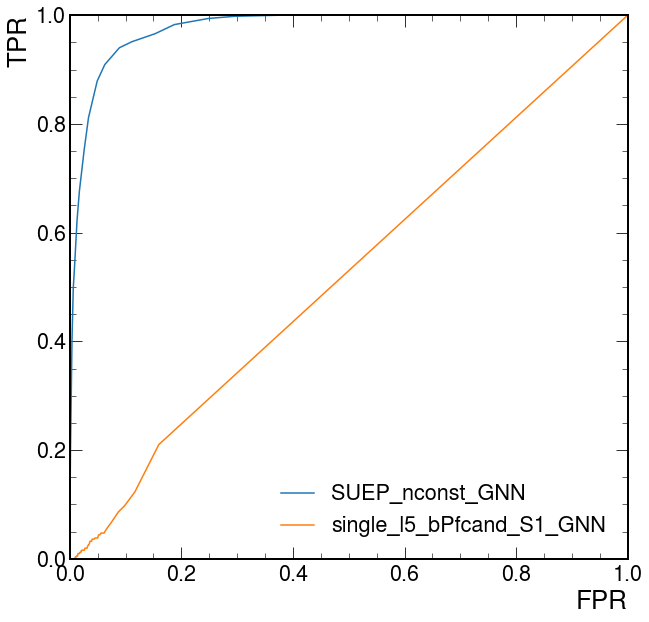

In [18]:
from sklearn.metrics import roc_curve

def roc_from_hists(h_sig, h_bkg, max_value=None, steps=100000):
    
    TPRs, FPRs = [], []
    if max_value is None:
        h_sig_max = h_sig.to_numpy()[1][-1]
        h_bkg_max = h_bkg.to_numpy()[1][-1]
        max_value = max(h_sig_max, h_bkg_max)
    for threshold in np.linspace(0, max_value, steps):
        TPR = integrate(h_sig, threshold*1j, 10000000j)[0] / h_sig.sum().value
        FPR = integrate(h_bkg, threshold*1j, 10000000j)[0] / h_bkg.sum().value
        TPRs.append(TPR)
        FPRs.append(FPR)

    return TPRs, FPRs


"""
SUEP-m400-md2-t0.5-generic
SUEP-m400-md2-t1-generic
SUEP-m400-md2-t2-generic
SUEP-m400-md2-t3-generic
SUEP-m400-md2-t4-generic
SUEP-m400-md3-t1.5-generic
SUEP-m400-md3-t3-generic
SUEP-m400-md3-t6-generic
SUEP-m400-md5-t1-generic
SUEP-m400-md5-t10-generic
SUEP-m400-md5-t5-generic
"""



sample_sig = 'SUEP-m400-md3-t6-generic'
sample_bkg = 'QCD_HT_2018'
classifiers = ['SUEP_nconst_GNN', 'single_l5_bPfcand_S1_GNN']

fig = plt.figure()
ax = fig.subplots()

for plot in classifiers:
    print(plot)
    h_bkg = plots[sample_bkg][plot]
    h_sig = plots[sample_sig][plot]
    TPRs, FPRs = roc_from_hists(h_sig, h_bkg, steps=1000)
    TPRs, FPRs = roc_from_hists(h_sig, h_bkg, steps=1000)
    ax.plot(FPRs, TPRs, label=plot)
    
ax.set_xlim(0,1)
ax.set_ylim(0,1.0)
ax.legend()
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")

## Table

Make comparison table by running next cells. The output is meant to be in Latex format.<br>
The `stats` nested dictionary stores the number of events and variances in each region for real data and MC data when the plots are made, and is used to make the comparison table. Dimensions: (real or MC) x (plot label) x (value or error on the value)

In [ ]:
# dimensions: (sample) x (plot label) x (value or error on the value)
stats = nested_dict(4,float)
selection = 'ch'

for plot_label in ['A','B','C','D_exp']:
    
    plot_label+="_"+selection
    
    # QCD hist for ABCD region
    hdata = plots['data'][plot_label]
    hQCD_MC = plots['QCD_MC'][plot_label]
        
    # fill these up for the table
    stats['data'][plot_label]["value"] = hdata.sum().value
    stats['data'][plot_label]["err"] = hdata.sum().variance
    stats['QCD_MC'][plot_label]["value"] = hQCD_MC.sum().value
    stats['QCD_MC'][plot_label]["err"] = hQCD_MC.sum().variance

In [ ]:
table = []
for i in range(len(list(stats.keys()))):
    label = list(stats.keys())[i]
    line = []
    line.append(label)
    
    for r in ['A_'+selection,'B_'+selection,'C_'+selection,'D_exp_'+selection,'D_obs_'+selection]:
        if 'QCD_MC' in label:
            line.append("{:0.0f} ".format(stats[label][r]['value']) + r'$\pm$' + " {:0.0f}".format(stats[label][r]['err']))
        else:
            line.append("{:0.2f} ".format(stats[label][r]['value']) + r'$\pm$' + " {:0.2f}".format(stats[label][r]['err']))
        
    if 'QCD_MC' in label:
        line.append(round((stats[label]['D_exp_'+selection]['value']-stats[label]['D_obs_'+selection]['value'])/stats[label]['D_exp_'+selection]['value'],2))
        line.append(0)
    else:
        line.append(0)
        line.append(stats[label]['D_obs_'+selection]['value']/math.sqrt(stats[label]['D_obs_'+selection]['value']+stats[label]['D_exp_'+selection]['value']+stats[label]['D_obs_'+selection]['err']+stats['QCD_MC']['D_exp_'+selection]['err']))
    table.append(line)                                                         

In [ ]:
t = tabulate(table,tablefmt ='latex',
               headers=['Process', 'A', 'B', 'C', 'D_{exp}', 'D_{obs}', 'D_{exp}-D_{obs}/D_{exp}', 'S/$\sqrt(S+B+\sigma_{S}+\sigma_{B}$)'])
with open('table.txt', 'w') as f:
    f.write(t)
t

In [ ]:
def convert2LatexString(s):
    r = r'(\^\{\})'; s = re.sub(r, "^", s)
    s = re.sub(r'\\([\$\_\{\}\^])', r'\1', s)
    s = re.sub(r'(\\textbackslash{})', r'\\', s)
    return s

t = convert2LatexString(t)
with open('table.txt', 'w') as f:
    f.write(t)
t

In [7]:
isr2d = plots['QCD_HT_2018']['2D_ISR_S1_vs_ISR_nconst_ClusterInverted']
suep2d = plots['QCD_HT_2018']['2D_SUEP_S1_vs_SUEP_nconst_Cluster']

In [25]:
slices = []
for ybin in range(isr2d.shape[1] - 1):
    isr_slice = isr2d[:,ybin:ybin+1:sum]
    suep_slice = suep2d[:,ybin:ybin+1:sum]
    if isr_slice.sum().value == 0: continue
    ratio = suep_slice.sum().value/isr_slice.sum().value
    
    slices.append(isr_slice.view().value * ratio)

In [34]:
hISR_S1 = Hist.new.Reg(100, 0, 1.0, name="ISR_S1", label='$Sph_1$').Weight()

In [39]:
for s in slices: hISR_S1.view().value += s

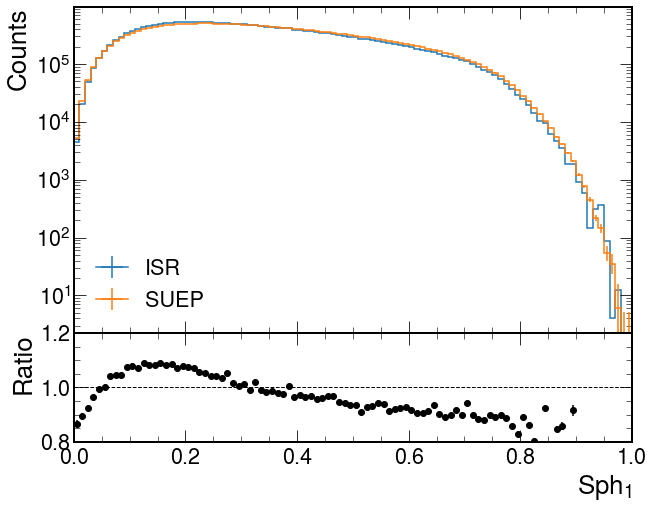

In [53]:
fig = plt.figure(figsize=(10, 8))
_ = hISR_S1.plot_ratio(suep2d[:,::sum],
                      rp_num_label='ISR',
                      rp_denom_label='SUEP')
fig.axes[0].set_yscale("log")
_ = fig.axes[0].legend()
_ = fig.axes[1].set_ylim(0.8,1.2)